# Part I - Prosper loans dataset exploration
## by HAJI Wissal

## Introduction
> Dans ce document on procède à l'exploration d'un dataset de 113937 observations sur les crédits issus de la platforme Prosper. 



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from pandas.api.types import is_datetime64_any_dtype as is_datetime

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
%matplotlib inline

In [2]:
DATA_DIRECTORY = 'data'
data = pd.read_csv(DATA_DIRECTORY+'/prosperLoanData.csv')
df_loan = data.copy()
df_loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [3]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df_loan.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

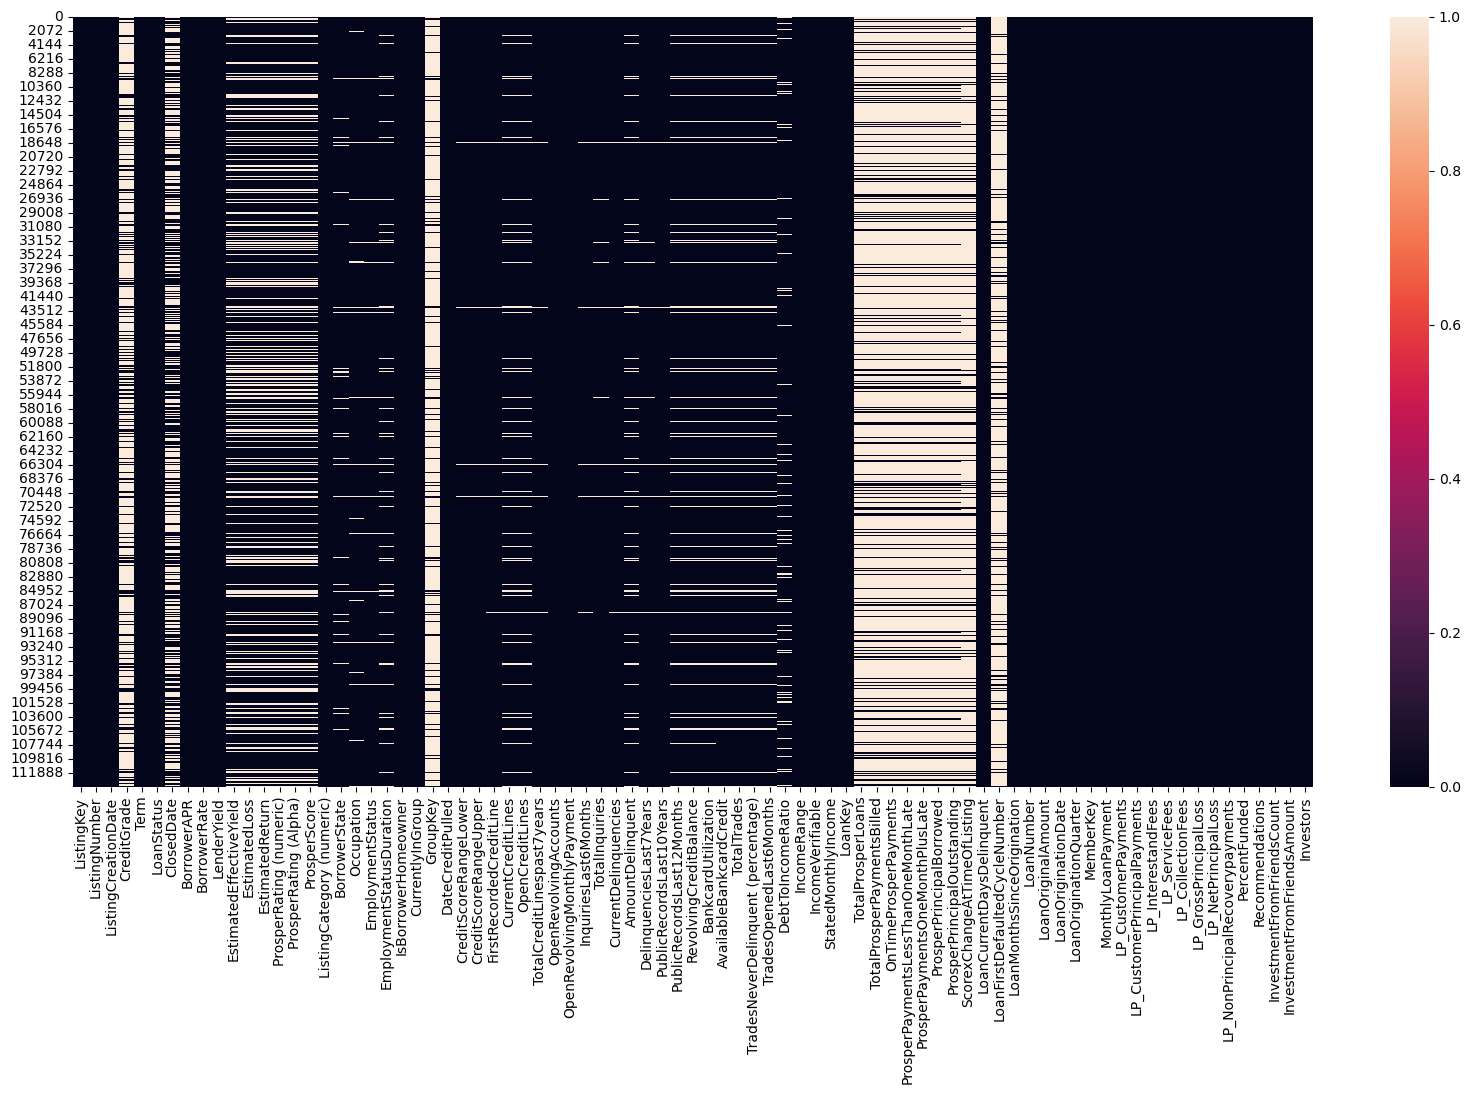

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df_loan.isnull())
plt.show()

In [6]:
(df_loan.isnull().sum() *100/ len(df_loan)).sort_values(ascending=False)

GroupKey                               88.290898
LoanFirstDefaultedCycleNumber          85.121602
ScorexChangeAtTimeOfListing            83.387311
ProsperPrincipalOutstanding            80.616481
ProsperPrincipalBorrowed               80.616481
ProsperPaymentsOneMonthPlusLate        80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
OnTimeProsperPayments                  80.616481
TotalProsperLoans                      80.616481
TotalProsperPaymentsBilled             80.616481
CreditGrade                            74.588588
ClosedDate                             51.649596
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
EstimatedLoss                          25.526387
EstimatedEffectiveYield                25.526387
DebtToIncomeRatio                       7.507658
EmploymentStatusDuration                6.692295
AmountDelinquent    

On procèdera maintenant à l'évaluation des variables target et la sélection des variables qui nous aideront dans l'étude.

### Evaluation de la variable target

In [7]:
TARGET_NAME = {'categ':'LoanStatus', 'num':'BorrowerAPR'}

df_loan[TARGET_NAME['categ']].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

Pour cette étude on s'interessera uniquement aux valeurs suivantes (Completed, Chargedoff, Defaulted)

In [8]:
df_loan_status = df_loan.loc[df_loan[TARGET_NAME['categ']].isin(["Completed", "Chargedoff", "Defaulted"])].copy()
df_loan_status.sample(4)

ListingKey  ListingNumber            ListingCreationDate  \
35678  9B653580216964859740B37         805166  2013-06-11 17:40:49.613000000   
13227  486333793862657620B940A          82559  2007-01-08 09:57:12.100000000   
72640  F97B336967602243662EC8D          45137  2006-10-05 14:35:41.227000000   
85157  B7BD34312983752545D3F7A         397687  2008-09-13 08:41:57.667000000   

      CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
35678         NaN    36  Chargedoff  2013-11-17 00:00:00      0.20462   
13227           E    36   Defaulted  2007-11-14 00:00:00      0.24891   
72640           E    36  Chargedoff  2009-01-12 00:00:00      0.29776   
85157           A    36  Chargedoff  2011-05-24 00:00:00      0.14127   

       BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
35678        0.1679       0.1579                   0.1487         0.0599   
13227        0.2300       0.2250                      NaN            NaN   
72640        0.2900       0.2725                      NaN            NaN   
85157        0.1271       0.1171                      NaN            NaN   

       EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
35678           0.0888                      5.0                     B   
13227              NaN                      NaN                   NaN   
72640              NaN                      NaN                   NaN   
85157              NaN                      NaN                   NaN   

       ProsperScore  ListingCategory (numeric) BorrowerState  \
35678           5.0                         15            FL   
13227           NaN                          0           NaN   
72640           NaN                          0            CA   
85157           NaN                          1            FL   

                 Occupation EmploymentStatus  EmploymentStatusDuration  \
35678         Skilled Labor         Employed                       9.0   
13227                 Other    Not available                       NaN   
72640                 Other    Not available                       NaN   
85157  Tradesman - Mechanic        Full-time                     100.0   

       IsBorrowerHomeowner  CurrentlyInGroup                 GroupKey  \
35678                 True             False                      NaN   
13227                 True             False                      NaN   
72640                False              True  DD17336621690487632377B   
85157                False             False                      NaN   

                    DateCreditPulled  CreditScoreRangeLower  \
35678            2013-06-11 17:40:39                  660.0   
13227  2007-01-05 12:23:59.490000000                  540.0   
72640  2006-10-04 08:58:44.770000000                  540.0   
85157  2008-09-13 08:40:15.930000000                  740.0   

       CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
35678                  679.0     2005-09-29 00:00:00                13.0   
13227                  559.0     1995-06-01 00:00:00                 NaN   
72640                  559.0     2004-02-18 00:00:00                 NaN   
85157                  759.0     1992-07-30 00:00:00                 6.0   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
35678             13.0                        22.0                      7   
13227              NaN                        21.0                      5   
72640              NaN                         6.0                      2   
85157              6.0                        10.0                      5   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
35678                        230.0                   5.0             9.0   
13227                        159.0                   4.0            43.0   
72640                         34.0                   0.0            13.0   
85157                        126.0                   0.0     

In [9]:
df_loan_status.shape

(55084, 81)

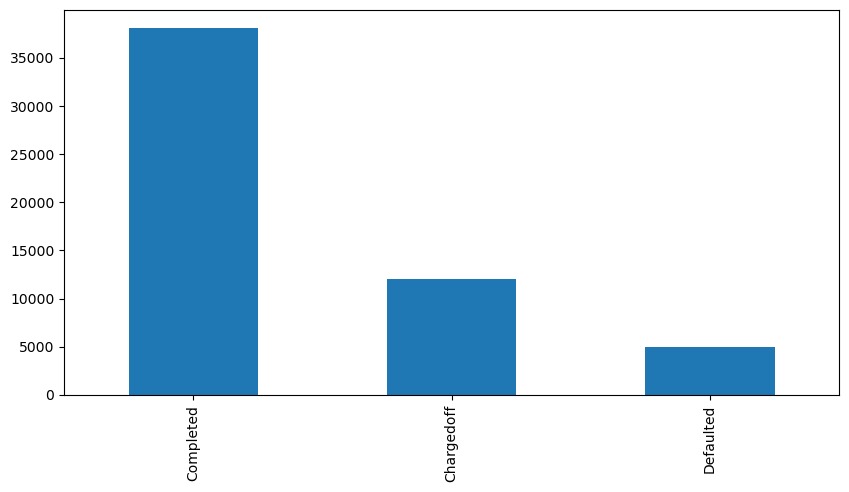

In [10]:
plt.figure(figsize=(10,5))
df_loan_status[TARGET_NAME['categ']].value_counts().plot(kind = 'bar')
plt.show()

### Selection des variables

On commencera d'abord par séparer les variables en quantitative set quantitatives:

In [11]:
categ_vars = df_loan_status.select_dtypes(['object', 'bool'])
numeric_vars = df_loan_status.select_dtypes(['float64', 'int64'])
categ_vars.shape[1], numeric_vars.shape[1]

(20, 61)

In [12]:
categ_vars.sample(4)

ListingKey            ListingCreationDate CreditGrade  \
105400  ECBF34056397743716EBA7C  2007-11-19 12:23:11.510000000          AA   
14439   AA8935438891916441D1E4B  2012-04-03 11:35:27.167000000         NaN   
13416   AE3235732863469780F40CD  2013-03-08 15:13:42.613000000         NaN   
78823   F5B53505343809266A9144B  2011-01-15 10:20:58.227000000         NaN   

        LoanStatus           ClosedDate ProsperRating (Alpha) BorrowerState  \
105400   Completed  2009-03-04 00:00:00                   NaN           NaN   
14439   Chargedoff  2013-10-02 00:00:00                     D            OH   
13416   Chargedoff  2013-10-18 00:00:00                     E            KS   
78823    Defaulted  2012-07-24 00:00:00                     E            CA   

          Occupation EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup  \
105400         Other    Self-employed                 True             False   
14439        Laborer         Employed                False             False   
13416          Other         Employed                False             False   
78823   Truck Driver         Employed                False             False   

       GroupKey               DateCreditPulled FirstRecordedCreditLine  \
105400      NaN  2007-11-19 10:28:03.937000000     1993-05-25 00:00:00   
14439       NaN            2012-06-25 16:55:41     2003-03-17 00:00:00   
13416       NaN            2013-03-08 15:13:40     1995-10-10 00:00:00   
78823       NaN            2011-01-15 10:20:51     2002-04-21 00:00:00   

           IncomeRange  IncomeVerifiable                  LoanKey  \
105400              $0             False  83F434055845255175F3152   
14439   $25,000-49,999              True  B1EC3654989012576A87743   
13416        $1-24,999              True  5DD636769628774970E4404   
78823   $25,000-49,999              True  C324360887453346850721C   

        LoanOriginationDate LoanOriginationQuarter                MemberKey  
105400  2007-12-04 00:00:00                Q4 2007  074D3404470280145E81508  
14439   2012-07-02 00:00:00                Q3 2012  E6A135115963706819F6119  
13416   2013-03-18 00:00:00                Q1 2013  9E6C3572082981278812009  
78823   2011-01-24 00:00:00                Q1 2011  5DEA350542751332887326D

In [13]:
numeric_vars.sample(4)

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
48285         545101    36      0.35285        0.3127       0.3027   
9151           21515    36      0.30709        0.2875       0.2825   
46475          28520    36      0.10739        0.0900       0.0850   
47502         207489    36      0.08634        0.0795       0.0795   

       EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
48285                    0.285          0.165             0.12   
9151                       NaN            NaN              NaN   
46475                      NaN            NaN              NaN   
47502                      NaN            NaN              NaN   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
48285                      1.0           4.0                          1   
9151                       NaN           NaN                          0   
46475                      NaN           NaN                          0   
47502                      NaN           NaN                          4   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
48285                       2.0                  680.0                  699.0   
9151                        NaN                  480.0                  499.0   
46475                       NaN                  740.0                  759.0   
47502                     211.0                  780.0                  799.0   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
48285                 7.0              5.0                        12.0   
9151                  NaN              NaN                        11.0   
46475                 NaN              NaN                        22.0   
47502                 4.0              4.0                         7.0   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  \
48285                      5                        240.0   
9151                       2                         24.0   
46475                     15                        309.0   
47502                      4                        151.0   

       InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  \
48285                   3.0             9.0                   0.0   
9151                    5.0            11.0                   8.0   
46475                   1.0             3.0                   0.0   
47502                   0.0             2.0                   0.0   

       AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  \
48285               0.0                      0.0                       0.0   
9151                NaN                      7.0                       0.0   
46475               NaN                      0.0                       0.0   
47502               0.0                      0.0                       0.0   

       PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  \
48285                        0.0                  4161.0                 0.80   
9151                         NaN                     NaN                  NaN   
46475                        NaN                     NaN                  NaN   
47502                        0.0                  7095.0                 0.32   

       AvailableBankcardCredit  TotalTrades  \
48285                   1039.0          7.0   
9151                       NaN          NaN   
46475                      NaN          NaN   
47502                  14815.0          6.0   

       TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
48285                                 1.0                      2.0   
9151                                  NaN                      NaN   
46475                                 NaN                      NaN   
47502                                 1.0                      0.0   

       DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  \
48285               0.18          2083.333333                NaN   


#### Séléction des variables catégorique : 
On remarque que parmis les variables catégoriques on a des variables de type date qui devraient être convertis:

In [14]:
# convertir les dates
date_vars = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']
categ_vars.loc[:,date_vars] = categ_vars[date_vars].apply(pd.to_datetime)

# test
for col in date_vars:
    assert is_datetime(categ_vars[col])

parmi les variables de type date on s'aperçcoit que quelques une ne nous serviront pas dans l'étude donc on les supprime:

In [15]:
# supprimer les colonnes inutiles
cols_to_drop = ['ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'ListingCreationDate']
categ_vars.drop(cols_to_drop, axis = 1, inplace = True)

# Test
for col in cols_to_drop:
    assert not col in categ_vars

On remarque aussi que parmi les variables catégoriques on a des colonnes qui représentent des clés qui permettent d'identifier les listings, les crédits et les membres, on utilisera ces clés pour vérifier les doublons puis on les supprimera. 

Autre colonnes à supprimer : 'CurrentlyInGroup','ProsperRating (Alpha)'

In [16]:
# vérifier les duplications par rapport à ListingKey
df_loan_status.ListingKey.duplicated().sum()

13

In [17]:
cols_to_drop = ['LoanKey', 'ListingKey', 'GroupKey', 'CurrentlyInGroup','ProsperRating (Alpha)',
 'BorrowerState', 'LoanOriginationQuarter', 'IsBorrowerHomeowner', 'IncomeVerifiable']
categ_vars.drop(cols_to_drop, axis = 1, inplace =True)

# test
for col in cols_to_drop:
    assert not col in categ_vars

In [18]:
categ_vars.sample(4)

CreditGrade LoanStatus      Occupation EmploymentStatus  \
6483             B  Completed  Sales - Retail        Full-time   
38870            E  Completed           Other        Full-time   
68150          NaN  Completed           Other         Employed   
102634         NaN  Completed  Accountant/CPA         Employed   

           IncomeRange LoanOriginationDate                MemberKey  
6483    $25,000-49,999          2008-08-19  1EE134033042752599BFAE1  
38870        $1-24,999          2008-07-09  C52D34237018094926B4B95  
68150   $50,000-74,999          2012-10-29  1D0E3560887362579BA5090  
102634  $25,000-49,999          2012-09-21  F28B35181092070749F6D85

#### Séléction des variables quantitatives : 

In [19]:
numeric_vars.sample(5)

ListingNumber  Term  BorrowerAPR  BorrowerRate  LenderYield  \
106907         224100    36      0.13705        0.1300       0.1200   
99066          116149    36      0.10692        0.1000       0.0950   
28739          213725    36      0.20169        0.1870       0.1770   
90455          590762    36      0.18316        0.1469       0.1369   
109127         168733    36      0.15615        0.1450       0.1350   

        EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
106907                      NaN            NaN              NaN   
99066                       NaN            NaN              NaN   
28739                       NaN            NaN              NaN   
90455                    0.1346          0.042           0.0926   
109127                      NaN            NaN              NaN   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
106907                      NaN           NaN                          0   
99066                       NaN           NaN                          0   
28739                       NaN           NaN                          0   
90455                       5.0           7.0                          1   
109127                      NaN           NaN                          0   

        EmploymentStatusDuration  CreditScoreRangeLower  \
106907                      21.0                  720.0   
99066                        1.0                  740.0   
28739                       21.0                  540.0   
90455                       18.0                  740.0   
109127                      23.0                  640.0   

        CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  \
106907                  739.0                 4.0              4.0   
99066                   759.0                 8.0              6.0   
28739                   559.0                 2.0              1.0   
90455                   759.0                17.0             16.0   
109127                  659.0                 4.0              4.0   

        TotalCreditLinespast7years  OpenRevolvingAccounts  \
106907                         4.0                      4   
99066                         11.0                      2   
28739                         10.0                      0   
90455                         40.0                     14   
109127                         4.0                      3   

        OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
106907                         33.0                   0.0             1.0   
99066                          30.0                   6.0            22.0   
28739                           0.0                   0.0             3.0   
90455                         612.0                   2.0             6.0   
109127                         37.0                   0.0            14.0   

        CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
106907                   0.0               0.0                      0.0   
99066                    1.0             363.0                      7.0   
28739                    1.0              64.0                      4.0   
90455                    0.0               0.0                      0.0   
109127                   0.0               0.0                      0.0   

        PublicRecordsLast10Years  PublicRecordsLast12Months  \
106907                       0.0                        0.0   
99066                        0.0                        0.0   
28739                        0.0                        0.0   
90455                        0.0                        0.0   
109127                       0.0                        0.0   

        RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
106907                    49.0                 0.01                   2451.0   
99066                      0.0                 0.00                   1693.0   
28739                      0.0               

In [20]:
# colonnes à supprimer
cols_to_drop = [
'ListingNumber',
'BorrowerRate',
'LenderYield',
'DelinquenciesLast7Years',
'OpenRevolvingMonthlyPayment',
'RevolvingCreditBalance',
'EstimatedEffectiveYield',
'EstimatedLoss',
'Recommendations',
'EstimatedReturn',
'CurrentCreditLines',
'OpenCreditLines',
'TotalCreditLinespast7years',
'OpenRevolvingAccounts',
'InquiriesLast6Months',
'TotalInquiries',
'BankcardUtilization',
'CurrentDelinquencies',
'AmountDelinquent',
'PublicRecordsLast10Years',
'PublicRecordsLast12Months',
'TotalTrades',
'TradesOpenedLast6Months',
'AvailableBankcardCredit',
'OnTimeProsperPayments', 
'ProsperPaymentsLessThanOneMonthLate',
'ProsperPaymentsOneMonthPlusLate', 
'ScorexChangeAtTimeOfListing', 
'LoanFirstDefaultedCycleNumber',
'LoanMonthsSinceOrigination',
'LoanNumber',
'LP_CustomerPayments',
'LP_CustomerPrincipalPayments',
'LP_InterestandFees',
'LP_ServiceFees',
'LP_CollectionFees',
'LP_GrossPrincipalLoss',
'LP_NetPrincipalLoss',
'LP_NonPrincipalRecoverypayments',
'PercentFunded',
'InvestmentFromFriendsCount',
'InvestmentFromFriendsAmount',
'Investors',
'TotalProsperLoans',
'TotalProsperPaymentsBilled',
'LoanCurrentDaysDelinquent'
]
numeric_vars.drop(cols_to_drop, axis=1, inplace=True)

# test
for col in cols_to_drop:
    assert not col in numeric_vars

In [21]:
numeric_vars.sample(4)

Term  BorrowerAPR  ProsperRating (numeric)  ProsperScore  \
2011     36      0.12562                      NaN           NaN   
37991    36      0.37453                      NaN           NaN   
93903    36      0.26292                      NaN           NaN   
5641     36      0.14176                      NaN           NaN   

       ListingCategory (numeric)  EmploymentStatusDuration  \
2011                           5                      69.0   
37991                          1                      34.0   
93903                          7                      68.0   
5641                           0                       2.0   

       CreditScoreRangeLower  CreditScoreRangeUpper  \
2011                   640.0                  659.0   
37991                  660.0                  679.0   
93903                  660.0                  679.0   
5641                   620.0                  639.0   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
2011                                 0.76               0.31   
37991                                0.55               0.24   
93903                                0.88               0.28   
5641                                 1.00               0.15   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
2011           2500.000000                       NaN   
37991          2750.000000                       NaN   
93903          8083.333333                       NaN   
5641           3333.333333                    1000.0   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  
2011                           NaN                4500              146.15  
37991                          NaN                5000              226.18  
93903                          NaN                7000              267.91  
5641                           0.0                2500               84.80

In [22]:
# concatener categ_vars et numeric_vars
df_loan_status = pd.concat([categ_vars, numeric_vars], axis = 1)
# place target variable at the end of the dataframe
new_cols = df_loan_status.columns.drop(TARGET_NAME.values()).insert(df_loan_status.shape[1]-2,
                                 TARGET_NAME['categ']).insert(df_loan_status.shape[1]-1, TARGET_NAME['num'])
df_loan_status = df_loan_status[new_cols]

df_loan_status.sample(4)

CreditGrade                Occupation EmploymentStatus     IncomeRange  \
90842           E                       NaN              NaN   Not displayed   
26229         NaN                     Other         Employed  $75,000-99,999   
2645            E                     Other    Not available   Not displayed   
91176           C  Administrative Assistant        Full-time  $50,000-74,999   

      LoanOriginationDate                MemberKey  Term  \
90842          2006-06-13  815A3366228624273F8D27D    36   
26229          2011-03-04  FED53425353771551C4F3AA    36   
2645           2006-08-16  C74A33649952186616E832C    36   
91176          2007-04-24  A5E133829580028412976E2    36   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
90842                      NaN           NaN                          0   
26229                      3.0           6.0                          7   
2645                       NaN           NaN                          0   
91176                      NaN           NaN                          0   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
90842                       NaN                  540.0                  559.0   
26229                      31.0                  680.0                  699.0   
2645                        NaN                  560.0                  579.0   
91176                       9.0                  640.0                  659.0   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
90842                                 NaN               0.18   
26229                                0.88               0.29   
2645                                  NaN               0.33   
91176                                0.69               0.04   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
90842          4416.666667                       NaN   
26229          6369.250000                    1000.0   
2645           3750.000000                       NaN   
91176          5416.666667                       NaN   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
90842                          NaN                4300              170.29   
26229                          0.0                5000              190.93   
2645                           NaN                4200              176.00   
91176                          NaN                5000              170.89   

      LoanStatus  BorrowerAPR  
90842  Defaulted      0.25456  
26229  Completed      0.25424  
2645   Defaulted      0.29776  
91176  Completed      0.14709

### Evaluation du nouveau dataset

In [23]:
df_loan_status

CreditGrade       Occupation EmploymentStatus     IncomeRange  \
0                C            Other    Self-employed  $25,000-49,999   
2               HR            Other    Not available   Not displayed   
11               C  Waiter/Waitress        Full-time       $1-24,999   
15             NaN            Other            Other  $50,000-74,999   
17              AA     Professional    Not available   Not displayed   
...            ...              ...              ...             ...   
113926           E            Other    Not available   Not displayed   
113927          AA        Executive        Full-time       $100,000+   
113928         NaN            Other        Full-time  $25,000-49,999   
113929         NaN   Accountant/CPA         Employed  $50,000-74,999   
113935         NaN     Food Service        Full-time  $25,000-49,999   

       LoanOriginationDate                MemberKey  Term  \
0               2007-09-12  1F3E3376408759268057EDA    36   
2               2007-01-17  5F7033715035555618FA612    36   
11              2007-10-18  59423376541417552B94BD3    36   
15              2012-04-19  924335448287456229847ED    36   
17              2006-08-22  893E3365582060699EBBADA    36   
...                    ...                      ...   ...   
113926          2006-08-08  24433364525134628C58A2F    36   
113927          2008-05-09  5BAF33803622558831EA3AC    36   
113928          2011-06-10  3A2F3380477699707C81385    36   
113929          2013-07-10  CBD43555702871369F462DA    36   
113935          2011-11-21  A33834861822272782621C8    60   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
0                           NaN           NaN                          0   
2                           NaN           NaN                          0   
11                          NaN           NaN                          0   
15                          1.0           5.0                         13   
17                          NaN           NaN                          0   
...                         ...           ...                        ...   
113926                      NaN           NaN                          0   
113927                      NaN           NaN                          4   
113928                      4.0           6.0                          3   
113929                      2.0           3.0                          2   
113935                      4.0           5.0                          2   

        EmploymentStatusDuration  CreditScoreRangeLower  \
0                            2.0                  640.0   
2                            NaN                  480.0   
11                          19.0                  640.0   
15                         121.0                  700.0   
17                           NaN                  760.0   
...                          ...                    ...   
113926                       NaN                  540.0   
113927                      69.0                  760.0   
113928                      22.0                  740.0   
113929                      25.0                  660.0   
113935                      94.0                  680.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
0                       659.0                                0.81   
2                       499.0                                 NaN   
11                      659.0                                0.40   
15                      719.0                                0.94   
17                      779.0                                 NaN   
...                       ...                                 ...   
113926                  559.0                                 NaN   
113927                  779.0                                1.00   
113928                  759.0                                1.00   
113929                  679.0                                0.75   
113935                  699.

In [24]:
df_loan_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55084 entries, 0 to 113935
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CreditGrade                         28948 non-null  object        
 1   Occupation                          52819 non-null  object        
 2   EmploymentStatus                    52832 non-null  object        
 3   IncomeRange                         55084 non-null  object        
 4   LoanOriginationDate                 55084 non-null  datetime64[ns]
 5   MemberKey                           55084 non-null  object        
 6   Term                                55084 non-null  int64         
 7   ProsperRating (numeric)             26005 non-null  float64       
 8   ProsperScore                        26005 non-null  float64       
 9   ListingCategory (numeric)           55084 non-null  int64         
 10  EmploymentStatusDurat

In [25]:
# vérification du pourcentage des valaurs manquantes
(df_loan_status.isnull().sum() / len(df_loan_status)).sort_values(ascending=False)

ProsperPrincipalOutstanding           0.808674
ProsperPrincipalBorrowed              0.808674
ProsperRating (numeric)               0.527903
ProsperScore                          0.527903
CreditGrade                           0.474475
EmploymentStatusDuration              0.138171
TradesNeverDelinquent (percentage)    0.136882
DebtToIncomeRatio                     0.076792
Occupation                            0.041119
EmploymentStatus                      0.040883
CreditScoreRangeUpper                 0.010711
CreditScoreRangeLower                 0.010711
BorrowerAPR                           0.000454
ListingCategory (numeric)             0.000000
Term                                  0.000000
MemberKey                             0.000000
StatedMonthlyIncome                   0.000000
LoanOriginationDate                   0.000000
IncomeRange                           0.000000
LoanOriginalAmount                    0.000000
MonthlyLoanPayment                    0.000000
LoanStatus   

In [26]:
# affichage des variables catégorique avec leurs différentes valeurs unique
for col in df_loan_status.select_dtypes('object'):
    print(f'{col:-<50} {df_loan_status[col].unique()}')

CreditGrade--------------------------------------- ['C' 'HR' nan 'AA' 'D' 'B' 'E' 'A' 'NC']
Occupation---------------------------------------- ['Other' 'Waiter/Waitress' 'Professional' 'Skilled Labor'
 'Sales - Commission' 'Executive' nan 'Accountant/CPA' 'Construction'
 'Analyst' "Nurse's Aide" 'Fireman' 'Realtor' 'Clerical' 'Laborer'
 'Food Service Management' 'Truck Driver' 'Administrative Assistant'
 'Police Officer/Correction Officer' 'Nurse (RN)' 'Social Worker'
 'Computer Programmer' 'Military Officer' 'Sales - Retail'
 'Military Enlisted' 'Food Service' 'Tradesman - Mechanic'
 'Postal Service' 'Teacher' 'Pharmacist' 'Retail Management'
 'Engineer - Mechanical' 'Dentist' 'Architect' 'Landscaping' 'Nurse (LPN)'
 'Tradesman - Carpenter' 'Medical Technician' 'Tradesman - Plumber'
 'Tradesman - Electrician' 'Bus Driver' 'Engineer - Chemical'
 'Student - College Senior' 'Principal' 'Attorney' 'Scientist' 'Doctor'
 'Pilot - Private/Commercial' 'Engineer - Electrical' 'Homemaker'
 'Stu

Pour `CreditGrade` la valeur `NC` ne figure pas parmis l'ensemble des valeurs definit au niveau du site web de propser.

![prosperrating](img/prosperrating.png)

Vérifions maintenant les lignes où `IncomeRange` = 0$:

<AxesSubplot:>

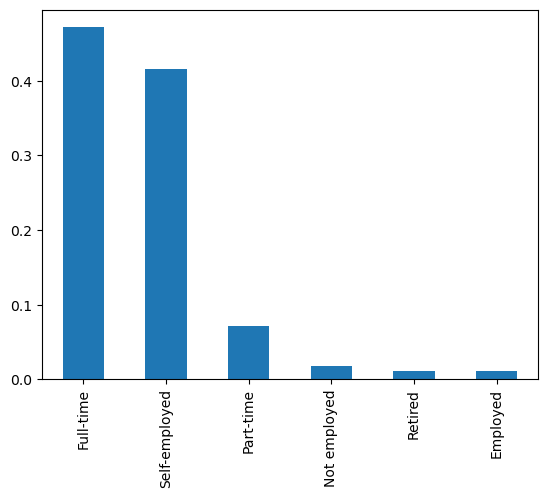

In [27]:
df_loan_status.query('IncomeRange == "$0"').EmploymentStatus.value_counts(normalize = True).plot.bar()

Presque 50% de ces cas ont des jobs full-time, donc pour les cas (full-time, part-time et retired) on replacera cette valeur par `Not displayed`.

Vérifions maintenant si les données entre occupation et statut d'emploiement sont cohérentes:

In [28]:
df_loan_status.query("EmploymentStatus == 'Not employed' & StatedMonthlyIncome != 0").Occupation.unique()

array(['Other', 'Student - College Graduate Student',
       'Sales - Commission', 'Student - Community College',
       'Psychologist', 'Student - College Senior',
       'Student - College Junior', 'Professional',
       'Student - College Sophomore', 'Analyst', "Teacher's Aide",
       'Retail Management', 'Homemaker', 'Sales - Retail', "Nurse's Aide",
       'Waiter/Waitress', 'Student - Technical School',
       'Student - College Freshman', 'Skilled Labor'], dtype=object)

In [29]:
mask = (df_loan_status.EmploymentStatus == 'Not employed') & (~df_loan_status.Occupation.str.contains('Student|Other', regex=True, na=False))
df_loan_status.loc[mask, ["StatedMonthlyIncome", "IncomeRange"]]

StatedMonthlyIncome    IncomeRange
3494               0.083333   Not employed
12976              0.083333   Not employed
23186           1820.000000   Not employed
30657           3333.333333   Not employed
46168              0.083333   Not employed
48124              0.083333  Not displayed
51391              0.000000   Not employed
51591              0.083333   Not employed
52485              0.083333   Not employed
59043              0.083333   Not employed
59790            500.000000   Not employed
63607           5833.333333   Not employed
79151            738.166667   Not employed
82145          20833.333333   Not employed
82933           1500.000000   Not employed
83221          20833.333333      $100,000+
83675              0.000000   Not employed
99010              0.083333   Not employed
99066           6666.666667   Not employed
105503          1916.666667   Not employed
109111             0.083333   Not employed

Pour les occupation différentes de (student et other) où le statut d'emploiement est `Not employed` on mettra plutot `Not available`, il va falloir aussi corriger la valeur de `IncomeRange`. Vérifions maitenant le cas inverse :

In [30]:
mask = (df_loan_status.EmploymentStatus == 'Not employed') & (df_loan_status.Occupation.str.contains('Student|Other', regex=True, na=False)) & (df_loan_status.IncomeRange == "Not employed")
print(f'Income Range : {df_loan_status.loc[mask, "IncomeRange"].unique()}')
month_income = df_loan_status.loc[mask, "StatedMonthlyIncome"]
month_income[month_income > 0]

Income Range : ['Not employed']


66         860.000000
1242         0.083333
1925         0.083333
2394         0.083333
3821      1211.666667
4683       623.000000
4791      2926.000000
9564       833.333333
9911      1000.000000
10949      583.333333
13647     1505.000000
14599      175.000000
18423     3500.000000
19622        0.083333
20103     3633.000000
20499      833.333333
21386     2167.583333
22905      125.250000
25650      856.000000
26669     1360.000000
28185      828.000000
28949       37.500000
37625        0.083333
37896      583.333333
38889     2775.916667
42332     4126.416667
46467       56.250000
49435        0.083333
49741        0.083333
54517        0.083333
54605      868.000000
57163     2166.666667
60735      900.000000
67076     2025.000000
76229     1014.000000
79698      643.000000
80471     2348.000000
82130        0.083333
85716        0.083333
86265     1400.000000
87620     1250.000000
88171      393.416667
88504      839.666667
88628      964.333333
90975        0.083333
92119     

Il va falloir aussi corriger les valeurs de IncomeRange, statut d'emploiement et StatedMonthlyIncome des occupations (Student et Other) pour les lignes où le salaire mensuel est différent de 0.

In [31]:
df_loan_status.describe()

Term  ProsperRating (numeric)  ProsperScore  \
count  55084.000000             26005.000000  26005.000000   
mean      36.942851                 3.662911      6.265987   
std        7.333480                 1.814450      2.319612   
min       12.000000                 1.000000      1.000000   
25%       36.000000                 2.000000      5.000000   
50%       36.000000                 3.000000      6.000000   
75%       36.000000                 5.000000      8.000000   
max       60.000000                 7.000000     11.000000   

       ListingCategory (numeric)  EmploymentStatusDuration  \
count               55084.000000              47473.000000   
mean                    2.407578                 80.895878   
std                     3.397823                 84.669661   
min                     0.000000                  0.000000   
25%                     0.000000                 21.000000   
50%                     1.000000                 52.000000   
75%                     3.000000                112.000000   
max                    20.000000                755.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper  \
count           54494.000000           54494.000000   
mean              671.746247             690.746247   
std                81.908137              81.908137   
min                 0.000000              19.000000   
25%               640.000000             659.000000   
50%               680.000000             699.000000   
75%               720.000000             739.000000   
max               880.000000             899.000000   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
count                        47544.000000       50854.000000   
mean                             0.856399           0.289866   
std                              0.174057           0.736738   
min                              0.000000           0.000000   
25%                              0.770000           0.130000   
50%                              0.920000           0.200000   
75%                              1.000000           0.300000   
max                              1.000000          10.010000   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
count         55084.000000              10539.000000   
mean           5054.723018               7104.678315   
std            5711.051112               6395.297342   
min               0.000000                  0.000000   
25%            2810.604167               3000.000000   
50%            4166.666667               5000.000000   
75%            6250.000000               9500.000000   
max          618547.833333              60001.000000   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
count                 10539.000000        55084.000000        55084.000000   
mean                   2332.674796         6261.892746          223.729882   
std                    3285.130455         5217.758039          185.727523   
min                       0.000000         1000.000000            0.000000   
25%                       0.000000         2600.000000           98.290000   
50%                    1098.020000         4500.000000          172.600000   
75%                    3382.560000         8000.000000          300.472500   
max                   22586.670000        35000.000000         2251.510000   

        BorrowerAPR  
count  55059.000000  
mean       0.222194  
std        0.088177  
min        0.006530  
25%        0.149740  
50%        0.214340  
75%        0.295100  
max        0.512290

Le min de `MonthlyLoanPayment` est 0 ce qui semble un peu bizarre

In [32]:
df_loan_status.query('MonthlyLoanPayment == 0')

CreditGrade                          Occupation EmploymentStatus  \
27             NaN                           Executive        Full-time   
66               D                               Other     Not employed   
113             HR                               Other    Self-employed   
198            NaN                        Professional         Employed   
310              D                                 NaN              NaN   
...            ...                                 ...              ...   
113588           D  Student - College Graduate Student        Part-time   
113614          HR                        Professional        Full-time   
113717         NaN                           Professor         Employed   
113840         NaN                      Teacher's Aide        Full-time   
113848          NC            Administrative Assistant    Not available   

           IncomeRange LoanOriginationDate                MemberKey  Term  \
27      $75,000-99,999          2010-06-24  B39A347662239828607EAC0    36   
66        Not employed          2007-04-17  344C3384310377315F39A56    36   
113     $50,000-74,999          2007-02-28  8A8C3382615470032545608    36   
198          $100,000+          2010-08-09  5709339069157083673EE2F    36   
310      Not displayed          2006-07-03  12A73366266037057B67D88    36   
...                ...                 ...                      ...   ...   
113588       $1-24,999          2007-06-26  A79E3382252261518835F53    36   
113614  $25,000-49,999          2008-03-05  93833407310815443F14F22    36   
113717  $50,000-74,999          2010-10-28  570633900248261228954D4    36   
113840       $1-24,999          2009-12-14  A29433928941492074677BF    36   
113848   Not displayed          2007-02-13  936433800851164203C5765    36   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
27                          6.0           9.0                          1   
66                          NaN           NaN                          0   
113                         NaN           NaN                          0   
198                         3.0           8.0                          7   
310                         NaN           NaN                          0   
...                         ...           ...                        ...   
113588                      NaN           NaN                          0   
113614                      NaN           NaN                          1   
113717                      6.0           9.0                          1   
113840                      4.0          10.0                          7   
113848                      NaN           NaN                          0   

        EmploymentStatusDuration  CreditScoreRangeLower  \
27                          10.0                  700.0   
66                           1.0                  620.0   
113                         37.0                  520.0   
198                          3.0                  660.0   
310                          NaN                  600.0   
...                          ...                    ...   
113588                       2.0                  600.0   
113614                       2.0                  520.0   
113717                       2.0                  760.0   
113840                      21.0                  660.0   
113848                       NaN                    0.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
27                      719.0                                1.00   
66                      639.0                                0.53   
113                     539.0                                0.06   
198                     679.0                                1.00   
310                     619.0                                 NaN   
...                       ...                                 ...   
113588                  619.0                                0.43   
113614 

In [33]:
df_loan_status.MonthlyLoanPayment.isna().sum()

0

Le payement mensuel est censé refleter le montant que le créditeur doit payer chaque mois, on suppose donc que 0 signifie une valeur manqaunte.

Vérifions maintenant la colonne liés aux statut d'emploiement : 

In [34]:
df_loan_status.query('EmploymentStatus == "Full-time"').Occupation.unique()

array(['Waiter/Waitress', 'Professional', 'Executive', 'Accountant/CPA',
       'Other', "Nurse's Aide", 'Analyst', 'Realtor',
       'Food Service Management', 'Police Officer/Correction Officer',
       'Nurse (RN)', 'Computer Programmer', 'Military Officer',
       'Sales - Retail', 'Administrative Assistant', 'Military Enlisted',
       'Sales - Commission', 'Tradesman - Mechanic', 'Skilled Labor',
       'Pharmacist', 'Clerical', 'Landscaping', 'Construction', 'Laborer',
       'Tradesman - Carpenter', 'Medical Technician', 'Retail Management',
       'Food Service', 'Postal Service', 'Teacher', 'Tradesman - Plumber',
       'Architect', 'Engineer - Chemical', 'Scientist', 'Doctor',
       'Engineer - Electrical', 'Truck Driver', 'Engineer - Mechanical',
       'Attorney', 'Fireman', 'Student - College Graduate Student',
       'Tradesman - Electrician', 'Civil Service',
       'Pilot - Private/Commercial', 'Nurse (LPN)', 'Principal',
       'Religious', 'Chemist', 'Professor', 'C

In [35]:
fulltime_students = df_loan_status[(df_loan_status.EmploymentStatus == "Full-time") & (df_loan_status.Occupation.str.contains('Student'))]
fulltime_students.sample(10)

CreditGrade                          Occupation EmploymentStatus  \
53933         NaN  Student - College Graduate Student        Full-time   
57787           B         Student - Community College        Full-time   
69070         NaN  Student - College Graduate Student        Full-time   
39251           D  Student - College Graduate Student        Full-time   
73683           C  Student - College Graduate Student        Full-time   
6714            B         Student - Community College        Full-time   
61956         NaN  Student - College Graduate Student        Full-time   
39523          HR            Student - College Junior        Full-time   
89617           A            Student - College Senior        Full-time   
24109         NaN  Student - College Graduate Student        Full-time   

          IncomeRange LoanOriginationDate                MemberKey  Term  \
53933  $25,000-49,999          2010-07-20  3DB534887114403360AEB4B    36   
57787  $25,000-49,999          2008-02-13  0D803409717044093549050    36   
69070       $1-24,999          2011-04-13  CFC133662863372578023A4    36   
39251  $25,000-49,999          2008-04-21  D2EC33898270940780E468E    36   
73683  $25,000-49,999          2008-08-18  86A8341574257865376576B    36   
6714   $25,000-49,999          2008-04-30  CADA3418553024016224EB1    36   
61956       $1-24,999          2010-05-05  D0BD3478926638550FC5584    36   
39523  $25,000-49,999          2007-06-12  43D93390371566774874F59    36   
89617       $1-24,999          2007-03-13  3FBF338173207981917FD40    36   
24109       $1-24,999          2009-09-08  7EAB3375675742468C25D52    36   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
53933                      1.0           5.0                          5   
57787                      NaN           NaN                          1   
69070                      1.0           4.0                          6   
39251                      NaN           NaN                          5   
73683                      NaN           NaN                          7   
6714                       NaN           NaN                          1   
61956                      3.0           8.0                          7   
39523                      NaN           NaN                          0   
89617                      NaN           NaN                          0   
24109                      2.0           9.0                          7   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
53933                      23.0                  700.0                  719.0   
57787                      40.0                  680.0                  699.0   
69070                      32.0                  640.0                  659.0   
39251                      23.0                  600.0                  619.0   
73683                      83.0                  660.0                  679.0   
6714                       15.0                  680.0                  699.0   
61956                      32.0                  680.0                  699.0   
39523                      21.0                  520.0                  539.0   
89617                      54.0                  720.0                  739.0   
24109                      35.0                  600.0                  619.0   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
53933                                0.85               0.25   
57787                                0.88               0.48   
69070                                1.00               0.56   
39251                                0.75               0.43   
73683                                0.91               0.21   
6714                                 1.00               0.35   
61956                                1.00               0.07   
39523                                0.87               0.36   
89617                                0.66               0.33

In [36]:
fulltime_students.StatedMonthlyIncome.describe()

count     142.000000
mean     1605.001174
std      1020.211506
min         0.000000
25%       841.895833
50%      1666.666667
75%      2166.666667
max      5000.000000
Name: StatedMonthlyIncome, dtype: float64

Entre occupation, EmployementStatus, IncomeRange et StatedMonthlyIncome on voit qu'on a des inconsistences, par exemple pour des étudiants on mentionne que le type d'emploiement est full-time, alors que quand on vérifie les salaires 75% des salaires ne dépassent oas 2300$. Pour vérifier quel colonne contient des informations erroné on investiguera encore d'autres occupations:

In [37]:
df_nurse = df_loan_status.query('Occupation == "Nurse (RN)"')
print(df_nurse.EmploymentStatus.unique())
print(df_nurse.IncomeRange.value_counts())
df_nurse.StatedMonthlyIncome.describe()
df_nurse.query('EmploymentStatus == "Self-employed"')

['Full-time' 'Employed' 'Self-employed' 'Part-time' 'Not available'
 'Retired']
$50,000-74,999    336
$75,000-99,999    210
$100,000+         113
$25,000-49,999     94
Not displayed      49
$1-24,999          10
$0                  1
Name: IncomeRange, dtype: int64


CreditGrade  Occupation EmploymentStatus     IncomeRange  \
2191            D  Nurse (RN)    Self-employed  $50,000-74,999   
19502          AA  Nurse (RN)    Self-employed       $1-24,999   
33057         NaN  Nurse (RN)    Self-employed  $50,000-74,999   
48469         NaN  Nurse (RN)    Self-employed       $100,000+   
52371           D  Nurse (RN)    Self-employed  $25,000-49,999   
71040           B  Nurse (RN)    Self-employed       $100,000+   
88576          HR  Nurse (RN)    Self-employed  $50,000-74,999   
98607           B  Nurse (RN)    Self-employed  $50,000-74,999   

      LoanOriginationDate                MemberKey  Term  \
2191           2008-06-09  3B0834210783478202EF2DC    36   
19502          2007-03-29  8199338342171527151E75B    36   
33057          2012-09-27  FFBB3559080848532CB1EC2    36   
48469          2011-02-18  3CB43507259349379B0B7FB    36   
52371          2007-04-17  507D3383570364562E1C534    36   
71040          2008-01-22  86FD3408891087383B6F275    36   
88576          2007-04-11  37733371187658441A5B141    36   
98607          2008-08-01  5C0A3427356939661C6A212    36   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
2191                       NaN           NaN                          1   
19502                      NaN           NaN                          0   
33057                      1.0           4.0                          7   
48469                      2.0           5.0                          3   
52371                      NaN           NaN                          0   
71040                      NaN           NaN                          4   
88576                      NaN           NaN                          0   
98607                      NaN           NaN                          5   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
2191                       26.0                  600.0                  619.0   
19502                       2.0                  820.0                  839.0   
33057                      15.0                  760.0                  779.0   
48469                      82.0                  660.0                  679.0   
52371                      19.0                  620.0                  639.0   
71040                      57.0                  680.0                  699.0   
88576                      33.0                  540.0                  559.0   
98607                      25.0                  700.0                  719.0   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
2191                                 0.95               0.24   
19502                                1.00              10.01   
33057                                0.82                NaN   
48469                                0.64                NaN   
52371                                0.61               0.37   
71040                                0.76               0.15   
88576                                0.63               0.20   
98607                                1.00                NaN   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
2191           6000.000000                       NaN   
19502             0.083333                       NaN   
33057          4166.666667                       NaN   
48469        100000.000000                       NaN   
52371          2583.333333                       NaN   
71040          8333.333333                       NaN   
88576          4602.416667                       NaN   
98607          4666.666667                       NaN   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
2191                           NaN                6000              109.65   
19502                          NaN               25000              840.73   
33057                          NaN                4000              173.71   
48469                          NaN                6000              26

Il apparait que la marge salariale de `StatedMonthlyIncome` est raisonable sauf quelque outliers qu'on traitera dans la partie exploration, donc on corrigera les valeurs de `EmploymentStatus` pour les étudiants.

Vérifions maintenant la colonne liés aux salaires : 

<AxesSubplot:>

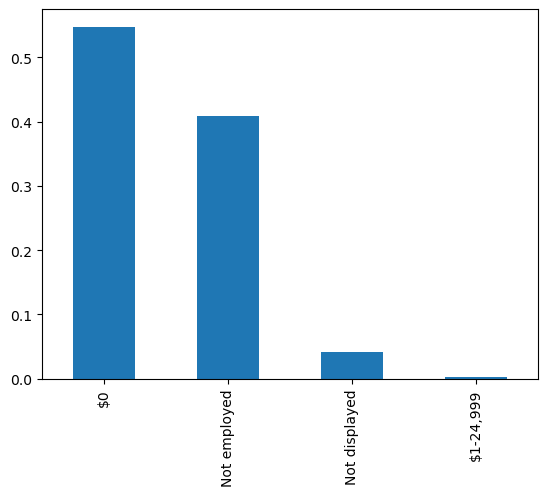

In [38]:
df_loan_status.query('StatedMonthlyIncome == 0').IncomeRange.value_counts(normalize=True).plot.bar()

In [39]:
df_loan_status.query('StatedMonthlyIncome == 0 & IncomeRange == "$1-24,999"')

CreditGrade      Occupation EmploymentStatus IncomeRange  \
43087           A  Sales - Retail        Full-time   $1-24,999   
55170           B           Other        Full-time   $1-24,999   

      LoanOriginationDate                MemberKey  Term  \
43087          2007-07-10  738F339146142197430B6FF    36   
55170          2007-06-11  9B4C33910242409617B06CA    36   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
43087                      NaN           NaN                          0   
55170                      NaN           NaN                          0   

       EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  \
43087                      24.0                  740.0                  759.0   
55170                      53.0                  680.0                  699.0   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
43087                                1.00               0.20   
55170                                0.96              10.01   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
43087                  0.0                       NaN   
55170                  0.0                       NaN   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
43087                          NaN                3820              126.88   
55170                          NaN                7500              312.26   

      LoanStatus  BorrowerAPR  
43087  Completed      0.12700  
55170  Completed      0.29274

Apparement le salaire mensuel pour ces deux lignes est inconnu puisque le statut d'emploiement est full-time.

<AxesSubplot:>

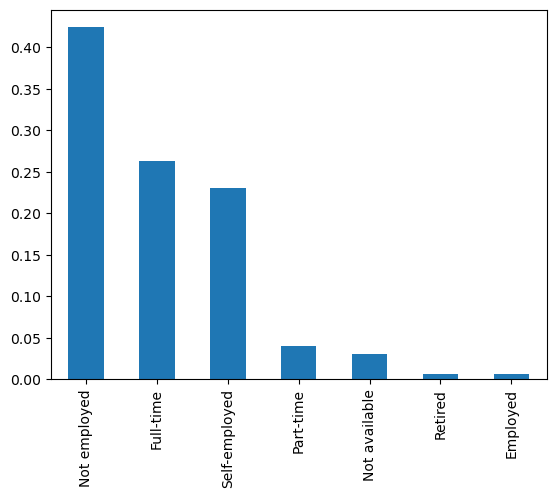

In [40]:
df_loan_status.query('StatedMonthlyIncome == 0').EmploymentStatus.value_counts(normalize=True).plot.bar()

On remarque qu'on a des statuts d'emploiements : Full-time, part-time, et employed parmi les lignes où le salaire mensuel est défint par 0. Voyons le contenu des lignes correspondantes:

In [41]:
df_income_zero_with_job = df_loan_status.query('StatedMonthlyIncome == 0 & EmploymentStatus in ["Full-time","Part-time","Employed","Retired"]')
df_income_zero_with_job

CreditGrade          Occupation EmploymentStatus IncomeRange  \
78               A             Realtor        Full-time          $0   
108              C           Executive        Full-time          $0   
772             AA               Other        Full-time          $0   
954              C           Principal        Full-time          $0   
1822             E   Retail Management        Full-time          $0   
...            ...                 ...              ...         ...   
112398          AA               Other          Retired          $0   
113409           B               Other        Full-time          $0   
113485           B       Skilled Labor        Full-time          $0   
113608         NaN  Sales - Commission         Employed          $0   
113686           A               Other        Full-time          $0   

       LoanOriginationDate                MemberKey  Term  \
78              2008-07-08  D77734052911579724BCDD5    36   
108             2008-05-09  34F93419082777341558B78    36   
772             2008-04-15  33313390658251495A144FE    36   
954             2008-04-24  AEA63413280733493B66661    36   
1822            2007-12-18  FB9733654055843608D0707    36   
...                    ...                      ...   ...   
112398          2007-05-30  E4D23379032731659A8AF0B    36   
113409          2007-11-23  F62433681152495415568C2    36   
113485          2008-06-09  D8CF3392717841450B750B9    36   
113608          2011-07-29  DD963503228294113D59593    60   
113686          2007-12-13  F6EA34048867335192E230D    36   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
78                          NaN           NaN                          3   
108                         NaN           NaN                          1   
772                         NaN           NaN                          1   
954                         NaN           NaN                          3   
1822                        NaN           NaN                          2   
...                         ...           ...                        ...   
112398                      NaN           NaN                          0   
113409                      NaN           NaN                          0   
113485                      NaN           NaN                          4   
113608                      4.0           6.0                          1   
113686                      NaN           NaN                          0   

        EmploymentStatusDuration  CreditScoreRangeLower  \
78                          68.0                  720.0   
108                         27.0                  640.0   
772                          2.0                  820.0   
954                         54.0                  660.0   
1822                       170.0                  580.0   
...                          ...                    ...   
112398                      87.0                  860.0   
113409                       7.0                  680.0   
113485                      12.0                  680.0   
113608                       8.0                  660.0   
113686                      26.0                  740.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
78                      739.0                                1.00   
108                     659.0                                0.85   
772                     839.0                                1.00   
954                     679.0                                0.88   
1822                    599.0                                0.74   
...                       ...                                 ...   
112398                  879.0                                1.00   
113409                  699.0                                0.94   
113485                  699.0                                1.00   
113608                  679.0                                1.00   
113686                  759.0           

la plupart de ces lignes ont un IncomeRange = 0$, on considère donc que ce sont des valeurs inconnu à supprimer.

Aux états unis le salaire minimal est définit à 7.25$ par heure et un emplois full-time correspond à un minimum d'heures 30 heures par semaine ce qui donne un salaire minimum par mois de 870$, vérifions si c'est le cas au niveau de ce dataset :

In [42]:
df_loan_status.query('StatedMonthlyIncome < 870 & EmploymentStatus == "Full-time"')

CreditGrade     Occupation EmploymentStatus    IncomeRange  \
78               A        Realtor        Full-time             $0   
108              C      Executive        Full-time             $0   
226              D          Other        Full-time  Not displayed   
772             AA          Other        Full-time             $0   
954              C      Principal        Full-time             $0   
...            ...            ...              ...            ...   
112712           D          Other        Full-time      $1-24,999   
113407           C          Other        Full-time      $1-24,999   
113409           B          Other        Full-time             $0   
113485           B  Skilled Labor        Full-time             $0   
113686           A          Other        Full-time             $0   

       LoanOriginationDate                MemberKey  Term  \
78              2008-07-08  D77734052911579724BCDD5    36   
108             2008-05-09  34F93419082777341558B78    36   
226             2007-03-07  0E243382750780180A98377    36   
772             2008-04-15  33313390658251495A144FE    36   
954             2008-04-24  AEA63413280733493B66661    36   
...                    ...                      ...   ...   
112712          2008-01-23  7B8A33660740310807D7132    36   
113407          2008-02-15  AD173403480233281BF3FE1    36   
113409          2007-11-23  F62433681152495415568C2    36   
113485          2008-06-09  D8CF3392717841450B750B9    36   
113686          2007-12-13  F6EA34048867335192E230D    36   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
78                          NaN           NaN                          3   
108                         NaN           NaN                          1   
226                         NaN           NaN                          0   
772                         NaN           NaN                          1   
954                         NaN           NaN                          3   
...                         ...           ...                        ...   
112712                      NaN           NaN                          3   
113407                      NaN           NaN                          4   
113409                      NaN           NaN                          0   
113485                      NaN           NaN                          4   
113686                      NaN           NaN                          0   

        EmploymentStatusDuration  CreditScoreRangeLower  \
78                          68.0                  720.0   
108                         27.0                  640.0   
226                          9.0                  600.0   
772                          2.0                  820.0   
954                         54.0                  660.0   
...                          ...                    ...   
112712                      13.0                  620.0   
113407                      25.0                  640.0   
113409                       7.0                  680.0   
113485                      12.0                  680.0   
113686                      26.0                  740.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
78                      739.0                                1.00   
108                     659.0                                0.85   
226                     619.0                                0.95   
772                     839.0                                1.00   
954                     679.0                                0.88   
...                       ...                                 ...   
112712                  639.0                                1.00   
113407                  659.0                                0.50   
113409                  699.0                                0.94   
113485                  699.0                                1.00   
113686                  759.0                                1.0

On remarque qu'il y a des salaires < 800 pour des job full-time et qui ont des occupations qui correspondent à des salaires minimum bien supérieur à ce qui est définit. 
Là on a du doute entre quel valeur est incorrecte (statut d'emploiement, occupation ou le salaire mensuel) donc on supprimera ces lignes puisqu'elle ne sont pas assez nombreuse.

On suppose que quelqu'un aui prendra un crédit aura au moins 100$ par mois. Vérifions les salaires < 100:

In [43]:
df_loan_status.query('StatedMonthlyIncome < 100')

CreditGrade      Occupation EmploymentStatus    IncomeRange  \
78               A         Realtor        Full-time             $0   
100            NaN           Other     Not employed   Not employed   
108              C       Executive        Full-time             $0   
146              A             NaN              NaN  Not displayed   
170            NaN           Other     Not employed   Not employed   
...            ...             ...              ...            ...   
113626           A             NaN              NaN  Not displayed   
113682         NaN           Other     Not employed   Not employed   
113686           A           Other        Full-time             $0   
113767          HR           Other    Self-employed             $0   
113803           B  Sales - Retail    Self-employed             $0   

       LoanOriginationDate                MemberKey  Term  \
78              2008-07-08  D77734052911579724BCDD5    36   
100             2013-01-30  CEE83539008163122ED9B62    36   
108             2008-05-09  34F93419082777341558B78    36   
146             2006-08-29  862A3365213342789F57EB7    36   
170             2012-04-17  0B3A35450946276237DF676    36   
...                    ...                      ...   ...   
113626          2006-09-05  0668336539701022236C70C    36   
113682          2012-01-17  EBE5351272522740954AE3B    60   
113686          2007-12-13  F6EA34048867335192E230D    36   
113767          2008-02-04  48573410660081558A9CA02    36   
113803          2008-08-12  57DF33738770980933C5777    36   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
78                          NaN           NaN                          3   
100                         1.0           3.0                         13   
108                         NaN           NaN                          1   
146                         NaN           NaN                          0   
170                         3.0           5.0                          7   
...                         ...           ...                        ...   
113626                      NaN           NaN                          0   
113682                      3.0           5.0                          1   
113686                      NaN           NaN                          0   
113767                      NaN           NaN                          3   
113803                      NaN           NaN                          7   

        EmploymentStatusDuration  CreditScoreRangeLower  \
78                          68.0                  720.0   
100                         12.0                  720.0   
108                         27.0                  640.0   
146                          NaN                  740.0   
170                          9.0                  760.0   
...                          ...                    ...   
113626                       NaN                  720.0   
113682                      87.0                  760.0   
113686                      26.0                  740.0   
113767                      22.0                  520.0   
113803                      34.0                  680.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
78                      739.0                                1.00   
100                     739.0                                1.00   
108                     659.0                                0.85   
146                     759.0                                 NaN   
170                     779.0                                1.00   
...                       ...                                 ...   
113626                  739.0                                 NaN   
113682                  779.0                                1.00   
113686                  759.0                                1.00   
113767                  539.0                                0.00   
113803                  699.0                       

Comme dernière vérification, on doute si les 0 des colonnes numeriques sont effectivement des 0 ou ils représentent des valeurs manquantes, c'est ce qu'on verifiera par la suite : 

In [44]:
df_loan_status.describe()

Term  ProsperRating (numeric)  ProsperScore  \
count  55084.000000             26005.000000  26005.000000   
mean      36.942851                 3.662911      6.265987   
std        7.333480                 1.814450      2.319612   
min       12.000000                 1.000000      1.000000   
25%       36.000000                 2.000000      5.000000   
50%       36.000000                 3.000000      6.000000   
75%       36.000000                 5.000000      8.000000   
max       60.000000                 7.000000     11.000000   

       ListingCategory (numeric)  EmploymentStatusDuration  \
count               55084.000000              47473.000000   
mean                    2.407578                 80.895878   
std                     3.397823                 84.669661   
min                     0.000000                  0.000000   
25%                     0.000000                 21.000000   
50%                     1.000000                 52.000000   
75%                     3.000000                112.000000   
max                    20.000000                755.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper  \
count           54494.000000           54494.000000   
mean              671.746247             690.746247   
std                81.908137              81.908137   
min                 0.000000              19.000000   
25%               640.000000             659.000000   
50%               680.000000             699.000000   
75%               720.000000             739.000000   
max               880.000000             899.000000   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
count                        47544.000000       50854.000000   
mean                             0.856399           0.289866   
std                              0.174057           0.736738   
min                              0.000000           0.000000   
25%                              0.770000           0.130000   
50%                              0.920000           0.200000   
75%                              1.000000           0.300000   
max                              1.000000          10.010000   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
count         55084.000000              10539.000000   
mean           5054.723018               7104.678315   
std            5711.051112               6395.297342   
min               0.000000                  0.000000   
25%            2810.604167               3000.000000   
50%            4166.666667               5000.000000   
75%            6250.000000               9500.000000   
max          618547.833333              60001.000000   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
count                 10539.000000        55084.000000        55084.000000   
mean                   2332.674796         6261.892746          223.729882   
std                    3285.130455         5217.758039          185.727523   
min                       0.000000         1000.000000            0.000000   
25%                       0.000000         2600.000000           98.290000   
50%                    1098.020000         4500.000000          172.600000   
75%                    3382.560000         8000.000000          300.472500   
max                   22586.670000        35000.000000         2251.510000   

        BorrowerAPR  
count  55059.000000  
mean       0.222194  
std        0.088177  
min        0.006530  
25%        0.149740  
50%        0.214340  
75%        0.295100  
max        0.512290

Les variables à verifier sont les suivantes : EmploymentStatusDuration, TradesNeverDelinquent, DebtToIncomeRatio.

Afin de vérifier le cas de la variable `TradesNeverDelinquent` on se basera sur les valeurs de `CreditScoreRangeLower`, si ces valeurs sonyt assez faible donc il est possible que le crediteur est toujours en délinquences par rapport  ses payements.

In [45]:
df_loan_status.loc[df_loan_status['TradesNeverDelinquent (percentage)'] == 0,'CreditScoreRangeLower'].describe()

count     51.000000
mean     518.039216
std      116.017578
min        0.000000
25%      520.000000
50%      520.000000
75%      530.000000
max      740.000000
Name: CreditScoreRangeLower, dtype: float64

La medianne est à 520 qui est considéré comme une valeur faible, par conséquent ces valeurs ne reprsentent pas des valeurs manquantes.

Passons maintenant à la variable `EmploymentStatusDuration`:

In [46]:
df_loan_status.query('EmploymentStatusDuration == 0 & EmploymentStatus != "Not employed"')

CreditGrade           Occupation EmploymentStatus     IncomeRange  \
443              A   Sales - Commission        Full-time  $25,000-49,999   
589              D         Professional        Full-time  $25,000-49,999   
754            NaN         Professional         Employed  $25,000-49,999   
804            NaN                Other         Employed  $25,000-49,999   
991            NaN  Computer Programmer         Employed  $75,000-99,999   
...            ...                  ...              ...             ...   
112252           E              Dentist        Full-time              $0   
112959          AA            Executive        Full-time       $100,000+   
113125           E              Analyst        Full-time  $25,000-49,999   
113466         NaN                Other            Other  $50,000-74,999   
113503         NaN         Professional        Full-time       $1-24,999   

       LoanOriginationDate                MemberKey  Term  \
443             2007-12-12  493E33654938822447A0B4F    36   
589             2007-03-13  80513367885883028D9BA1F    36   
754             2012-10-24  E5583560494700733E7F662    36   
804             2011-06-27  FF8A351838845452653814E    36   
991             2013-03-01  EDA73571034718063A03677    12   
...                    ...                      ...   ...   
112252          2008-07-01  22D73423483179178AC7B09    36   
112959          2007-03-08  770F3378836893721C4950D    36   
113125          2007-12-19  13D433987929061856E0050    36   
113466          2012-05-24  2DCD35480331567288CA0FA    36   
113503          2010-02-25  5DB434754656845987B6323    36   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
443                         NaN           NaN                          0   
589                         NaN           NaN                          0   
754                         6.0           9.0                          3   
804                         3.0           6.0                          7   
991                         5.0           4.0                          1   
...                         ...           ...                        ...   
112252                      NaN           NaN                          4   
112959                      NaN           NaN                          0   
113125                      NaN           NaN                          4   
113466                      4.0           6.0                          1   
113503                      3.0           7.0                          7   

        EmploymentStatusDuration  CreditScoreRangeLower  \
443                          0.0                  740.0   
589                          0.0                  600.0   
754                          0.0                  800.0   
804                          0.0                  680.0   
991                          0.0                  700.0   
...                          ...                    ...   
112252                       0.0                  560.0   
112959                       0.0                  760.0   
113125                       0.0                  580.0   
113466                       0.0                  740.0   
113503                       0.0                  760.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
443                     759.0                                1.00   
589                     619.0                                0.70   
754                     819.0                                1.00   
804                     699.0                                1.00   
991                     719.0                                1.00   
...                       ...                                 ...   
112252                  579.0                                0.73   
112959                  779.0                                0.88   
113125                  599.0                                1.00   
113466                  759.0                    

Apparement il y a pas mal de ligne où la durée d'emploiement est definit à 0 alors que les statut d'emploiement est différent de `Not employed`. On supprimera donc cette colonne puisqu'elle n'est pas vraiment primordiale pour l'analyse.

In [47]:
df_loan_status.drop('EmploymentStatusDuration', axis = 1, inplace = True)

# test
assert 'EmploymentStatusDuration' not in df_loan_status.columns.values

On passe maintenant à la vérfication de la variable `DebtToIncomeRatio`:

In [48]:
df_loan_status.query('DebtToIncomeRatio == 0')

CreditGrade                         Occupation EmploymentStatus  \
935             AA                              Other        Full-time   
8066           NaN  Police Officer/Correction Officer         Employed   
11312           AA                            Realtor        Full-time   
17411          NaN                       Professional         Employed   
19798            E                Computer Programmer    Not available   
42672           AA                            Analyst        Full-time   
59329          NaN                       Professional         Employed   
63123           AA                Computer Programmer    Not available   
65521           HR                          Executive    Not available   
76903           AA                                NaN              NaN   
78431            C                          Executive        Full-time   
82754            B                          Executive    Not available   
83697           AA                              Other    Not available   
97558           HR                                NaN              NaN   
97784          NaN                              Other        Full-time   
102090          NC                              Other    Not available   
103704          AA                Computer Programmer    Not available   

          IncomeRange LoanOriginationDate                MemberKey  Term  \
935         $100,000+          2008-03-28  7A4B3414926714371A530E6    36   
8066        $100,000+          2011-04-26  4A4635120865562207697F6    36   
11312   Not displayed          2007-03-21  D5D73379897640778CE86DC    36   
17411       $100,000+          2011-05-06  70343511744352918C2AEA6    36   
19798   Not displayed          2006-12-15  8DC8337350298591354E1B8    36   
42672       $100,000+          2007-07-16  F4203393331145016D31D4A    36   
59329       $100,000+          2011-05-02  55BB35113494085578B7FFE    36   
63123   Not displayed          2006-11-21  CE4C337184565383654AD8B    36   
65521   Not displayed          2006-10-27  68F033656864123684CBBBE    36   
76903   Not displayed          2006-07-11  63CD3364918051654E38AA5    36   
78431       $100,000+          2007-08-20  4CD73396243292237260213    36   
82754   Not displayed          2006-08-29  DB3233663569909464FE268    36   
83697   Not displayed          2007-02-15  4A98337712025383188AA5C    36   
97558   Not displayed          2006-07-07  77E033648541512633997FA    36   
97784       $100,000+          2010-02-26  B9D43476517621544B10EF2    36   
102090  Not displayed          2006-08-07  DEE23366444392492A10BBF    36   
103704  Not displayed          2006-09-21  0C713365918393496936356    36   

        ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
935                         NaN           NaN                          4   
8066                        1.0           4.0                          1   
11312                       NaN           NaN                          0   
17411                       2.0           5.0                          1   
19798                       NaN           NaN                          0   
42672                       NaN           NaN                          0   
59329                       5.0           8.0                          7   
63123                       NaN           NaN                          0   
65521                       NaN           NaN                          0   
76903                       NaN           NaN                          0   
78431                       NaN           NaN                          0   
82754                       NaN           NaN                          0   
83697                       NaN           NaN                          0   
97558                       NaN           NaN                          0   
97784                       4.0           9.0                          2   
102090                      NaN           NaN                          0   
103704       

Normalement cette variable est calculé comme étant le ratio de ce que la personne a comme crédit sur comme bien elle gagne, si c'est 0 donc cette personne n'a aucun crédit alors que d'après le résultat précedent ce n'est pas le cas, donc on supprimera ces lignes.

Voyons maintenant la valeur min du taux d'intérêt :

In [49]:
df_loan_status.BorrowerAPR.describe()

count    55059.000000
mean         0.222194
std          0.088177
min          0.006530
25%          0.149740
50%          0.214340
75%          0.295100
max          0.512290
Name: BorrowerAPR, dtype: float64

In [50]:
df_loan_status.query('BorrowerAPR < 0.01')

CreditGrade               Occupation EmploymentStatus    IncomeRange  \
53558          HR                 Clerical    Not available  Not displayed   
76858           C  Food Service Management        Full-time      $1-24,999   
78401           D                    Other    Not available  Not displayed   

      LoanOriginationDate                MemberKey  Term  \
53558          2006-10-18  DA973371389610730AA66DF    36   
76858          2007-03-27  F0AC3377846854835F2B667    36   
78401          2006-10-23  8C9E337004758482904CED7    36   

       ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
53558                      NaN           NaN                          0   
76858                      NaN           NaN                          0   
78401                      NaN           NaN                          0   

       CreditScoreRangeLower  CreditScoreRangeUpper  \
53558                  480.0                  499.0   
76858                  660.0                  679.0   
78401                  600.0                  619.0   

       TradesNeverDelinquent (percentage)  DebtToIncomeRatio  \
53558                                 NaN               0.04   
76858                                0.33               0.06   
78401                                 NaN               0.11   

       StatedMonthlyIncome  ProsperPrincipalBorrowed  \
53558          1733.333333                       NaN   
76858          1833.333333                       NaN   
78401          3500.000000                       NaN   

       ProsperPrincipalOutstanding  LoanOriginalAmount  MonthlyLoanPayment  \
53558                          NaN                2600               72.46   
76858                          NaN                3000               83.33   
78401                          NaN                5000              138.89   

      LoanStatus  BorrowerAPR  
53558  Defaulted      0.00864  
76858  Completed      0.00653  
78401  Completed      0.00653

Il apparait qu'on a un seul enregistrement avec un taux d'intérêt < 0.01 et qui a une valeur très faible par rapport au reste des valeurs malgrès que le créditeur ne montre pas un profil exceptionnel. On supprimera donc cette ligne.

> Problèmes de qualité : 
>1. Données manquantes
>2. Mettre les variables ordinale dans le bon ordre
>3. Valeur de rating `NC` inconnue 
>4. La valeur `Not employed` de `Incomerange` devrait être 0 et les valeurs ne doivent pas contenir le symbole `$`.
>5. Corriger le nom des colonnes qui ont des espaces.
>6. Pour les données manquantes de la colonne ListingCategory on a deux valuers qui représentent des données manquantes : Not available et other.
>7. Corriger `EmploymentStatus` des étudiants
>8. `StatedMonthlyIncome` == 0 alors que l'occupation est full-time et `IncomeRange` est > 1
>9. Des salaires < 870 alors que le statut d'emploiement est full-time
>10. DebtToIncomeRatio == 0 pour des montants de crédit > 0
>11. Les lignes du dataframe `df_income_zero_with_job` ont un salaire mensuel inconnu.
>12. Remplacer `IncomeStatus` == $0 où le statut d'emploiement est (full-time, part-time, retired) par `Not displayed`.
>13. Supprimer les lignes ayant un salaire mensuel < 100
>14. Statut d'emploiement `Not employed` alors que l'occupation est différente de (student et other) -> corriger statut d'emploiement et income range.
>15. Corriger les valeurs de `IncomeRange` et `EmploymentStatus`  des occupations (Student et Other) pour les lignes où le salaire mensuel est différent de 0.
>16. Deux valeurs inconnu pour `EmploymentStatus` (Not available et Other)
>17. Taux d'intérêt très faible à la ligne 76858.


### Nettoyage du dataset

#### Issue 1:  Les lignes du dataframe `df_income_zero_with_job` ont un salaire mensuel inconnu.

Remplacer ces valeurs par des Nan.

In [51]:
df_loan_status.loc[df_income_zero_with_job.index, "StatedMonthlyIncome"] = np.nan

# test
assert df_loan_status.loc[df_income_zero_with_job.index].StatedMonthlyIncome.isnull().sum() == len(df_income_zero_with_job)

#### Issue 2 : Données manquantes

- Mettre `NR` à la place des nan pour credit grade (Not Rated)
- Mettre `Not available` pour employemnt status
- Mettre `Not displayed` pour income range

Pour le reste des colonnes on supprimera celles qui ont plus de 50% des données manquantes, puis pour le reste des colonnes qui n'ont pas trop de valeurs manquantes on supprimera les lignes ayant das valeurs manquantes.

In [52]:
df_loan_status = df_loan_status.copy()
df_loan_status.CreditGrade.replace(np.nan, 'NR', inplace = True)
df_loan_status.EmploymentStatus.replace(np.nan, 'Not available', inplace = True)
df_loan_status.IncomeRange.replace(np.nan, 'Not displayed', inplace = True)

THRESHOLD = 0.5
isnull_cols = df_loan_status.isnull().sum()/len(df_loan_status)
cols_to_keep = isnull_cols[isnull_cols <= THRESHOLD].index
df_loan_status = df_loan_status[cols_to_keep]

df_loan_status.dropna(inplace = True)


# test
for col in df_loan_status.columns:
    assert df_loan_status[col].isnull().sum() == 0


#### Issue 3 : Valeur de rating `NC` inconnue

Remplacer cette valeur par `NR`.

In [53]:
df_loan_status.CreditGrade.replace('NC', 'NR', inplace = True)

# Test
assert 'NC' not in df_loan_status.CreditGrade.values

#### Issue 4 : La valeur `Not employed` de `Incomerange` devrait être 0 et les valeurs ne doivent pas contenir le symbole $

Remplacer cette valeur par 0 et supprimer le symbole $

In [54]:
df_loan_status.IncomeRange.replace('Not employed', '0', inplace = True)
df_loan_status.IncomeRange = df_loan_status.IncomeRange.str.strip('$')

# test
assert 'Not employed' not in df_loan_status.IncomeRange.values
assert df_loan_status.IncomeRange.str.contains('$', regex = False).sum() == 0


#### Issue 5 : Deux valeurs inconnu pour `EmploymentStatus` (Not available et Other)

- Mettre "Not available" à la place de "Other".

In [55]:
df_loan_status.EmploymentStatus.replace("Other", "Not available", inplace = True)

# Test
assert "Other" not in df_loan_status.EmploymentStatus.unique()

#### Issue 6 : Statut d'emploiement `Not employed` alors que l'occupation est différente de (student et other)

- Corriger le statut d'emploiement et IncomeRange pour ces lignes.

In [56]:
mask = (df_loan_status.EmploymentStatus == "Not employed") & (~df_loan_status.Occupation.str.contains('Student|Other', regex = True, na=False))
df_loan_status.loc[mask, ["EmploymentStatus", "IncomeRange", "Occupation"]]

EmploymentStatus    IncomeRange          Occupation
3494       Not employed              0  Sales - Commission
12976      Not employed              0        Psychologist
23186      Not employed              0        Professional
30657      Not employed              0             Analyst
46168      Not employed              0      Teacher's Aide
48124      Not employed  Not displayed   Retail Management
51591      Not employed              0           Homemaker
52485      Not employed              0      Sales - Retail
59043      Not employed              0           Homemaker
59790      Not employed              0           Homemaker
63607      Not employed              0   Retail Management
79151      Not employed              0        Nurse's Aide
82145      Not employed              0           Homemaker
82933      Not employed              0     Waiter/Waitress
83221      Not employed       100,000+           Homemaker
99010      Not employed              0           Homemaker
99066      Not employed              0       Skilled Labor
105503     Not employed              0       Skilled Labor
109111     Not employed              0           Homemaker

In [57]:
df_loan_status.loc[mask, ["IncomeRange", "EmploymentStatus"]] = ["Not displayed","Not available"]

# Test
assert df_loan_status.loc[mask, "IncomeRange"].unique() == ["Not displayed"]
assert df_loan_status.loc[mask, "EmploymentStatus"].unique() == ["Not available"]

df_loan_status.loc[mask, ["EmploymentStatus", "IncomeRange", "Occupation"]]

EmploymentStatus    IncomeRange          Occupation
3494      Not available  Not displayed  Sales - Commission
12976     Not available  Not displayed        Psychologist
23186     Not available  Not displayed        Professional
30657     Not available  Not displayed             Analyst
46168     Not available  Not displayed      Teacher's Aide
48124     Not available  Not displayed   Retail Management
51591     Not available  Not displayed           Homemaker
52485     Not available  Not displayed      Sales - Retail
59043     Not available  Not displayed           Homemaker
59790     Not available  Not displayed           Homemaker
63607     Not available  Not displayed   Retail Management
79151     Not available  Not displayed        Nurse's Aide
82145     Not available  Not displayed           Homemaker
82933     Not available  Not displayed     Waiter/Waitress
83221     Not available  Not displayed           Homemaker
99010     Not available  Not displayed           Homemaker
99066     Not available  Not displayed       Skilled Labor
105503    Not available  Not displayed       Skilled Labor
109111    Not available  Not displayed           Homemaker

#### Issue 7 : Variables ordinal non ordonnées

Mettre les varaibles ordinales en ordre

In [58]:
# variables ordinales : CreditGrade, IncomeRange
ordianl_cols = {
    'CreditGrade' : ['NR','HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
    'IncomeRange' : ['Not displayed','Not employed', '0', '1-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000+']
}

for col, values in ordianl_cols.items():
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories=values)
    df_loan_status[col] = df_loan_status[col].astype(ordered_var)

# test
for col in ordianl_cols.keys():
    print(f'{col:-<20}{df_loan_status[col].unique()}')

CreditGrade---------['C', 'NR', 'D', 'E', 'HR', 'A', 'B', 'AA']
Categories (8, object): ['NR' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']
IncomeRange---------['25,000-49,999', '1-24,999', '50,000-74,999', '75,000-99,999', '100,000+', '0', 'Not displayed']
Categories (8, object): ['Not displayed' < 'Not employed' < '0' < '1-24,999' < '25,000-49,999' < '50,000-74,999' < '75,000-99,999' < '100,000+']


#### Issue 8 : Corriger le nom des colonnes qui ont des espaces

Laisser uniquement la première valeur.

In [59]:
df_loan_status.sample(1)

CreditGrade    Occupation EmploymentStatus IncomeRange  \
113564          NR  Professional         Employed    100,000+   

       LoanOriginationDate                MemberKey  Term  \
113564          2011-06-08  B71533678641960921F53A6    36   

        ListingCategory (numeric)  CreditScoreRangeLower  \
113564                          7                  740.0   

        CreditScoreRangeUpper  TradesNeverDelinquent (percentage)  \
113564                  759.0                                 1.0   

        DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
113564                0.2          9646.666667                4500   

        MonthlyLoanPayment LoanStatus  BorrowerAPR  
113564              145.82  Completed        0.124

In [60]:
df_loan_status.rename(lambda x : x.split()[0], axis = 1,inplace = True)

# test
for col in df_loan_status.columns.values:
    len(col.split()) == 1

#### Issue 9 : Pour les données manquantes de la colonne ListingCategory on a deux valeurs qui représentent des données manquantes : Not available et other
Garder uniquement la valeur Other.

In [61]:
df_loan_status.ListingCategory.replace(0,7, inplace = True)

# test
assert df_loan_status.query('ListingCategory == 0').shape[0] == 0

#### Issue 10 : Corriger `EmploymentStatus` des étudiants

In [62]:
df_loan_status.loc[df_loan_status.Occupation.str.contains('Student'), 'EmploymentStatus'] = "Part-time"

# test
assert df_loan_status.loc[df_loan_status.Occupation.str.contains('Student'), 'EmploymentStatus'].unique() == ['Part-time']

#### Issue 11 : `StatedMonthlyIncome` == 0 alors que l'occupation est full-time et `IncomeRange` est > 1

Supprimer les deux lignes concerné.

In [63]:
df_loan_status.drop(df_loan_status.query('StatedMonthlyIncome == 0').index,axis = 0, inplace = True)

# test
assert df_loan_status.query('StatedMonthlyIncome == 0').shape[0] == 0

#### Issue 12 : Des salaires < 870 alors que le statut d'emploiement est full-time

Supprimer ces lignes.

In [64]:
df_loan_status.drop(df_loan_status.query('StatedMonthlyIncome < 870 & EmploymentStatus == "Full-time"').index, axis = 0, inplace = True)

#test
assert df_loan_status.query('StatedMonthlyIncome < 870 & EmploymentStatus == "Full-time"').shape[0] == 0

#### Issue 13 : debtToIncomeRatio == 0 pour des montants de crédit > 0

Supprimer ces lignes

In [65]:
df_loan_status.drop(df_loan_status.query('DebtToIncomeRatio == 0').index, axis = 0, inplace = True)

# test
assert df_loan_status.query('DebtToIncomeRatio == 0').shape[0] == 0

#### Issue 14 : `IncomeStatus` == $0 pour le statut d'emploiement (full-time, part-time, retired)

Remplacer ces valeurs par `Not displayed`.

In [66]:
mask = (df_loan_status.IncomeRange == "0") & (df_loan_status.EmploymentStatus.isin(["Full-time","Part-time","Retired"]))
df_loan_status.loc[mask, "IncomeRange"] = "Not displayed"

# test
assert df_loan_status.query('IncomeRange == "0" & EmploymentStatus in ["Full-time","Part-time","Retired"]').shape[0] == 0

#### Issue 15 : Salaire mensuel < 100

Suprimer ces lignes.

In [67]:
df_loan_status.drop(df_loan_status.query('StatedMonthlyIncome < 100').index, axis=0, inplace = True)

#test
assert df_loan_status.query('StatedMonthlyIncome < 100').shape[0] == 0

#### Issue 16 : Corriger les valeurs de `IncomeRange` et `EmploymentStatus`  des occupations (Student et Other) pour les lignes où le salaire mensuel est différent de 0.

- Mettre la valeur correcte pour `IncomeRange` et la valeur `Not available` pour `EmploymetStatus`

In [68]:
mask = (df_loan_status.EmploymentStatus == "Not employed") & (df_loan_status.Occupation.str.contains('Student|Other', regex = True, na=False)) & (df_loan_status.StatedMonthlyIncome > 0)
df_loan_status.loc[mask, ["EmploymentStatus", "IncomeRange", "StatedMonthlyIncome"]]

EmploymentStatus    IncomeRange  StatedMonthlyIncome
66         Not employed              0           860.000000
4683       Not employed              0           623.000000
4791       Not employed              0          2926.000000
9564       Not employed              0           833.333333
9911       Not employed              0          1000.000000
10949      Not employed              0           583.333333
14599      Not employed              0           175.000000
15088      Not employed       1-24,999          1421.000000
18423      Not employed              0          3500.000000
19100      Not employed       1-24,999           303.500000
20103      Not employed              0          3633.000000
22873      Not employed  25,000-49,999          3833.333333
22905      Not employed              0           125.250000
25650      Not employed              0           856.000000
26669      Not employed              0          1360.000000
28164      Not employed  25,000-49,999          3820.000000
28185      Not employed              0           828.000000
38889      Not employed              0          2775.916667
42332      Not employed              0          4126.416667
54605      Not employed              0           868.000000
55381      Not employed       1-24,999           560.000000
57163      Not employed              0          2166.666667
60735      Not employed              0           900.000000
64388      Not employed       1-24,999          1028.000000
67076      Not employed              0          2025.000000
68426      Not employed  25,000-49,999          2750.000000
76229      Not employed              0          1014.000000
79698      Not employed              0           643.000000
80471      Not employed              0          2348.000000
83721      Not employed  Not displayed           600.000000
86265      Not employed              0          1400.000000
87620      Not employed              0          1250.000000
88171      Not employed              0           393.416667
88504      Not employed              0           839.666667
88628      Not employed              0           964.333333
89811      Not employed  25,000-49,999          2685.000000
92119      Not employed              0          4000.000000
92994      Not employed       1-24,999           315.416667
93230      Not employed              0          1507.000000
95718      Not employed       1-24,999          2000.000000
98204      Not employed              0           669.000000
104014     Not employed              0           875.000000
105687     Not employed              0          9096.000000
106081     Not employed              0          3000.000000
107228     Not employed              0          4166.666667
109052     Not employed              0          1409.250000
109600     Not employed              0          1000.000000
112778     Not employed              0          2972.000000
113692     Not employed              0          1289.000000

In [69]:
df_loan_status.loc[mask, "EmploymentStatus"] = "Not available"


def set_income_range(data):
    if data.StatedMonthlyIncome < 2500:
        return df_loan_status.IncomeRange.cat.categories[3]
    elif (data.StatedMonthlyIncome > 2500) & (data.StatedMonthlyIncome < 5000):
         return df_loan_status.IncomeRange.cat.categories[4]
    elif (data.StatedMonthlyIncome > 5000 )& (data.StatedMonthlyIncome < 7500):
        return df_loan_status.IncomeRange.cat.categories[5]
    elif (data.StatedMonthlyIncome > 7500) & (data.StatedMonthlyIncome < 9000):
        return df_loan_status.IncomeRange.cat.categories[6]
    else:
        return df_loan_status.IncomeRange.cat.categories[7]

df_loan_status.loc[mask, "IncomeRange"] = df_loan_status.loc[mask, ["StatedMonthlyIncome", "IncomeRange"]].apply(set_income_range, axis=1)
df_loan_status.loc[mask, ["StatedMonthlyIncome", "IncomeRange", "EmploymentStatus"]] 

StatedMonthlyIncome    IncomeRange EmploymentStatus
66               860.000000       1-24,999    Not available
4683             623.000000       1-24,999    Not available
4791            2926.000000  25,000-49,999    Not available
9564             833.333333       1-24,999    Not available
9911            1000.000000       1-24,999    Not available
10949            583.333333       1-24,999    Not available
14599            175.000000       1-24,999    Not available
15088           1421.000000       1-24,999    Not available
18423           3500.000000  25,000-49,999    Not available
19100            303.500000       1-24,999    Not available
20103           3633.000000  25,000-49,999    Not available
22873           3833.333333  25,000-49,999    Not available
22905            125.250000       1-24,999    Not available
25650            856.000000       1-24,999    Not available
26669           1360.000000       1-24,999    Not available
28164           3820.000000  25,000-49,999    Not available
28185            828.000000       1-24,999    Not available
38889           2775.916667  25,000-49,999    Not available
42332           4126.416667  25,000-49,999    Not available
54605            868.000000       1-24,999    Not available
55381            560.000000       1-24,999    Not available
57163           2166.666667       1-24,999    Not available
60735            900.000000       1-24,999    Not available
64388           1028.000000       1-24,999    Not available
67076           2025.000000       1-24,999    Not available
68426           2750.000000  25,000-49,999    Not available
76229           1014.000000       1-24,999    Not available
79698            643.000000       1-24,999    Not available
80471           2348.000000       1-24,999    Not available
83721            600.000000       1-24,999    Not available
86265           1400.000000       1-24,999    Not available
87620           1250.000000       1-24,999    Not available
88171            393.416667       1-24,999    Not available
88504            839.666667       1-24,999    Not available
88628            964.333333       1-24,999    Not available
89811           2685.000000  25,000-49,999    Not available
92119           4000.000000  25,000-49,999    Not available
92994            315.416667       1-24,999    Not available
93230           1507.000000       1-24,999    Not available
95718           2000.000000       1-24,999    Not available
98204            669.000000       1-24,999    Not available
104014           875.000000       1-24,999    Not available
105687          9096.000000       100,000+    Not available
106081          3000.000000  25,000-49,999    Not available
107228          4166.666667  25,000-49,999    Not available
109052          1409.250000       1-24,999    Not available
109600          1000.000000       1-24,999    Not available
112778          2972.000000  25,000-49,999    Not available
113692          1289.000000       1-24,999    Not available

#### Issue 17 : Taux d'intérêt très faible à la ligne 76858

- Supprimer cette ligne

In [70]:
df_loan_status.drop(76858, axis=0, inplace=True)

# test
assert 76858 not in df_loan_status.index.values

In [71]:
df_loan_status.shape

(43079, 17)

In [72]:
df_loan_status.to_csv("data/prosperLoanDataCleaned.csv", index=False)

### What is the structure of your dataset?

> le dataset contient 113937 lignes et 81 colonnes, dont la majorité est de type quantitatif(61) alors que 20 d'entre eux sont de type qualitatif.

### What is/are the main feature(s) of interest in your dataset?

> Dans cette étude on s'interesse plutot à étudier les variables qui impactent le résultat du statut de crédit et l' APR, donc les colonnes principales seront `LoanStatus` et `BorrowerAPR`.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> On suspecte que les variables qui sont en relation avec le statut du créditeur comme son salaire et les variables lié à son historique des crédits, aussi la date de l'obtention de crédit (qui peut être lié à une période d'inflation) auront le plus d'impacte sur le status final du crédit.
Donc les variables qu'on a choisit sont les suivantes : 
CreditGrade, Occupation, EmploymentStatus, IncomeRange, LoanOriginationDate, Term, ListingCategory, CreditScoreRangeLower, CreditScoreRangeUpper,	TradesNeverDelinquent,	DebtToIncomeRatio, StatedMonthlyIncome, LoanOriginalAmount, MonthlyLoanPayment, Recommendations.

## Univariate Exploration


On commencera d'abord par visualiser la variable `LoanStatus`:

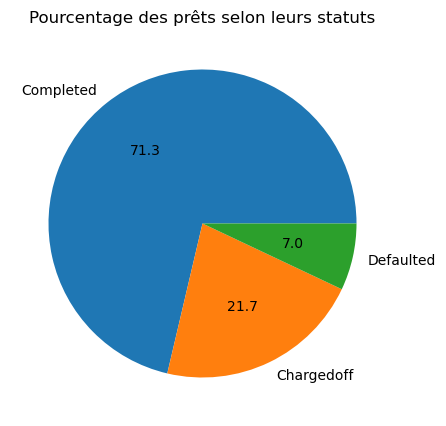

In [73]:
plt.figure(figsize=(5,5))
x = df_loan_status['LoanStatus'].value_counts()
plt.pie(x.values, autopct='%.1f', labels = x.index)
plt.title("Pourcentage des prêts selon leurs statuts")
plt.show()

Il apparait qu'on a peu d'echantillons avec le statut `Defaulted` par rapport à ceux avec le statut `Completed`.

Vérifions maintenant la distribution du taux de crédit : 

In [74]:
df_loan_status['BorrowerAPR'].skew(), df_loan_status['BorrowerAPR'].kurtosis()

(0.1710431129095633, -1.127273866695665)

Il apparait qu'on a une distribution legèrement symmetrique, et fortement applatit.
Pour determiner le nombre de bins optimal on utilisera la règle de : Freedman–Diaconis

In [75]:
def freedman_diaconis(data, return_as='width'):
    """Computes the optimal bins width

    Args:
        data (pd.Series): The dataframe column that we wish to plot a histogram for
        returnas: {"width", "bins"}
            If "width", return the estimated width for each histogram bin. 
            If "bins", return the number of bins suggested by rule.
    """
    IQR = data.quantile(0.75) - data.quantile(0.25)
    width= 2 * IQR * np.power(len(data), -(1/3))
    if return_as == "width":
        return width
    else:
        return np.arange(data.min(), data.max()+np.round(width, 3), np.round(width, 3))

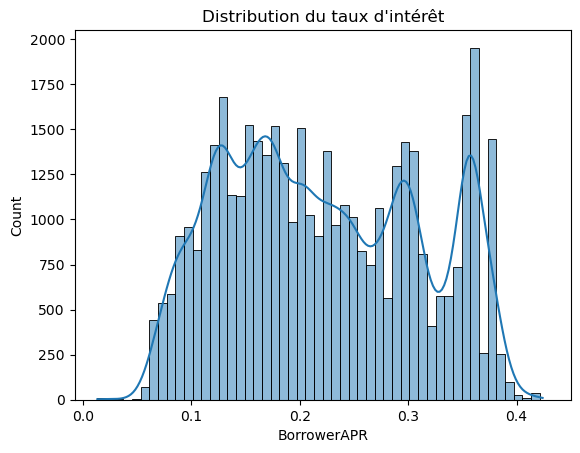

In [76]:
sns.histplot(df_loan_status['BorrowerAPR'], bins = freedman_diaconis(df_loan_status['BorrowerAPR'], 'bins'), kde=True)
plt.title("Distribution du taux d'intérêt")
plt.show()

Il semble que la distribution des taux de crédit est applatit et qu'il n y a pas de valeurs extremes, et qu'on a un mode au niveau de la valeur 0.35.

On passera maintenant à évaluer les variables catégoriques:

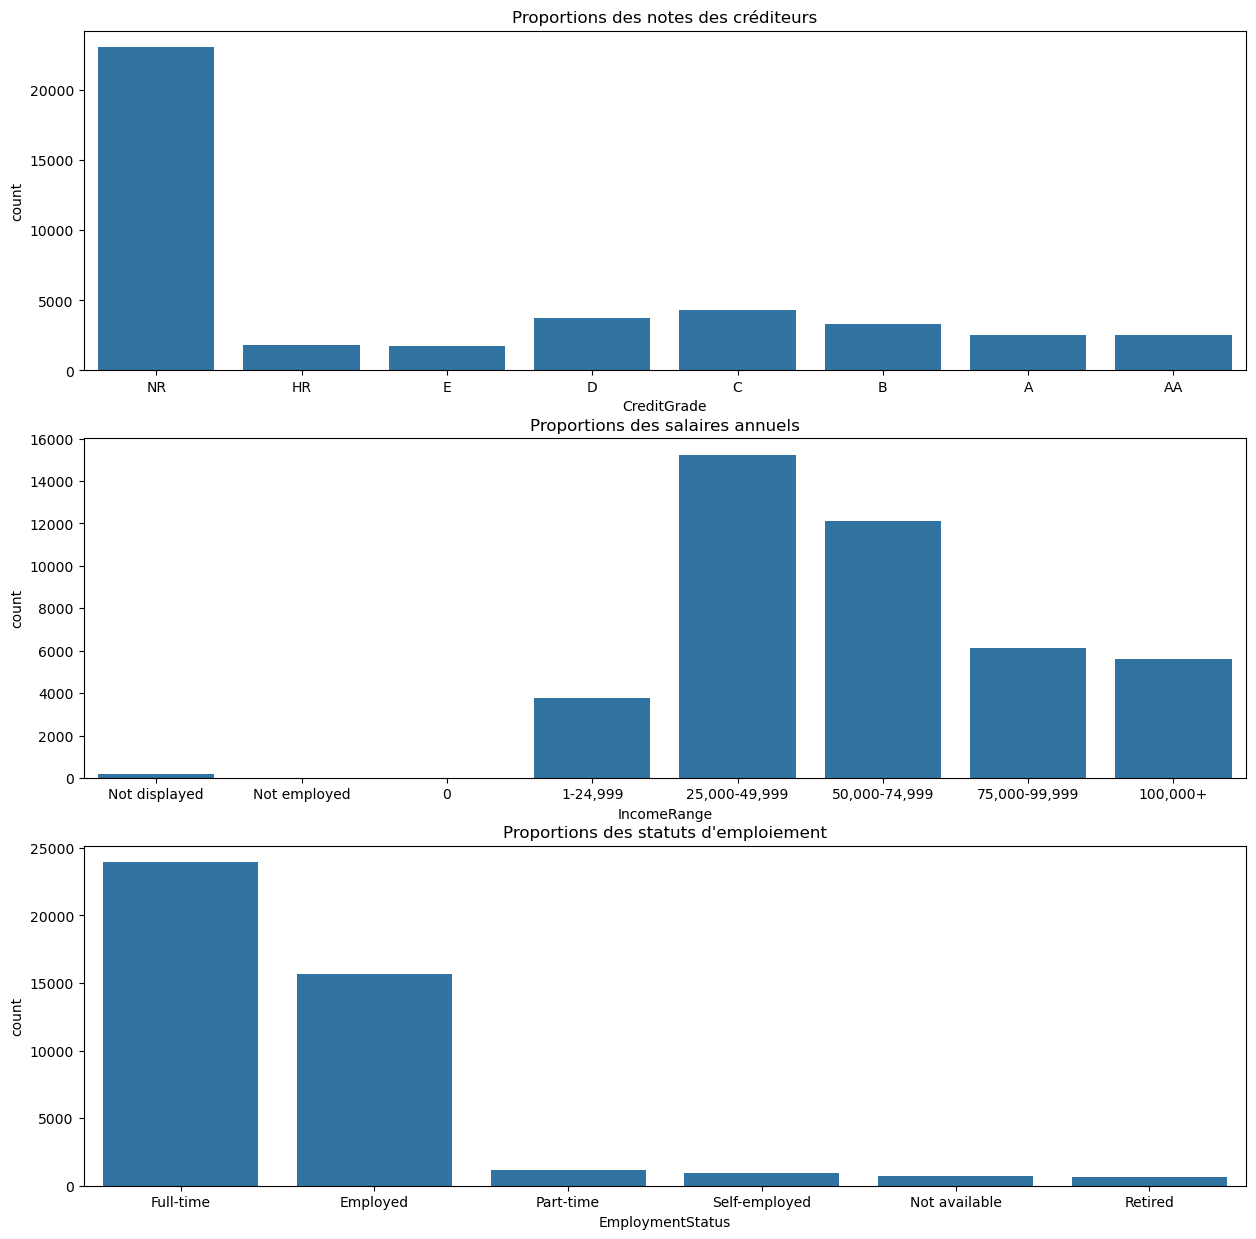

In [77]:
fig, axs = plt.subplots(3,1, figsize = [15,15])
default_color = sns.color_palette()[0]
# on tracera des bar charts pour chaque variable
sns.countplot(data = df_loan_status, x = 'CreditGrade', ax = axs[0], color = default_color).set(title="Proportions des notes des créditeurs")
sns.countplot(data = df_loan_status, x = 'IncomeRange', ax = axs[1], color = default_color).set(title="Proportions des salaires annuels")
sns.countplot(data = df_loan_status, x = 'EmploymentStatus', ax = axs[2], color = default_color, order=df_loan_status.EmploymentStatus.value_counts().index).set(title="Proportions des statuts d'emploiement")

plt.show()

On remarque que dans ce dataset la plupart des créditeurs sont des employé à temps plein avec des salaires superieur à 25000 ce qui explique le grand pourcentage du statut `Completed` qu'on a observé précedement.

Passons maitenant à l' évaluation des variables numériques:

In [78]:
discrete_vars = df_loan_status.select_dtypes('int')
discrete_vars.describe()

Term  ListingCategory  LoanOriginalAmount
count  43079.000000     43079.000000        43079.000000
mean      37.109775         4.166113         6513.869542
std        7.839136         3.516073         5273.484398
min       12.000000         1.000000         1000.000000
25%       36.000000         1.000000         3000.000000
50%       36.000000         3.000000         5000.000000
75%       36.000000         7.000000         8500.000000
max       60.000000        20.000000        35000.000000

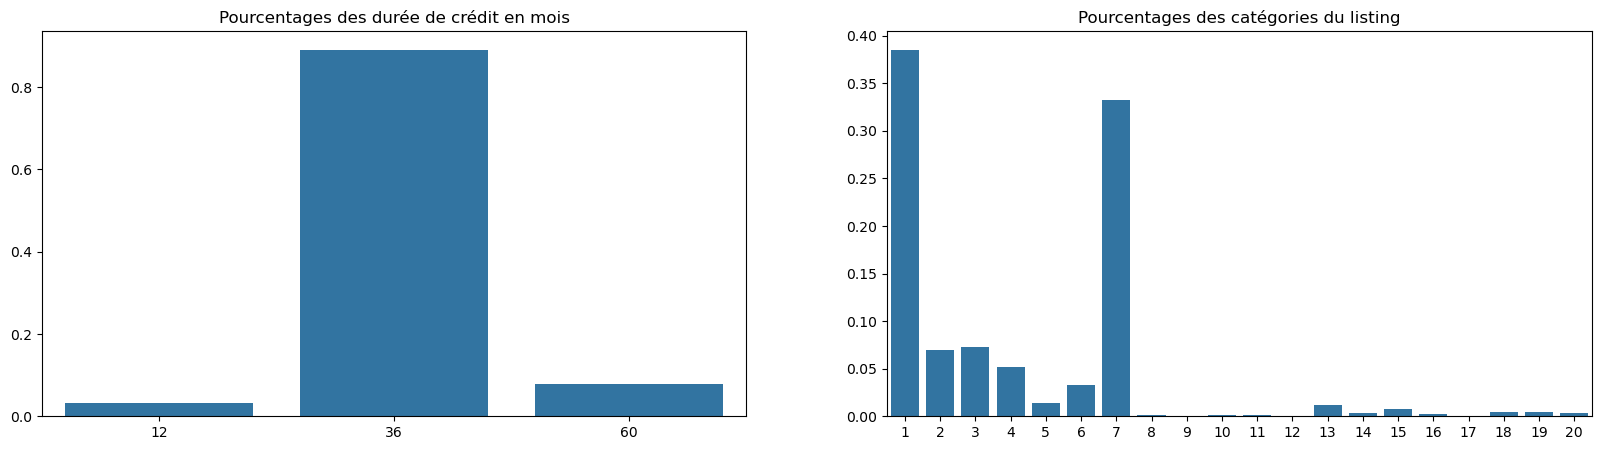

In [79]:
# colonnes : Term / ListingCategory

fig, axs = plt.subplots(1,2, figsize = [20,5])
term_counts = df_loan_status.Term.value_counts(normalize=True)
listing_category_counts = df_loan_status.ListingCategory.value_counts(normalize=True)
sns.barplot(x = term_counts.index, y = term_counts.values, color=default_color, ax = axs[0]).set(title = 'Pourcentages des durée de crédit en mois')
sns.barplot(x = listing_category_counts.index, y = listing_category_counts.values, color=default_color, ax = axs[1]).set(title = 'Pourcentages des catégories du listing')
plt.show()

On remarque que la plupart des crédits (environ 90%) ont une durée de 36 mois, alors que environ 40% des catégories de listing sont `Debt consolidation`.

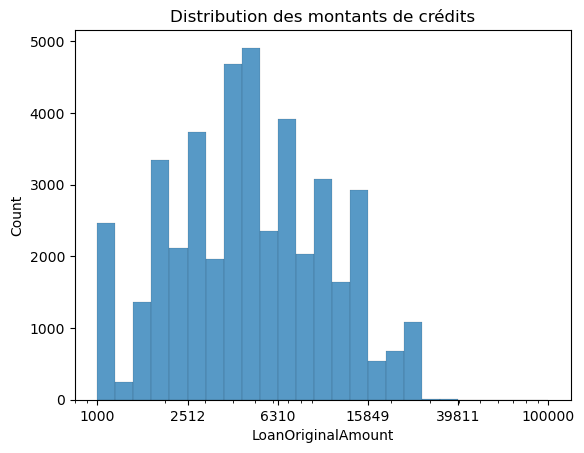

In [80]:
# variable continue : LoanOriginalAmount
bins = 10**np.arange(3,5 + 0.08,0.08)
sns.histplot(df_loan_status.LoanOriginalAmount,bins = bins)
plt.xscale('log')
ticks = 10**np.linspace(3, 5, 6)
plt.xticks(ticks, ['{:.0f}'.format(tick) for tick in ticks])
plt.title("Distribution des montants de crédits")
plt.show()

In [81]:
np.log10(df_loan_status.LoanOriginalAmount).skew(), np.log10(df_loan_status.LoanOriginalAmount).kurtosis()

(-0.024361589902478987, -0.5456539161150977)

D'après cet histogramme on voit que la plupart des montants sont compris entre 2000 et 15000.

Passons maintenant à l'exploration des variables de type float.

In [82]:
continous_vars = df_loan_status.select_dtypes('float64').drop('BorrowerAPR', axis = 1)
continous_vars.describe()

CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
count           43079.000000           43079.000000           43079.000000   
mean              680.972632             699.972632               0.852741   
std                68.086344              68.086344               0.175669   
min               460.000000             479.000000               0.000000   
25%               640.000000             659.000000               0.760000   
50%               680.000000             699.000000               0.920000   
75%               720.000000             739.000000               1.000000   
max               880.000000             899.000000               1.000000   

       DebtToIncomeRatio  StatedMonthlyIncome  MonthlyLoanPayment  
count       43079.000000         43079.000000        43079.000000  
mean            0.244537          5238.581826          231.511189  
std             0.273938          3924.864430          186.331591  
min             0.010000           100.000000            0.000000  
25%             0.130000          3000.000000          105.010000  
50%             0.200000          4375.000000          173.710000  
75%             0.310000          6416.666667          309.610000  
max            10.010000        185081.750000         2251.510000

Pour chacune de ces variables on examinera leur distribution : 

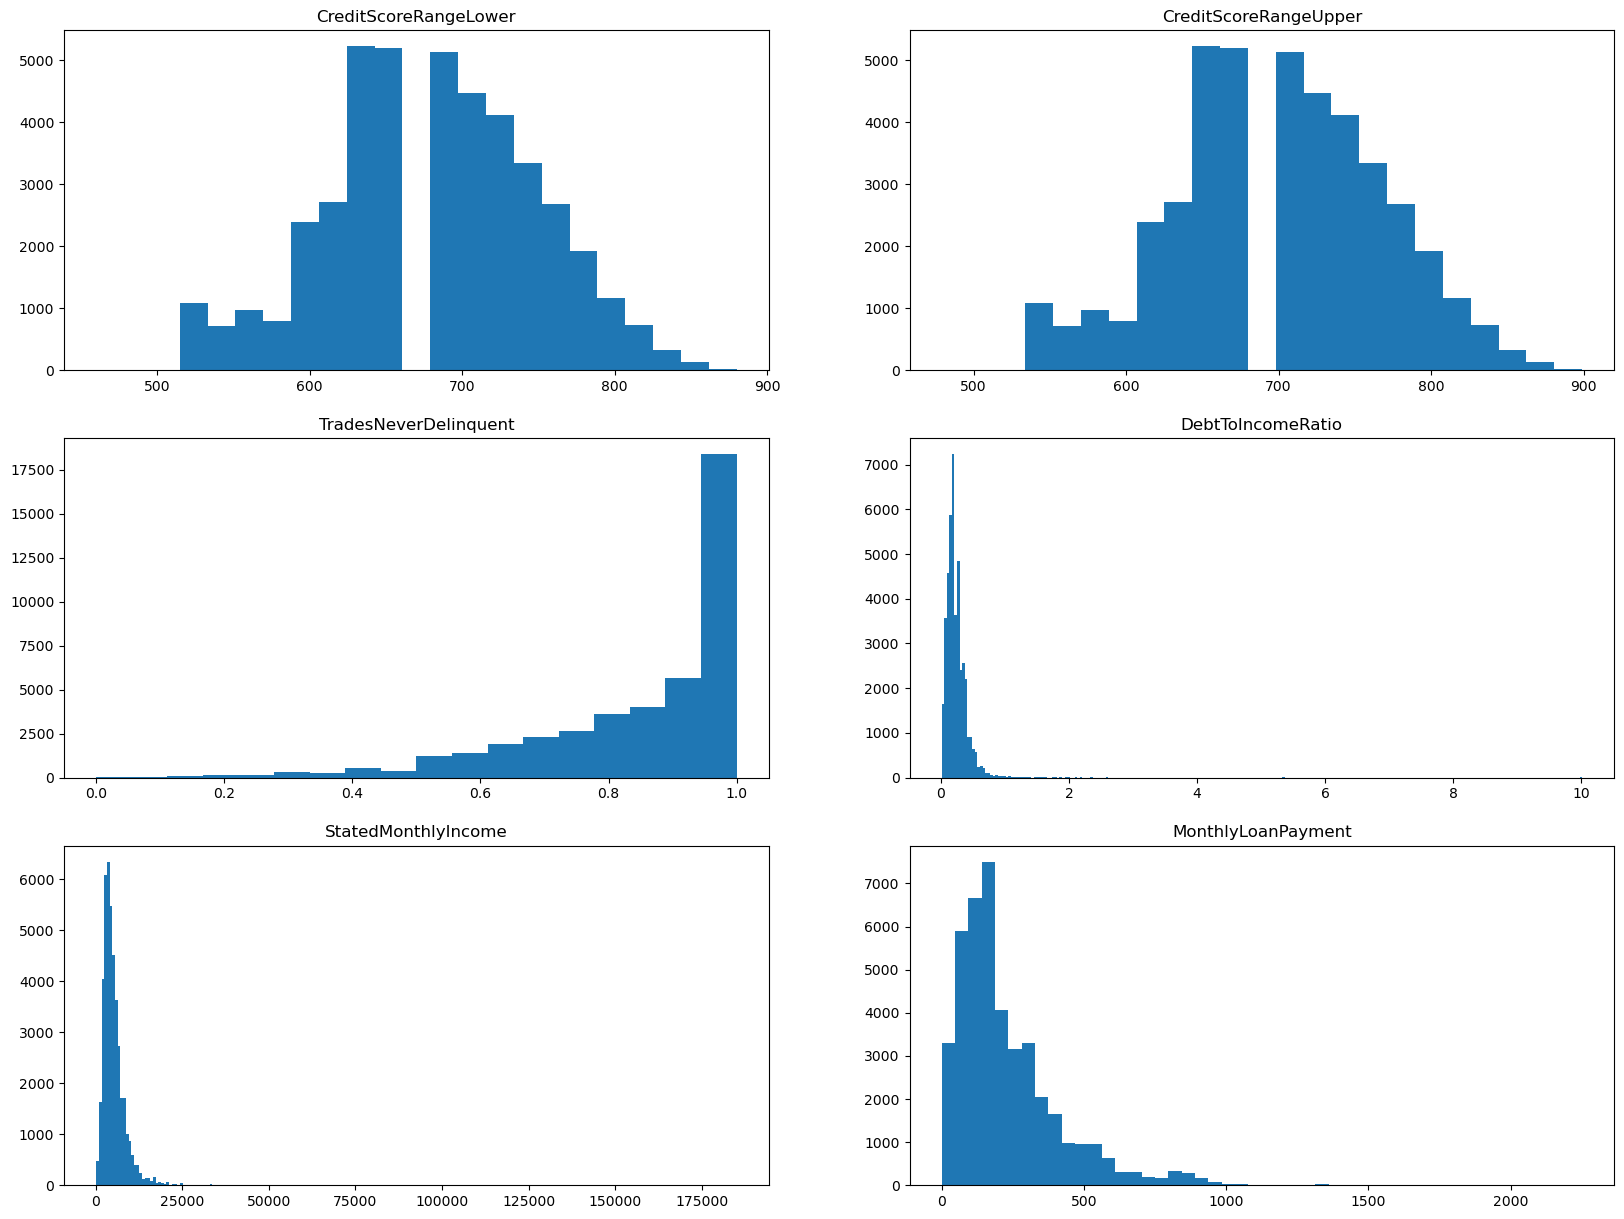

In [83]:
col_num = 2
row_num = 3
fig, axs = plt.subplots(row_num, col_num, figsize = [20,15])

count = 0
for i in range(row_num):
    for j in range(col_num):
        if count >= len(continous_vars.columns): break

        # On a modifié le resultat de la fonction freedman_diaconis puisqu'on avait beaucoup de bruit au niveau de quelques
        # histogrammes
        axs[i,j].hist(continous_vars.iloc[:,count], bins = len(freedman_diaconis(continous_vars.iloc[:,count], 'bins'))//4)
        axs[i,j].set_title(continous_vars.columns[count])
        count = count+1
        
plt.show()

- La distribution des colonnes `CreditScoreRangeLower` et `CreditScoreRangeUpper` semblent à peu près les même avec une translation legère vers la droite pour range upper.
- Pour les valeurs de `TradesNeverDelinquent` la distribution présente une forte inclinaison à droite, ce qui dit que les compte de crédit qui ont toujours des retard par rapport aux paiement sont consideré comme des valeurs extrèmes.
- `DebtToIncomeRatio`, cette distributioin est incliné à gauche et on a des valeurs extrèmes pour les valeurs supérieurs à 0.4
- `MonthlyLoanPayment`, cette distribution est incliné à gauche et la plupart des valeurs ne dépassent pas 250.

On fera un zoom sur la distribution de DebtToIncomeRatio pour voir encore le valeurs en détail :

(-0.49, 1.0)

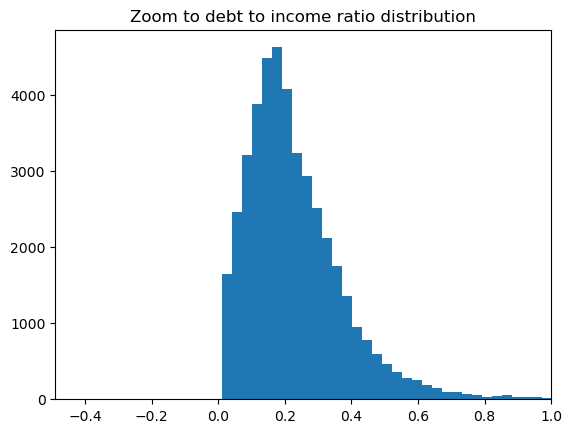

In [84]:
plt.hist(df_loan_status.DebtToIncomeRatio, bins = len(freedman_diaconis(df_loan_status.DebtToIncomeRatio, 'bins'))//3)
plt.title('Zoom to debt to income ratio distribution')
plt.xlim(right = 1)

Pour la distribution de `StatedMonthlyIncome`, on a besoin d'une transformation logarithmique puisqu'il y a une très grande marge entre les valeurs:

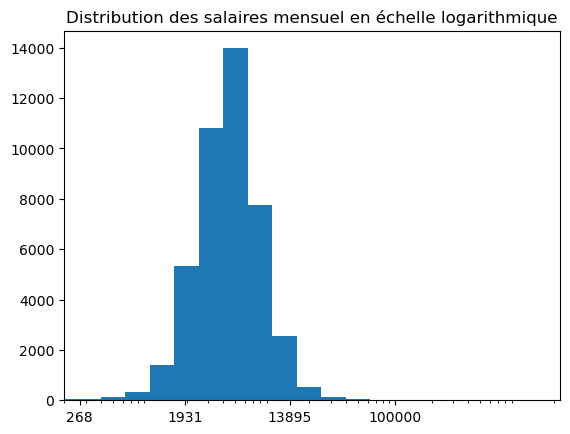

In [85]:
bins_range = 10**(np.arange(-1, 6+0.2, 0.2))
plt.figure()
plt.hist(df_loan_status['StatedMonthlyIncome'], bins = bins_range)
ticks = 10**np.linspace(-1, 5, 8)
plt.xscale('log')
plt.xticks(ticks, ['{:.0f}'.format(xtick) for xtick in ticks])
plt.xlim(left=200)
plt.title("Distribution des salaires mensuel en échelle logarithmique")
plt.show()

d'après l'histogramme on remarque que les salaires mensuels sont en générale compris entre 2000 et 13000.

On vérifiera maintenant si les outliers présents dans les distributions fortement incliné sont des valeurs correctes ou des erreurs de saisi:

Total Outliers : 2003


count      2003.000000
mean      16924.304377
std        9061.091766
min       11546.166667
25%       12500.000000
50%       14166.666667
75%       17500.000000
max      185081.750000
Name: StatedMonthlyIncome, dtype: float64

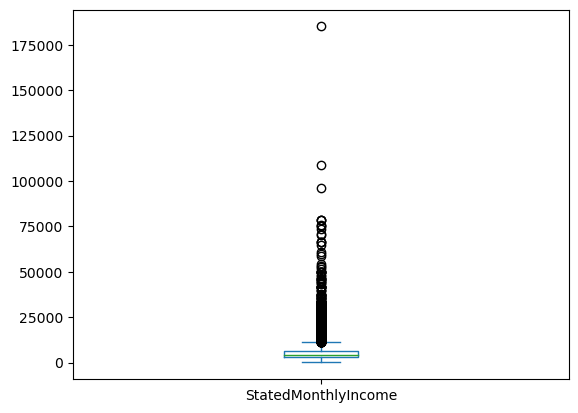

In [86]:
def get_outliers(data):
    """Returns the list of outilers

    Args:
        data (pd.Series): The column of dataframe to verify
    """
    IQR = data.quantile(0.75) - data.quantile(0.25)
    min = data.quantile(0.25) - 1.5 * IQR
    max = data.quantile(0.75) + 1.5 * IQR
    return data[(data > max) | (data < min)]

# StatedMonthlyIncome:
df_loan_status.StatedMonthlyIncome.plot.box()
outliers = get_outliers(df_loan_status.StatedMonthlyIncome)
print(f"Total Outliers : {len(outliers)}")
outliers.describe()

In [87]:
df_loan_status.query("StatedMonthlyIncome > 20000 & IncomeRange != '100,000+'").IncomeRange.value_counts(normalize=True)

Not displayed    0.50
50,000-74,999    0.25
75,000-99,999    0.25
Not employed     0.00
0                0.00
1-24,999         0.00
25,000-49,999    0.00
100,000+         0.00
Name: IncomeRange, dtype: float64

On remarque que quelques lignes contiennent des marges de salaire annuel < 100k parmi les résultats où le salaire mensuel est > 20000.
Voyons ces cas plus en détails:

In [88]:
df_loan_status.query("StatedMonthlyIncome > 20000 & IncomeRange in ['50,000-74,999', '75,000-99,999']")

CreditGrade    Occupation EmploymentStatus    IncomeRange  \
25495           D  Professional        Full-time  50,000-74,999   
93680           B  Professional        Full-time  75,000-99,999   

      LoanOriginationDate                MemberKey  Term  ListingCategory  \
25495          2007-04-19  0B603386231762702E5D8A4    36                7   
93680          2007-03-12  5F743381107437297CE1E52    36                7   

       CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
25495                  600.0                  619.0                   0.95   
93680                  680.0                  699.0                   0.76   

       DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
25495               0.40         64994.666667               13200   
93680               0.13         78333.333333                9800   

       MonthlyLoanPayment LoanStatus  BorrowerAPR  
25495              475.51  Completed      0.20614  
93680              284.00  Completed      0.12500

In [89]:
df_loan_status.query("MemberKey in ['5F743381107437297CE1E52', '0B603386231762702E5D8A4']")

CreditGrade    Occupation EmploymentStatus    IncomeRange  \
25495           D  Professional        Full-time  50,000-74,999   
93680           B  Professional        Full-time  75,000-99,999   

      LoanOriginationDate                MemberKey  Term  ListingCategory  \
25495          2007-04-19  0B603386231762702E5D8A4    36                7   
93680          2007-03-12  5F743381107437297CE1E52    36                7   

       CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
25495                  600.0                  619.0                   0.95   
93680                  680.0                  699.0                   0.76   

       DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
25495               0.40         64994.666667               13200   
93680               0.13         78333.333333                9800   

       MonthlyLoanPayment LoanStatus  BorrowerAPR  
25495              475.51  Completed      0.20614  
93680              284.00  Completed      0.12500

Apparement, on n'a que deux lignes où le salaire mensuel ne correspond pas au salaire annuel alors que le reste est définit comme `Not available`, puisqu'on n'a pas assez d'informations pour déterminer la valeur correcte on supprimera ces deux lignes.

In [90]:
df_loan_status.drop(df_loan_status.query("StatedMonthlyIncome > 20000 & IncomeRange in ['50,000-74,999', '75,000-99,999']").index, axis = 0, inplace = True)

# test
assert df_loan_status.query("StatedMonthlyIncome > 20000 & IncomeRange in ['50,000-74,999', '75,000-99,999']").shape[0] == 0

In [91]:
df_highest_salaries = df_loan_status.query("StatedMonthlyIncome > 20000")
df_highest_salaries.groupby('Occupation')['StatedMonthlyIncome'].median().sort_values()

Occupation
Chemist                       20221.333333
Accountant/CPA                20833.333333
Pilot - Private/Commercial    20833.333333
Homemaker                     20833.333333
Nurse (LPN)                   21666.666667
Truck Driver                  22333.333333
Computer Programmer           22916.666667
Sales - Commission            22916.666667
Dentist                       23750.000000
Attorney                      24263.125000
Retail Management             24583.333333
Executive                     25000.000000
Realtor                       25000.000000
Doctor                        25833.333333
Professional                  26791.666667
Other                         27083.333333
Analyst                       29500.000000
Investor                      34375.000000
Engineer - Chemical           43333.333333
Construction                  51333.333333
Sales - Retail                66666.666667
Nurse (RN)                    96266.500000
Name: StatedMonthlyIncome, dtype: float64

On remarque que quelques occupations (Nurse (RN), Sales-Retail) ont des salaires plus large que les meilleurs salaires en USA pour ces occupations, et la valeur définit représente le salaire max annuel plutôt que mensuel.

> How much does a Retail Sales make in USA? The average retail sales salary in the USA is $31,200 per year or $16 per hour. Entry level positions start at $25,350 per year while most experienced workers make up to $55,000 per year. -- Source : www.talent.com

> The average registered nurse salary in the USA is $73,638 per year or $37.76 per hour. Entry level positions start at $58,500 per year while most experienced workers make up to $114,952 per year. -- Source : www.talent.com

Pour les salaires du domaine de construction le max ne dépasse pas 130k-140k pour les managers par an, donc il va falloir vérifier ce cas.

In [92]:
df_highest_salaries.query('Occupation in ["Nurse (RN)", "Sales - Retail"]')

CreditGrade      Occupation EmploymentStatus IncomeRange  \
59928          NR      Nurse (RN)        Full-time    100,000+   
80092          NR  Sales - Retail         Employed    100,000+   

      LoanOriginationDate                MemberKey  Term  ListingCategory  \
59928          2010-03-24  EBDE3419188956387D701BC    36                1   
80092          2012-08-31  A34B3554452628023256E73    12                3   

       CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
59928                  680.0                  699.0                   0.89   
80092                  680.0                  699.0                   0.71   

       DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
59928               0.01         96266.500000                3000   
80092               0.10         66666.666667               15000   

       MonthlyLoanPayment LoanStatus  BorrowerAPR  
59928              107.59  Completed      0.22135  
80092             1338.28  Completed      0.18526

On n'a que deux enregistrements avec des salires incorrectes, donc on supprimera ces deux lignes.

In [93]:
df_loan_status.drop([59928, 59928], axis=0, inplace = True)

# test
assert not df_loan_status.index.isin([59928, 59928]).any()

Vérifions maintenant les salaires de l'occupation construction:

In [94]:
df_loan_status.query('Occupation == "Construction" & StatedMonthlyIncome > 20000')

CreditGrade    Occupation EmploymentStatus IncomeRange  \
15814            B  Construction        Full-time    100,000+   
62864            A  Construction    Self-employed    100,000+   
94583           AA  Construction        Full-time    100,000+   
100431           C  Construction        Full-time    100,000+   
101793          AA  Construction        Full-time    100,000+   

       LoanOriginationDate                MemberKey  Term  ListingCategory  \
15814           2007-09-12  4E3C33987263003958CCBCE    36                7   
62864           2007-12-04  EC04340374151634956586A    36                7   
94583           2007-09-12  91473381930294171105375    36                7   
100431          2007-05-16  C8003386302521489A5DE84    36                7   
101793          2008-07-24  C1C734249229525336F3411    36                1   

        CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
15814                   700.0                  719.0                   1.00   
62864                   720.0                  739.0                   0.88   
94583                   800.0                  819.0                   0.97   
100431                  640.0                  659.0                   0.65   
101793                  780.0                  799.0                   1.00   

        DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
15814                0.05         58616.666667               25000   
62864                0.06         51333.333333               25000   
94583                0.22         20833.333333                2500   
100431               0.04         70350.000000               25000   
101793               0.08         29166.666667               20000   

        MonthlyLoanPayment  LoanStatus  BorrowerAPR  
15814               941.88   Defaulted      0.21739  
62864               860.52   Defaulted      0.15211  
94583                79.50   Completed      0.09688  
100431             1047.64  Chargedoff      0.29776  
101793              662.85   Completed      0.12550

Pour le max on est allé jusqu'à 20000 par mois, et on se retrouve avec 5 lignes qui dépaseent cette valeur. Malgré que les deux lignes où le salaire ne dépasse pas 30000 ont des valuers élévé au niveau des indicateurs(score/note de crédit) et le statut est completed, mais le salaire reste très élévé par rapport au max, donc on supprimera ces cinq lignes pour ne pas fausser notre étude.

> The average construction manager salary in the USA is $87,921 per year or $45.09 per hour. Entry level positions start at $65,011 per year while most experienced workers make up to $130,000 per year. -- Source : www.talent.com

In [95]:
df_loan_status.drop(df_loan_status.query('Occupation == "Construction" & StatedMonthlyIncome > 20000').index, axis=0,inplace = True)

# Test
assert df_loan_status.query('Occupation == "Construction" & StatedMonthlyIncome > 20000').shape[0] == 0

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Les variables d'intérêt dans cet étude sont le taux d'intéret et le statut du crédit. On remarque que pour le statut de crédit on a un très grand pourcentage pour la valeur `Completed` par rapport aux statuts `Defaulted` et `Chargedoff`.
Pour le taux d'intérét, la distribution représente une faible inclinainson vers la droite et est largement applatit, les valeurs entre 0.1 et 0.3 semblent avoir à peu près la même fréquence avec un mode au tour de 0.35. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Pour les autres variables, il fallait effectué une transformation logarithmique pour le montant du crédit et le salaire mensuel puisqu'il y avait une très grande différence entre les valeurs. On avait aussi des outliers au niveau du salaire mensuel qui depassait la limite pour certaines occuaptions.

## Bivariate Exploration

Dans une première partie on étudiera la relation entre les targets et les varaibles selectionné précédemment, on commencera d'abord par étudier l'effet des variables sur le taux d'interêt:

#### 1. Relation entre variables catégoriques et taux d'intérêt

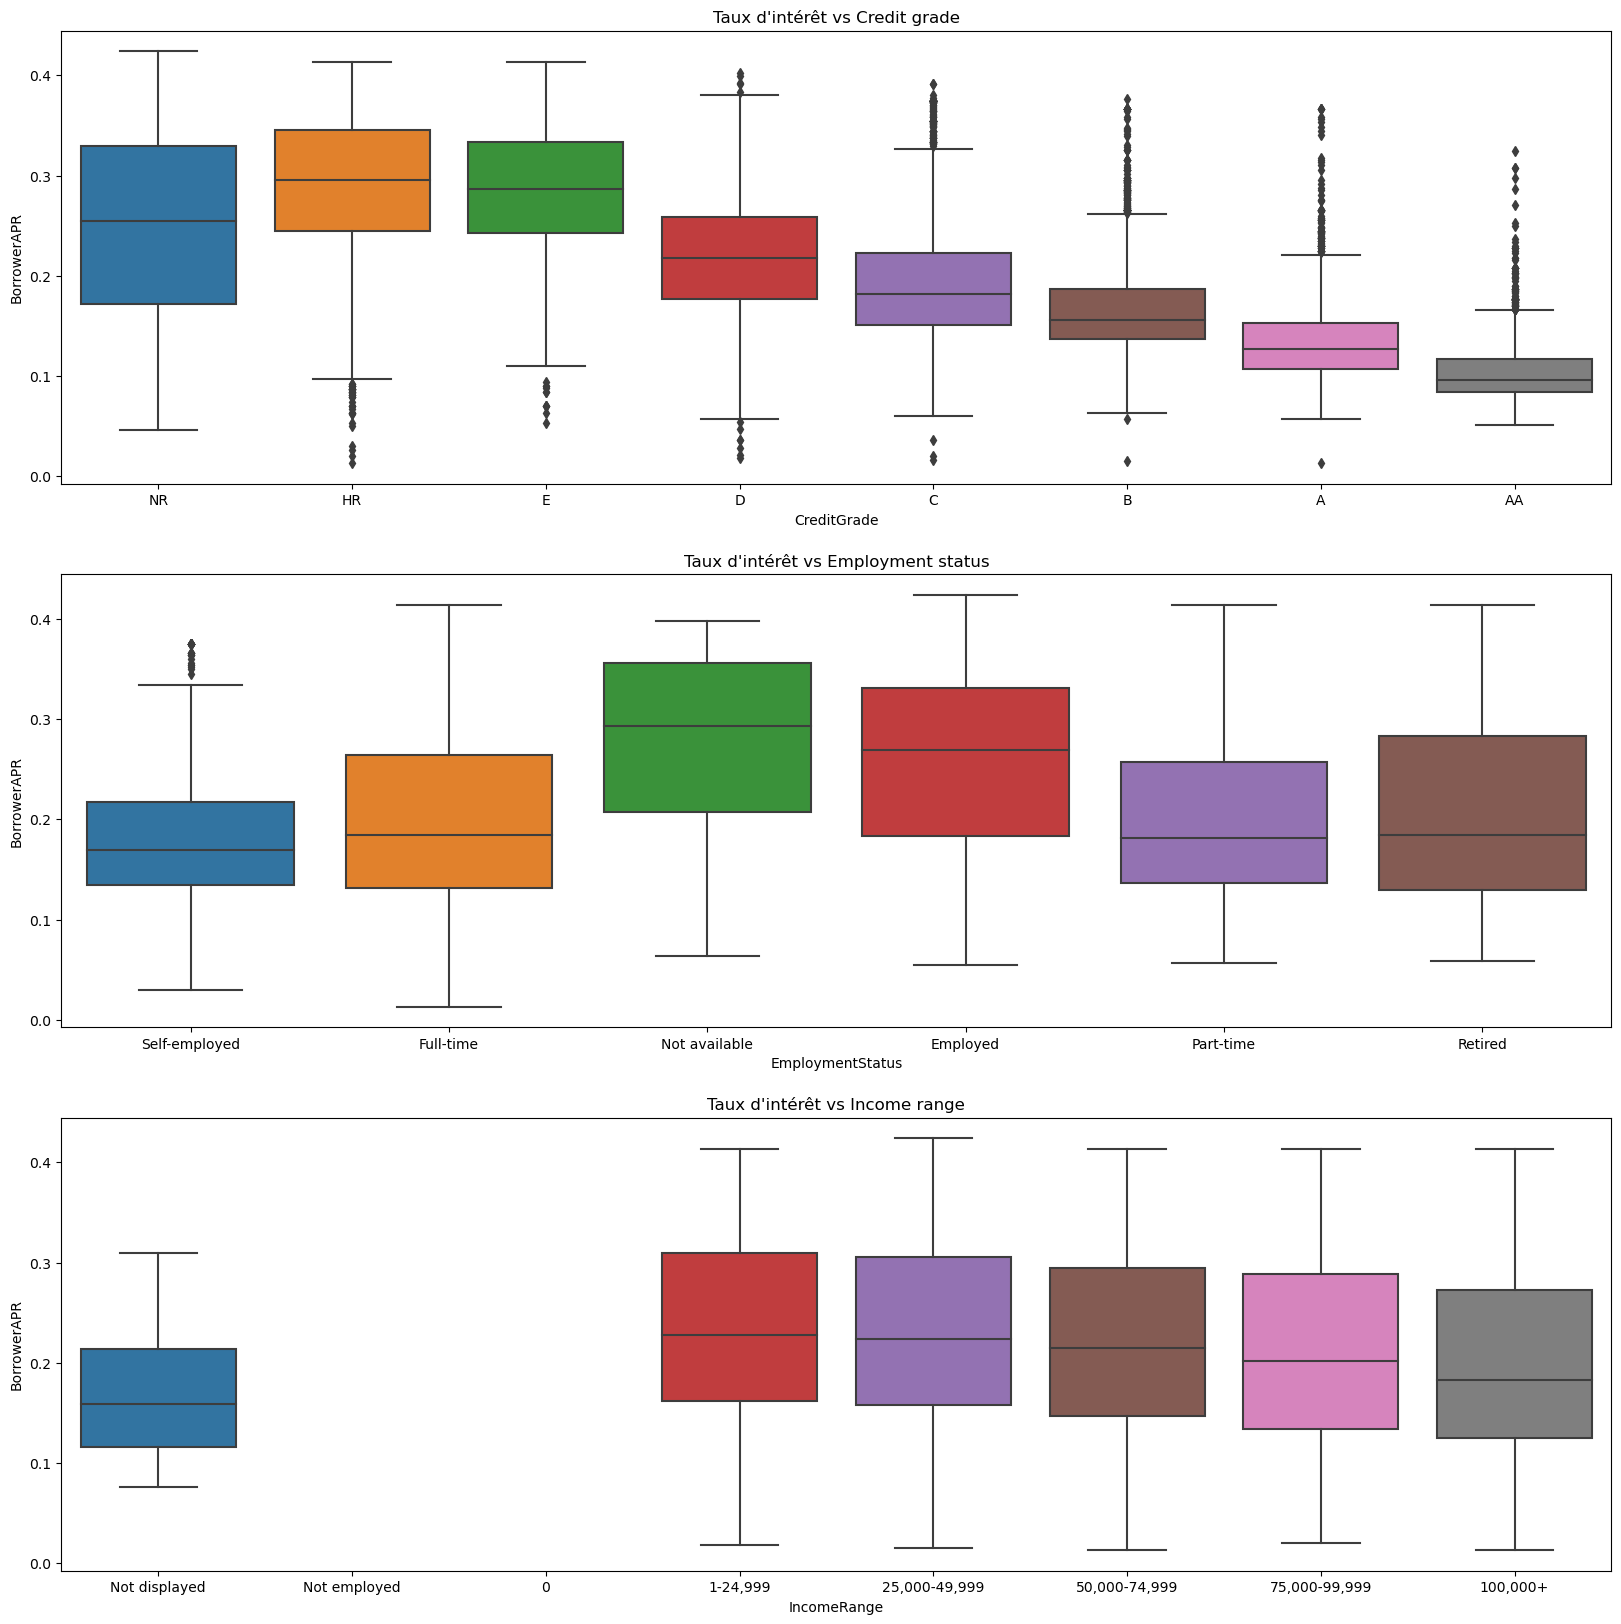

In [96]:
# make box plots for each variable
fig, axs = plt.subplots(3,1)
fig.set_figwidth(20)
fig.set_figheight(20)
sns.boxplot(data = df_loan_status, x = 'CreditGrade', y = 'BorrowerAPR', ax = axs[0]).set(title="Taux d'intérêt vs Credit grade")
sns.boxplot(data = df_loan_status, x = 'EmploymentStatus', y = 'BorrowerAPR', ax = axs[1]).set(title="Taux d'intérêt vs Employment status")
sns.boxplot(data = df_loan_status, x = 'IncomeRange', y = 'BorrowerAPR', ax = axs[2]).set(title="Taux d'intérêt vs Income range")
plt.show()

- Pour la variable `IncomeRange` il apparait qu'il y a une décroissance languissante du taux d'intérêt avec la croissance du salaire.
- Pour `CreditGrade` on voit bien qu'il y a une decroissance du taux de crédit pour les meilleurs notes.
- Pour le statut d'emploiement, la valeur `Self Employed` a la médianne et l'écart interquartile les plus faibles avec quelques outliers pour des taux élévé, alors que (Full-time, part-time et retired) ont à peu près la même medianne sauf que les retraités ont un écart interquartile plus large.

#### 2. Relation entre la date d'initiation du crédit et le taux d'intérêt

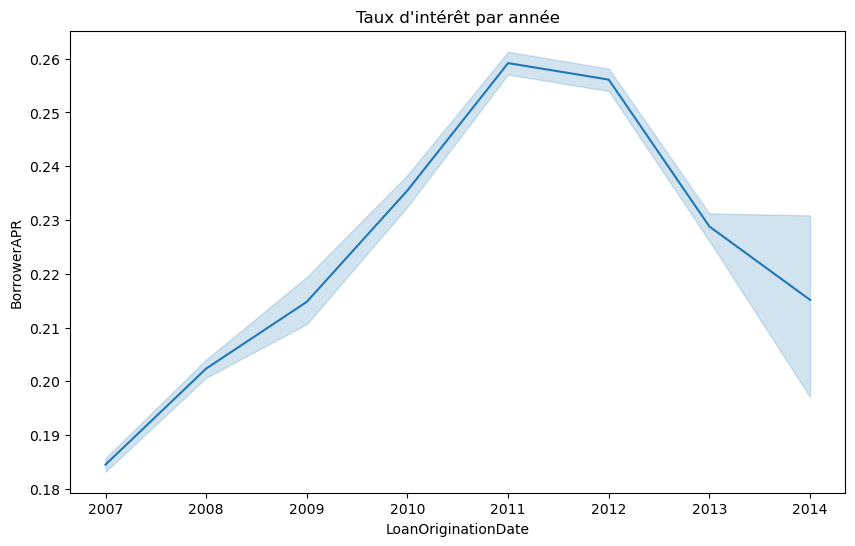

In [97]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_loan_status, x = df_loan_status.LoanOriginationDate.dt.year, y = 'BorrowerAPR')
plt.title("Taux d'intérêt par année")
plt.show()

On remarque d'après le graphe précédent qu'il y avait une très grande croissance entre les années 2007 et 2011, et puis pour les années suivantes le taux d'interêt a commencé à décroitre. Prenant un regard encors plus détaillé sur les années 2007 et 2008.

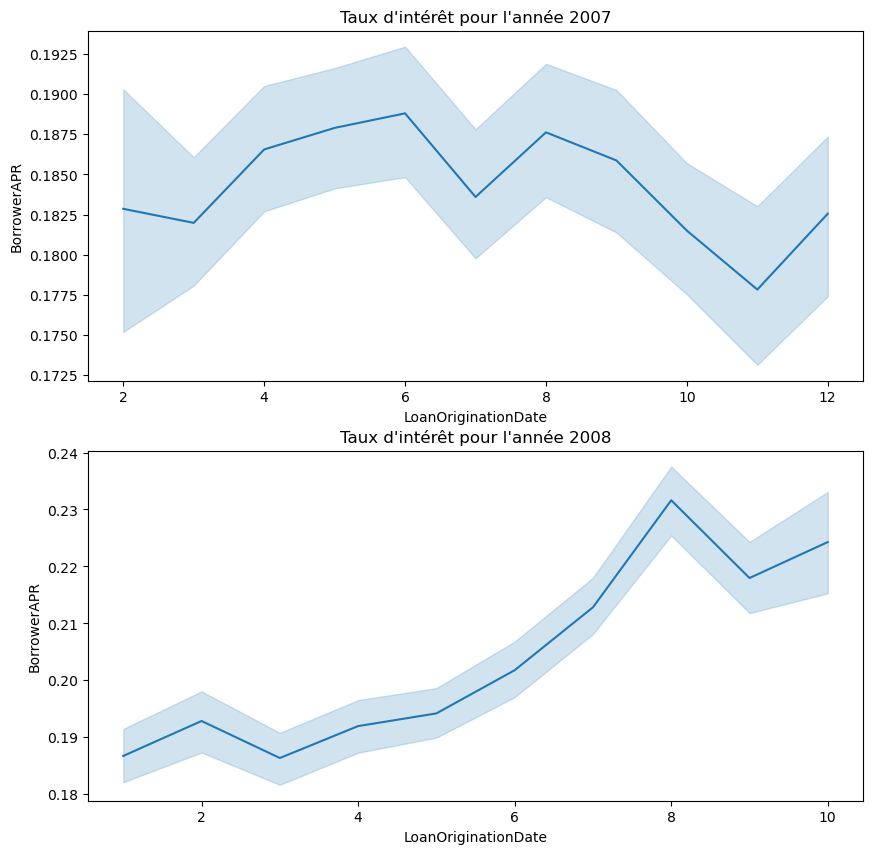

In [98]:
df_2007 = df_loan_status.loc[df_loan_status.LoanOriginationDate.dt.year == 2007]
df_2008 = df_loan_status.loc[df_loan_status.LoanOriginationDate.dt.year == 2008]

fig, axs = plt.subplots(2,1)
fig.set_figwidth(10)
fig.set_figheight(10)
sns.lineplot(data=df_2007, x = df_2007.LoanOriginationDate.dt.month, y = 'BorrowerAPR', ax = axs[0]).set(title="Taux d'intérêt pour l'année 2007")
sns.lineplot(data=df_2008, x = df_2008.LoanOriginationDate.dt.month, y = 'BorrowerAPR', ax = axs[1]).set(title="Taux d'intérêt pour l'année 2008")
plt.show()

verifions si la différence entre avant et après l'année 2011 est dû à la l'offre et la demande des crédit sur Prosper:

In [99]:
df_before_2011 = df_loan_status.loc[df_loan_status.LoanOriginationDate.dt.year <= 2011]
df_after_2011 = df_loan_status.loc[df_loan_status.LoanOriginationDate.dt.year > 2011]

print(df_before_2011.shape[0], df_after_2011.shape[0])

33453 9618


On constate qu' effectivement avant l'année 2011 le nombre de demandeurs de crédit est beaucoup plus elevé qu' après 2011.


#### 3. Relation entre les variables quantitatives et le taux d'intérêt

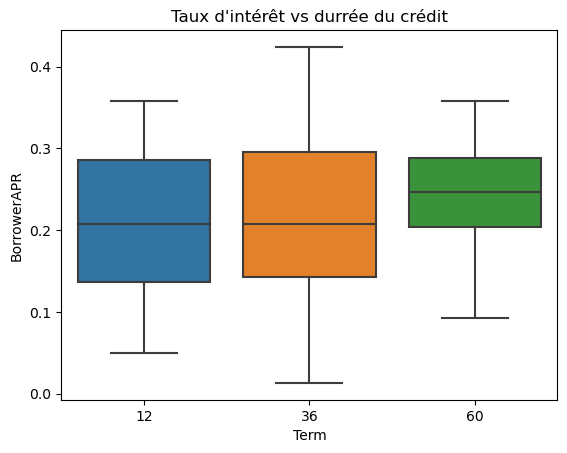

In [100]:
plt.figure()
sns.boxplot(data = df_loan_status, x = 'Term', y = 'BorrowerAPR')
plt.title("Taux d'intérêt vs durrée du crédit")
plt.show()

Pour les crédit de 36 mois et 12 mois on ne voit pas une grande différence entre les médiannes, mais pour 60 mois les taux de crédit sont clairement plus elevé par rapport à 12 et 36 mois.

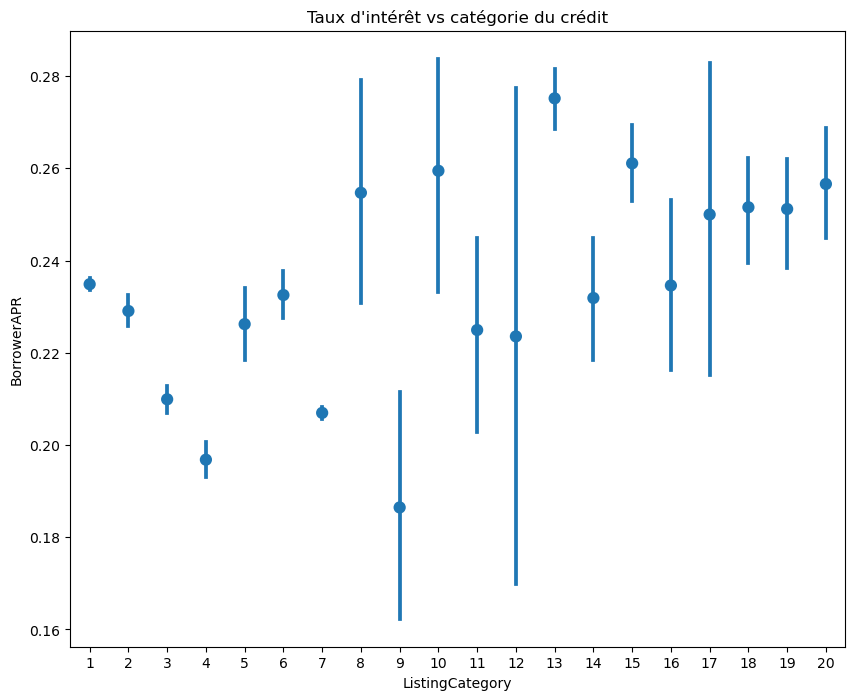

In [101]:
plt.figure(figsize=(10,8))
sns.pointplot(data=df_loan_status, x = 'ListingCategory', y = 'BorrowerAPR', join=False)
plt.title("Taux d'intérêt vs catégorie du crédit")
plt.show()

Il apparait que les taux de crédit pour la catégorie `Boat` sont les plus faible, c'est peut être dû au fait que c'est un crédit sécurisé et le bateau sera utilisé comme garantie de prêt. Alors que parmi les taux les plus elevé on trouve les prêts des dépenses ménagères, dépenses médicals ou dentals, des chirurgies cosmétiques, etc.

On passe maintenant aux variables continues et on étudiera leur relation avec le taux de crédit en utilisant des scatter plots:

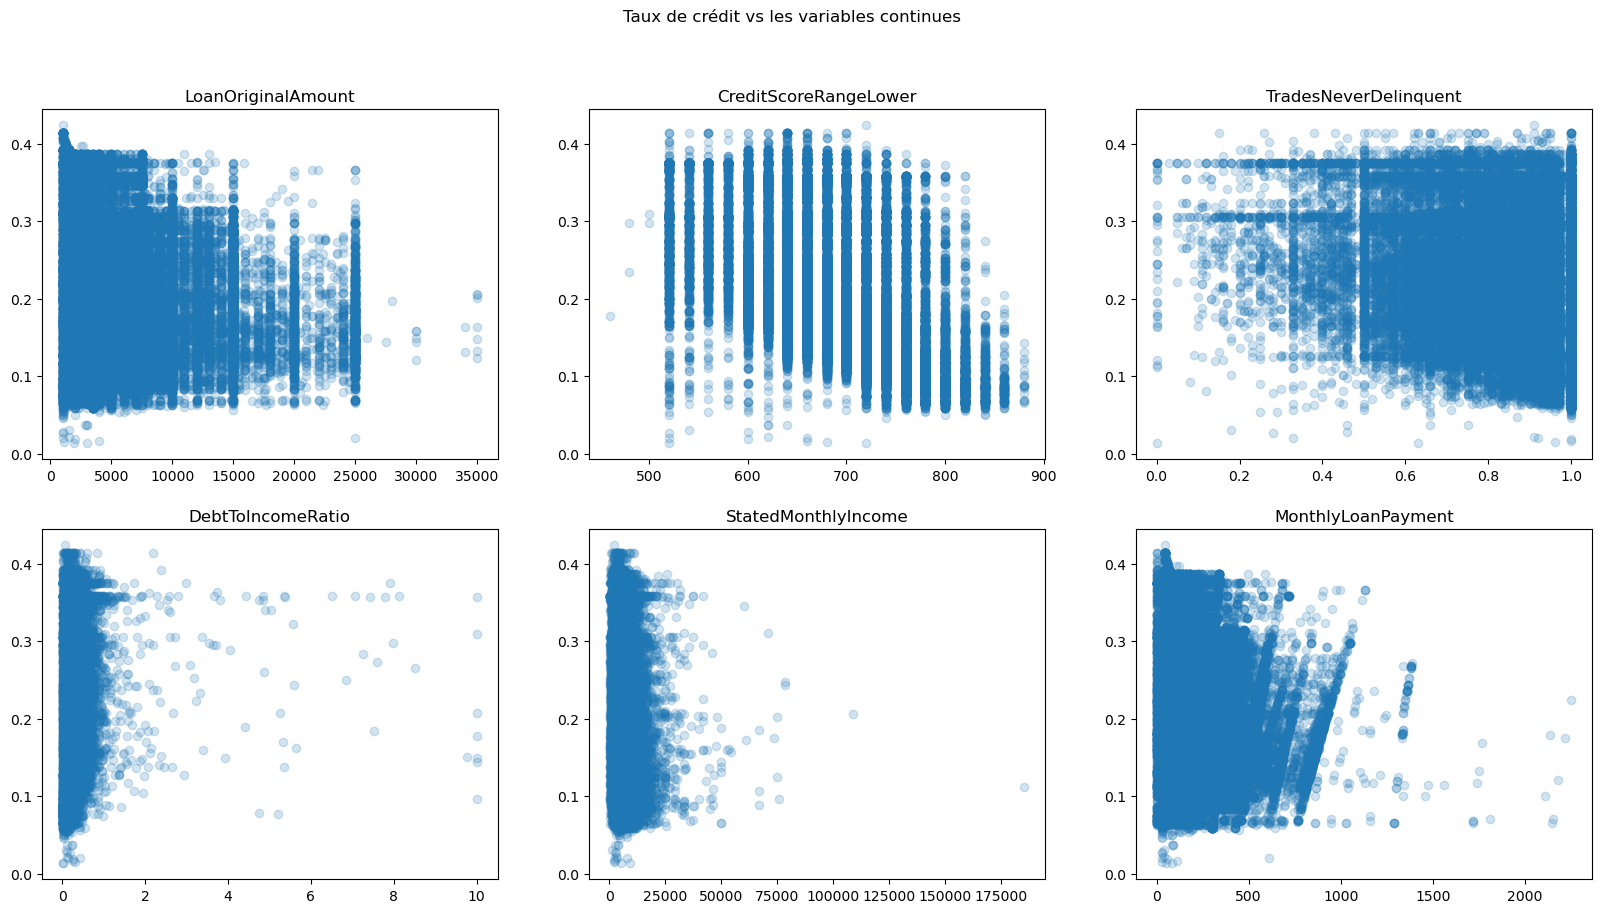

In [102]:
continuous_vars_names = ['LoanOriginalAmount', 'CreditScoreRangeLower', 'TradesNeverDelinquent', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment']

fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(20)
i,j = 0,0
for name in continuous_vars_names:
    if j>2 : 
        i,j = 1,0
    axs[i,j].scatter(data=df_loan_status, x=name, y = 'BorrowerAPR', alpha=1/5)
    axs[i,j].set_title(name)
    j = j+1
plt.suptitle("Taux de crédit vs les variables continues")
plt.show()

In [103]:
continuous_vars_names.append("BorrowerAPR")
df_interval_vars = df_loan_status[continuous_vars_names]

In [104]:
df_interval_vars.corr().iloc[-1, :]

LoanOriginalAmount      -0.236796
CreditScoreRangeLower   -0.493453
TradesNeverDelinquent   -0.222926
DebtToIncomeRatio        0.107052
StatedMonthlyIncome     -0.114694
MonthlyLoanPayment      -0.137907
BorrowerAPR              1.000000
Name: BorrowerAPR, dtype: float64

La correlation linéaire entre les variables et le taux d'intérêt est faible.

#### 4. Relation entre les variables qualitatives

/home/wissal/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2000x1000 with 0 Axes>

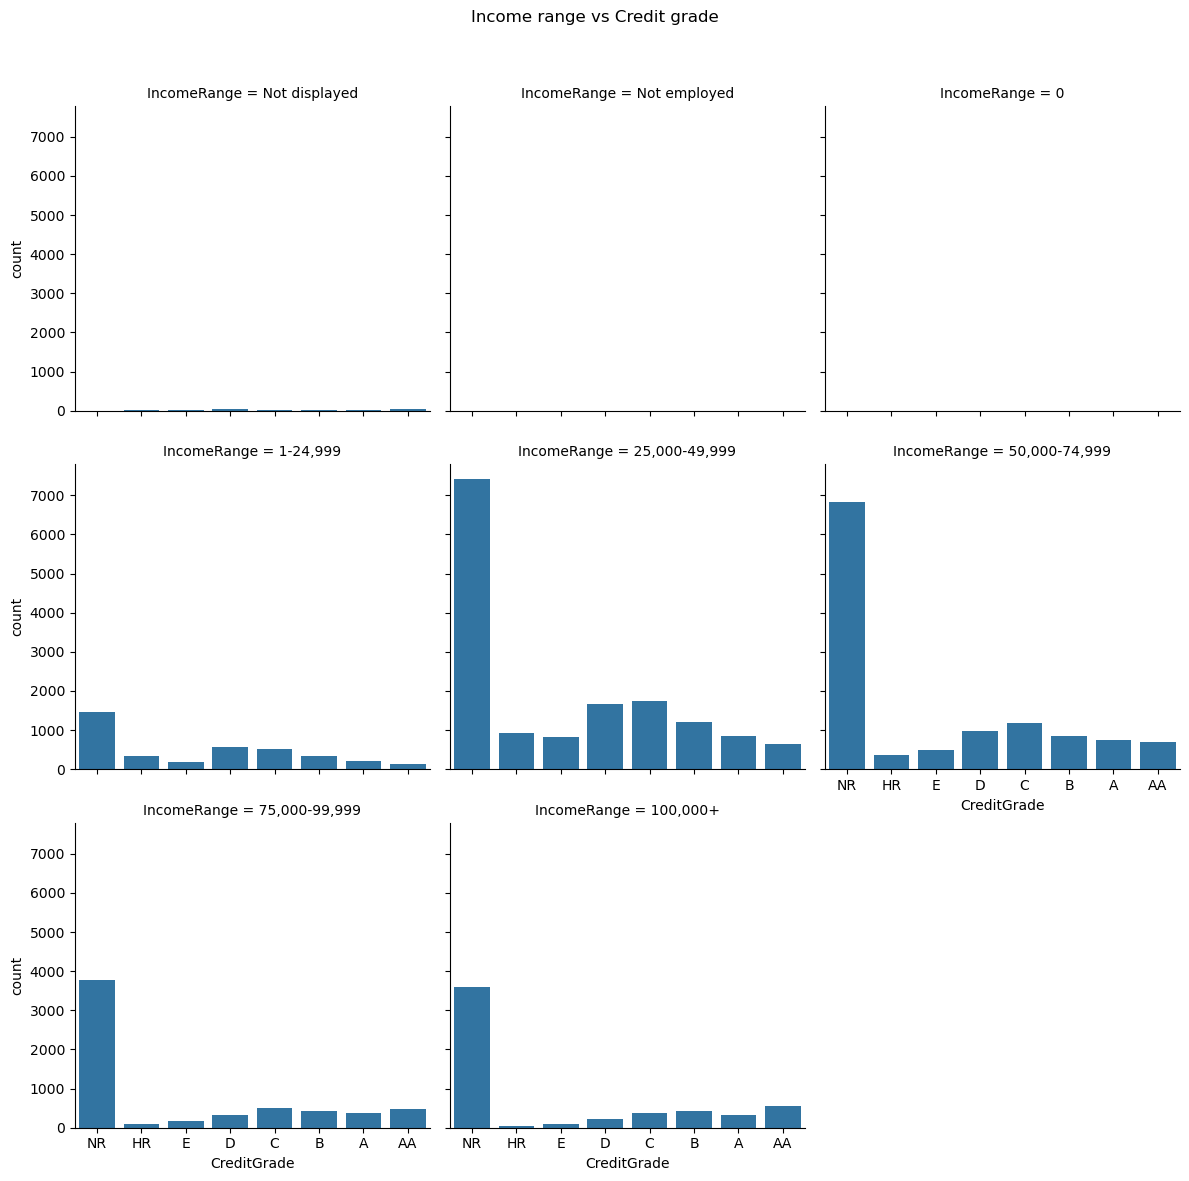

In [105]:
# Credit grade vs Income range
plt.figure(figsize=(20,10))
g = sns.FacetGrid(data=df_loan_status, col='IncomeRange',col_wrap=3, height= 4)
g.map(sns.countplot,"CreditGrade")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Income range vs Credit grade")
plt.show()

D'après le graphique précedent on remarque que la proportion des notes les plus faibles diminue avec la croissance du salaire

#### 5. Relation entre les variables quantitatives

In [106]:
df_interval_vars = df_interval_vars.drop('BorrowerAPR', axis = 1)

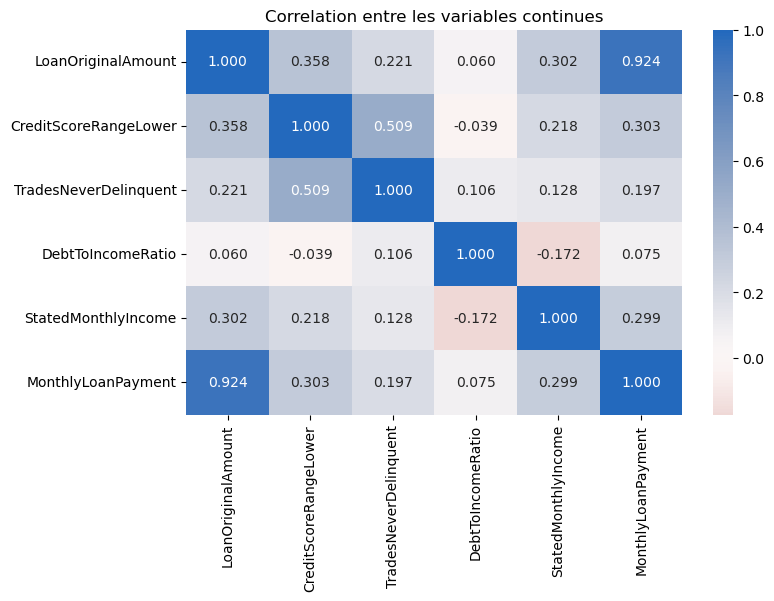

In [107]:
# graphe pour matrice de correlation
plt.figure(figsize = [8, 5])
sns.heatmap(df_interval_vars.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("Correlation entre les variables continues")
plt.show()

<Figure size 640x480 with 0 Axes>

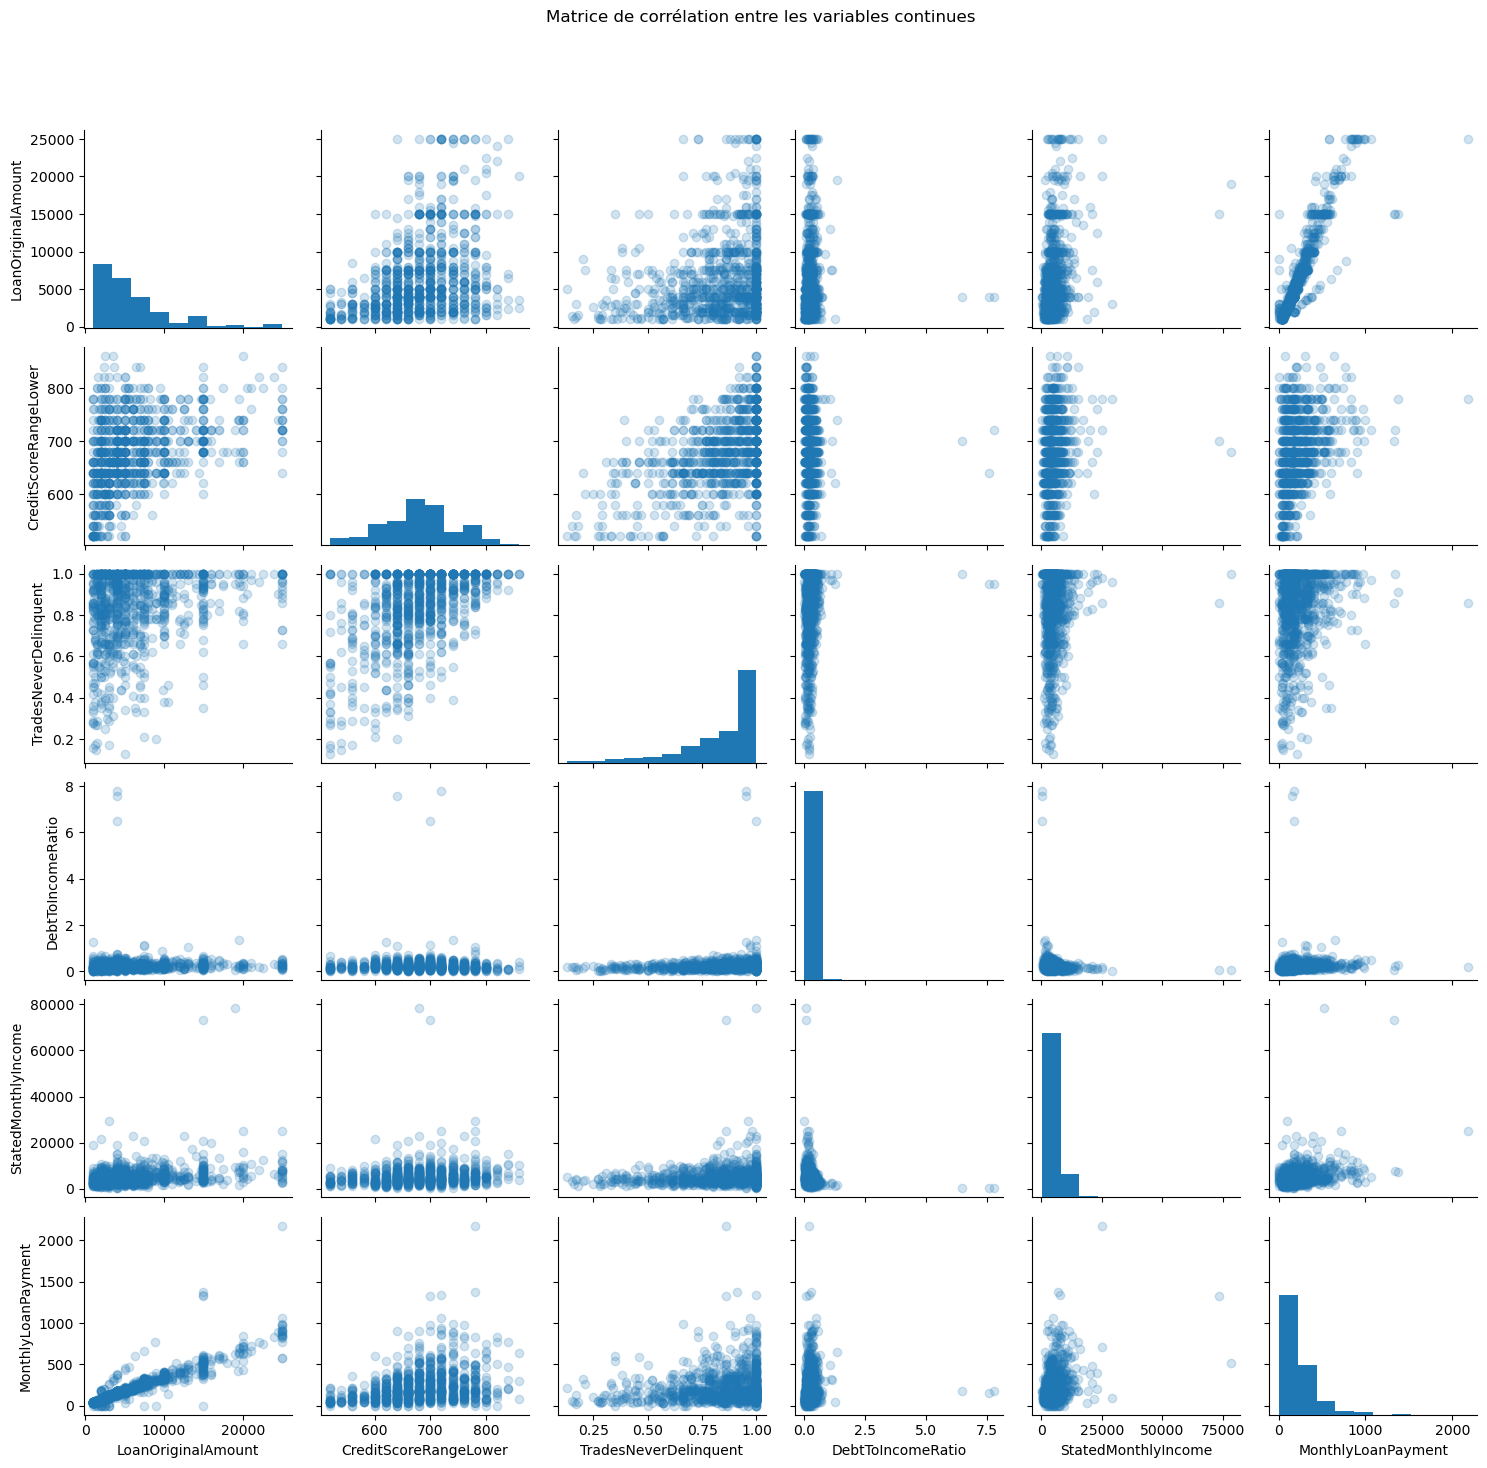

In [108]:
plt.figure()
g = sns.PairGrid(data = df_interval_vars.sample(1000, replace=False))
g.map_offdiag(plt.scatter, alpha = 1/5)
g.map_diag(plt.hist)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Matrice de corrélation entre les variables continues")
plt.show()

On a clairement une forte corrélation linéaire entre `MonthlyLoanPayment` et `LoanOriginalAmount`, sinon pour le reste des variables la corrélation est très faible.

Etudions maintenant la relation entre `Term` et les variables continues:

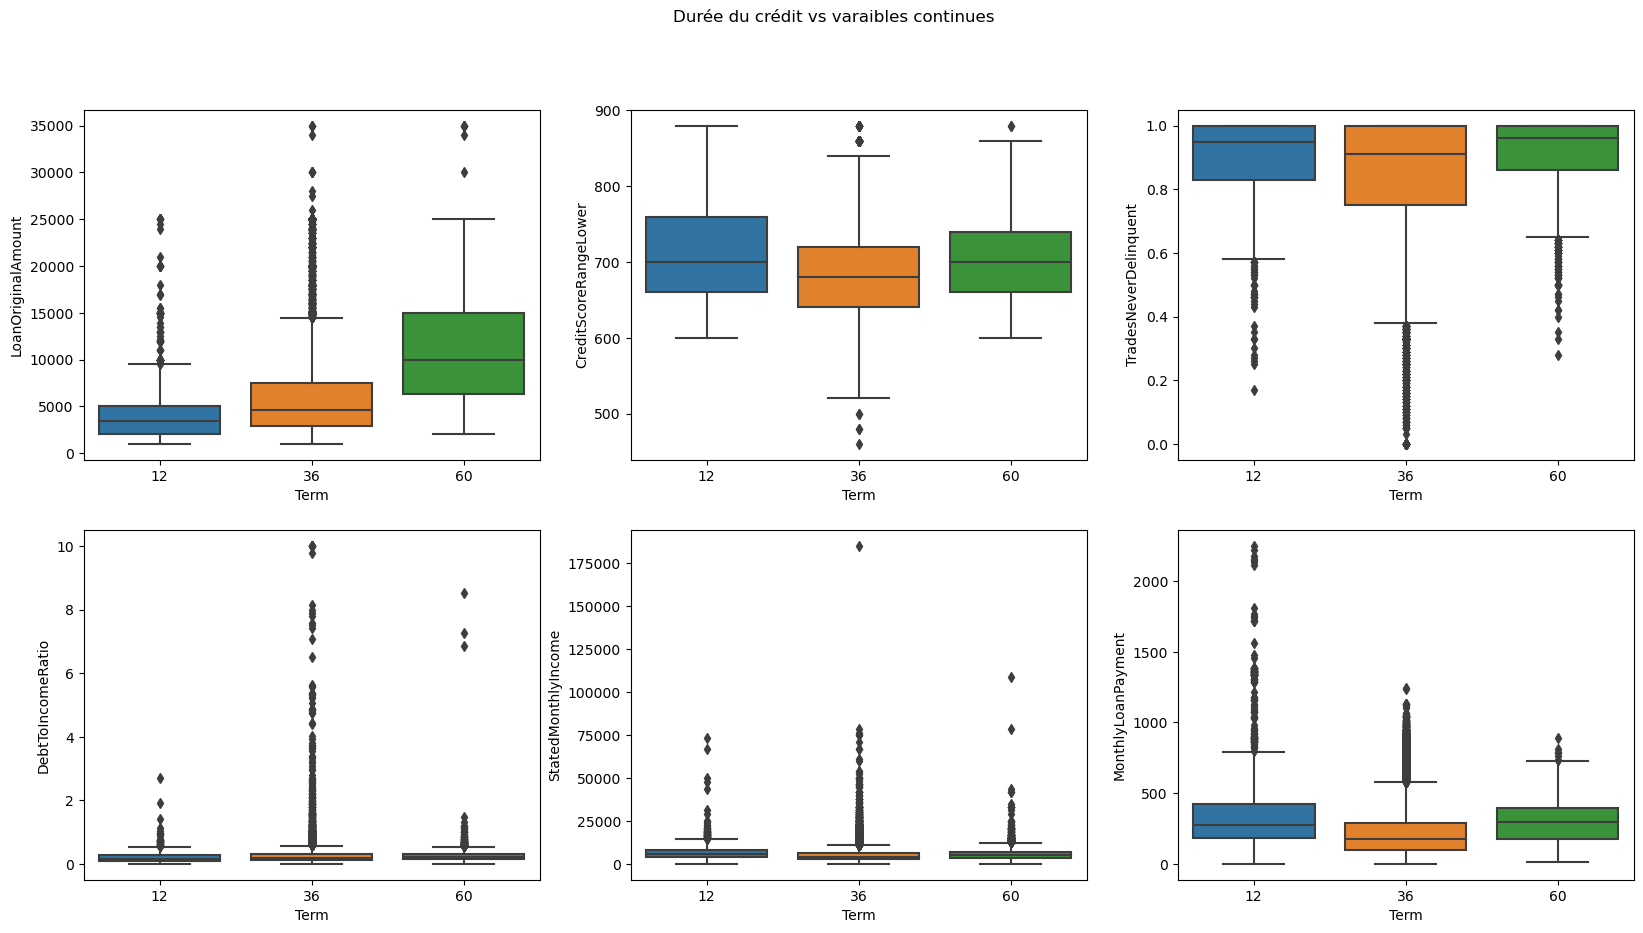

In [109]:
fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(20)
# remove BorrowerAPR from the list
continuous_vars_names.pop()

i,j = 0,0
for name in continuous_vars_names:
    if j>2 : 
        i,j = 1,0
    sns.boxplot(data=df_loan_status, x='Term', y = name, ax = axs[i,j])
    j = j+1

plt.suptitle("Durée du crédit vs varaibles continues")
plt.show()

On remarque que plus le montant est grand plus la période du crédit est longue, mais pour les autres variables on ne voit pas une croissance ou décroissance selon la période du crédit.

#### 6. Relation entre les variables qualitatives et le statut du crédit

Avant de commencer à travailler sur `LoanStatus`, il va falloir équilibrer le nombre des échantillons de chaque statut pour ne pas biaiser les résultats.

In [110]:
df_loan_completed = df_loan_status.query('LoanStatus == "Completed"')
df_loan_defaulted= df_loan_status.query('LoanStatus == "Defaulted"')
df_loan_chargedoff = df_loan_status.query('LoanStatus == "Chargedoff"')
print(f"Completed : {len(df_loan_completed)} , Defaulted : {len(df_loan_defaulted)}, Chargedoff : {len(df_loan_chargedoff)}")
size = min(len(df_loan_completed), len(df_loan_defaulted), len(df_loan_chargedoff))
df_loan_completed = df_loan_completed.sample(size, replace=False, random_state=0)
df_loan_chargedoff = df_loan_chargedoff.sample(size, replace=False, random_state=0)

#test
assert df_loan_completed.shape[0] == df_loan_chargedoff.shape[0] == df_loan_defaulted.shape[0]

df_loan_eq_status = pd.concat([df_loan_chargedoff, df_loan_completed, df_loan_defaulted], axis=0)

# test 
assert df_loan_eq_status.shape[0] == 3*size

df_loan_eq_status.sample(5)

Completed : 30722 , Defaulted : 3021, Chargedoff : 9328


CreditGrade      Occupation EmploymentStatus    IncomeRange  \
112091          NR           Other        Full-time  25,000-49,999   
65188            B           Other        Full-time  25,000-49,999   
21116            B           Other        Full-time       1-24,999   
56556           NR  Accountant/CPA         Employed  25,000-49,999   
65988            D           Other          Retired       1-24,999   

       LoanOriginationDate                MemberKey  Term  ListingCategory  \
112091          2010-03-18  36D93477690527022BAF74F    36                1   
65188           2007-09-21  30543384431803885EE4F0B    36                7   
21116           2008-03-06  6FA53400560705633AAF909    36                3   
56556           2012-09-24  FF91352997891612185C017    60                1   
65988           2008-09-09  1E7734301304531185FB4FA    36                1   

        CreditScoreRangeLower  CreditScoreRangeUpper  TradesNeverDelinquent  \
112091                  640.0                  659.0                   1.00   
65188                   680.0                  699.0                   1.00   
21116                   680.0                  699.0                   1.00   
56556                   740.0                  759.0                   1.00   
65988                   600.0                  619.0                   0.63   

        DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  \
112091               0.29          2750.000000                2500   
65188                0.39          2500.000000                6750   
21116                0.34          1500.000000                4200   
56556                0.35          3583.333333               15000   
65988                0.06          1185.000000                1500   

        MonthlyLoanPayment  LoanStatus  BorrowerAPR  
112091              113.09  Chargedoff      0.37453  
65188               223.39   Defaulted      0.12449  
21116               149.74   Defaulted      0.17428  
56556               415.82   Completed      0.24682  
65988                67.01   Completed      0.36438

880 3495 2547 1108 993


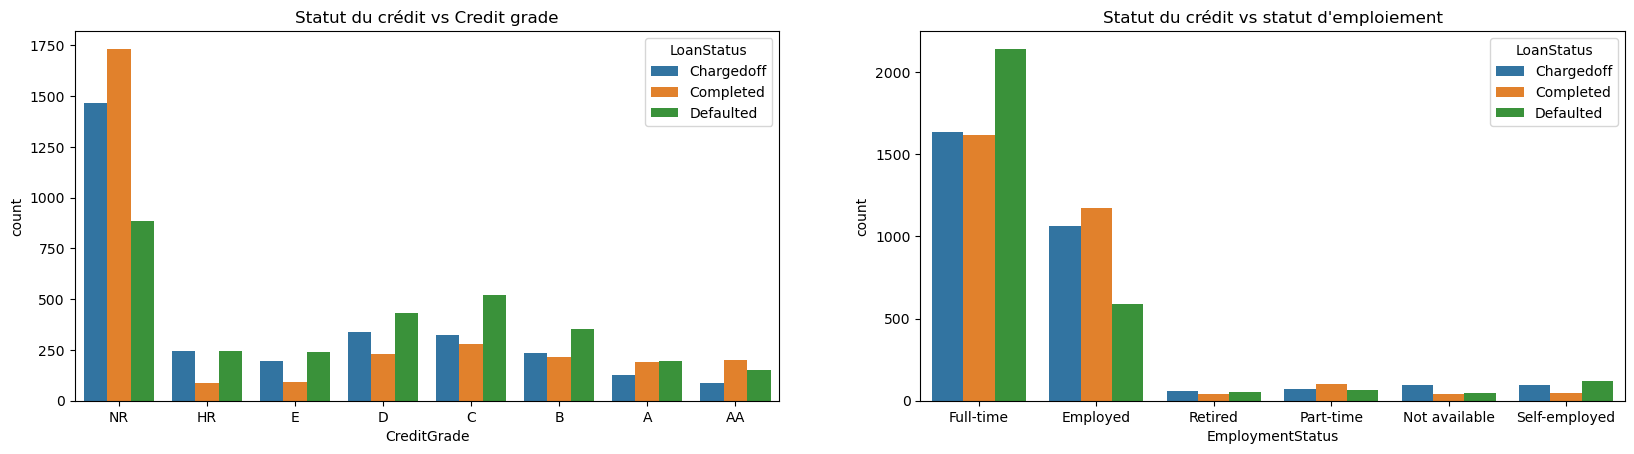

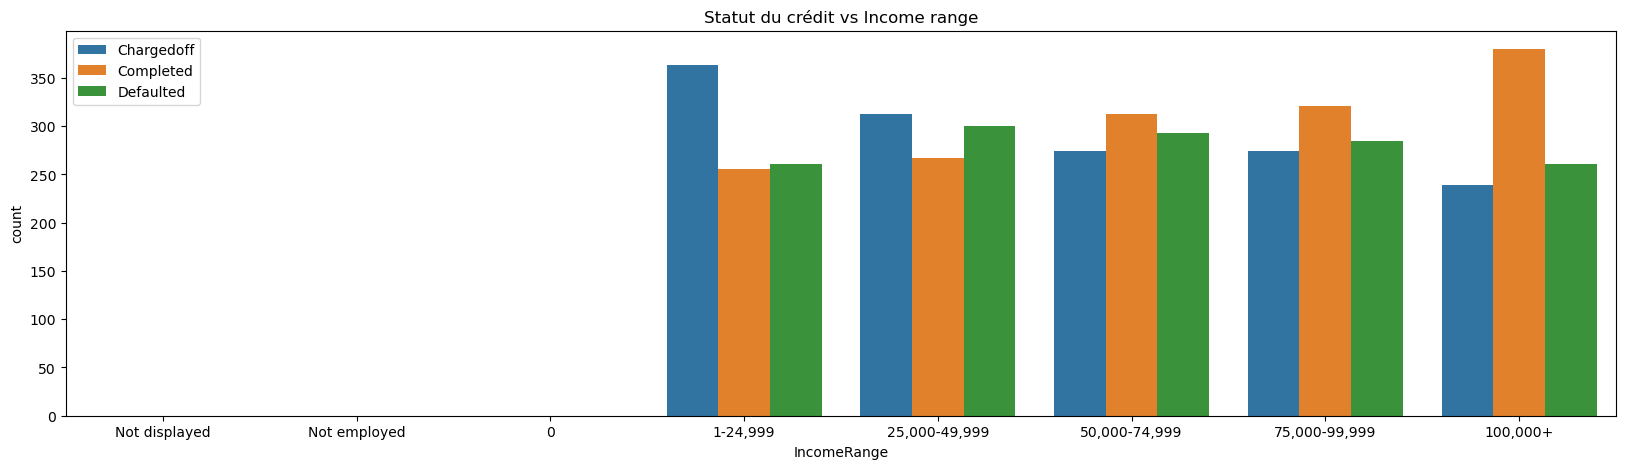

In [111]:
# CreditGrade EmploymentStatus IncomeRange
fig, axs = plt.subplots(1,2)
fig.set_figwidth(20)
sns.countplot(data = df_loan_eq_status, x = 'CreditGrade', hue = 'LoanStatus', ax = axs[0]).set(title="Statut du crédit vs Credit grade")
sns.countplot(data = df_loan_eq_status, x = 'EmploymentStatus', hue = 'LoanStatus', ax = axs[1]).set(title="Statut du crédit vs statut d'emploiement")
plt.figure(figsize=(20,5))
# Pour vérifier si la proportion de completed augmente avec le salaire annuel
# on prendra des proportions égales
df_income_1 = df_loan_eq_status.query("IncomeRange == '1-24,999'")
df_income_25 = df_loan_eq_status.query("IncomeRange == '25,000-49,999'")
df_income_50 = df_loan_eq_status.query("IncomeRange == '50,000-74,999'")
df_income_75 = df_loan_eq_status.query("IncomeRange == '75,000-99,999'")
df_income_100 = df_loan_eq_status.query("IncomeRange == '100,000+'")

print(len(df_income_1), len(df_income_25), len(df_income_50), len(df_income_75), len(df_income_100))
size = min(len(df_income_1), len(df_income_25), len(df_income_50), len(df_income_75), len(df_income_100))

df_income_25 = df_income_25.sample(size, replace=False, random_state=0)
df_income_50 = df_income_50.sample(size, replace=False, random_state=0)
df_income_75 = df_income_75.sample(size, replace=False, random_state=0)
df_income_100 = df_income_100.sample(size, replace=False, random_state=0)

df_income_status = pd.concat([df_income_1, df_income_25, df_income_50, df_income_75, df_income_100])

# Test
assert df_income_status.shape[0] == 5*size

sns.countplot(data = df_income_status, x = 'IncomeRange', hue = 'LoanStatus').set(title="Statut du crédit vs Income range")
plt.legend(loc = 'upper left')
plt.show()

- Pour `CreditGrade` à part la meilleur note `AA`, la proportion des crédit avec le statut `Defaulted` depasse la proportion des crédits avec le statut `Completed`, mais pour confirmer qu'effectivement le fait d'avoir une meilleur note n'augmente pas la probabilité de payer le crédit à temps il va falloir effectuer un test statistique (chi square). (Hypothèse à tester : il n y a aucune relation entre la note de crédit du créditeur et le statut du crédit)
- Pour `EmploymentStatus` , au niveau de full-time la proportion du statut `Defaulted` est supérieur à `Completed` mais en général le statut `Completed` ne se distingue pas vraiment des proportions de `Defaulted` ou `Chargedoff`.
- Pour les salaires annuels on remarque que la proportion du statut `Completed` augmente avec l'augmentation des salaires. (Hypothèse à tester)


#### 7. Relation entre la période du crédit et le statut du crédit

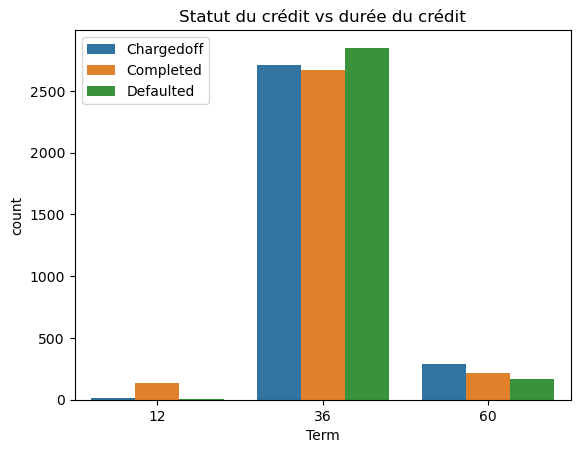

In [112]:
# Période de cérdit vs statut du crédit
plt.figure()
sns.countplot(data = df_loan_eq_status, x = 'Term', hue = 'LoanStatus')
plt.legend(loc = 'upper left')
plt.title("Statut du crédit vs durée du crédit")
plt.show()

Il apparait qu'il n y'a aucune relation entre les deux.

#### 8. Relation entre les variables quantitatives et le statut du crédit

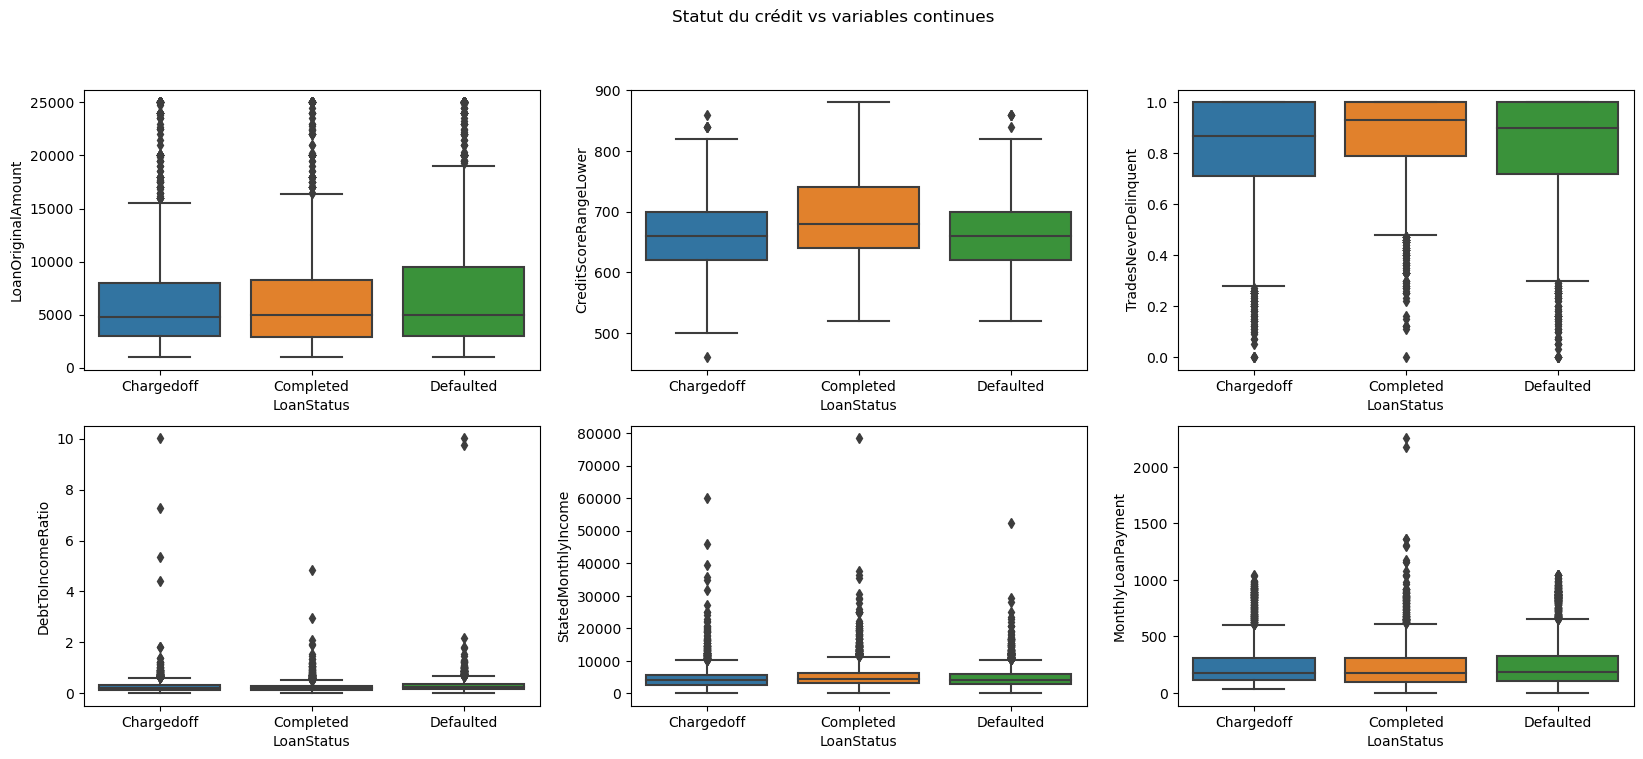

In [113]:
fig, axs = plt.subplots(2,3)
fig.set_figwidth(20)
fig.set_figheight(8)
i,j = 0,0
for name in df_interval_vars.columns:
    if j>2 : i,j=1,0
    sns.boxplot(data = df_loan_eq_status, x = 'LoanStatus', y = name, ax = axs[i,j])
    j = j+1

plt.suptitle("Statut du crédit vs variables continues")
plt.show()


On remarque que les mediannes du statut `Completed` pour les variables `CreditScore` et `TradesNeverDelinquent` est un peu elevé par rapport aux autres statuts. Il va falloir éffectuer un test ANOVA pour s'assurer que les moyennes des trois groupes sont différentes au niveau de deux variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Pour le taux de crédit on remarque ce qui suit :
 - une décroissance du taux pour les meilleurs notes de crédit, on a aussi un taux faible au niveau du statut d'emploiement `Self Employed` par rapport aux autres statuts.
 - En analysant son évolution par rapport aux années d'initiation du crédit on constate que celui ci est aussi impacté par le nombre d'offre et demandes des crédits.
 - On a remarqué aussi que pour les durée de crédits plus longue le taux est plus elevé.
 - Les taux de crédit varient aussi par rapport à la catégorie de celui ci.
> Pour le statut du crédit on remarque ce qui suit:
 - La proportion du statut `Cpompleted` augmente avec la salaire annuel.
 - Les mediannes des variables `CreditScore` et `TradesNeverDelinquent` sont plus elevé pour le statut `Completed`. Si ce résultat est statistiquement significative cela signifiera qu'il y'a de grandes chances que le crédit aie le statut Completed pour les meilleurs notes et quand le pourcentage des crédits en retard du créditeur est très faible.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 1. On a une relation entre `CreditGrade` et `IncomeRange`, tel que la proportion des notes les plus faibles diminue quand le salaire annuel augmente.
> 2. Il existe aussi une corrélation linéaire positive entre la durée et le montant du crédit, 

## Multivariate Exploration

Commençons par étudier la relation entre le taux d'intérêt, le statut d'emploiement et le salaire pour voir si on peu expliquer la différence entre les taux de crédit selon le statut d'emploiement plus en détail:

/home/wissal/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


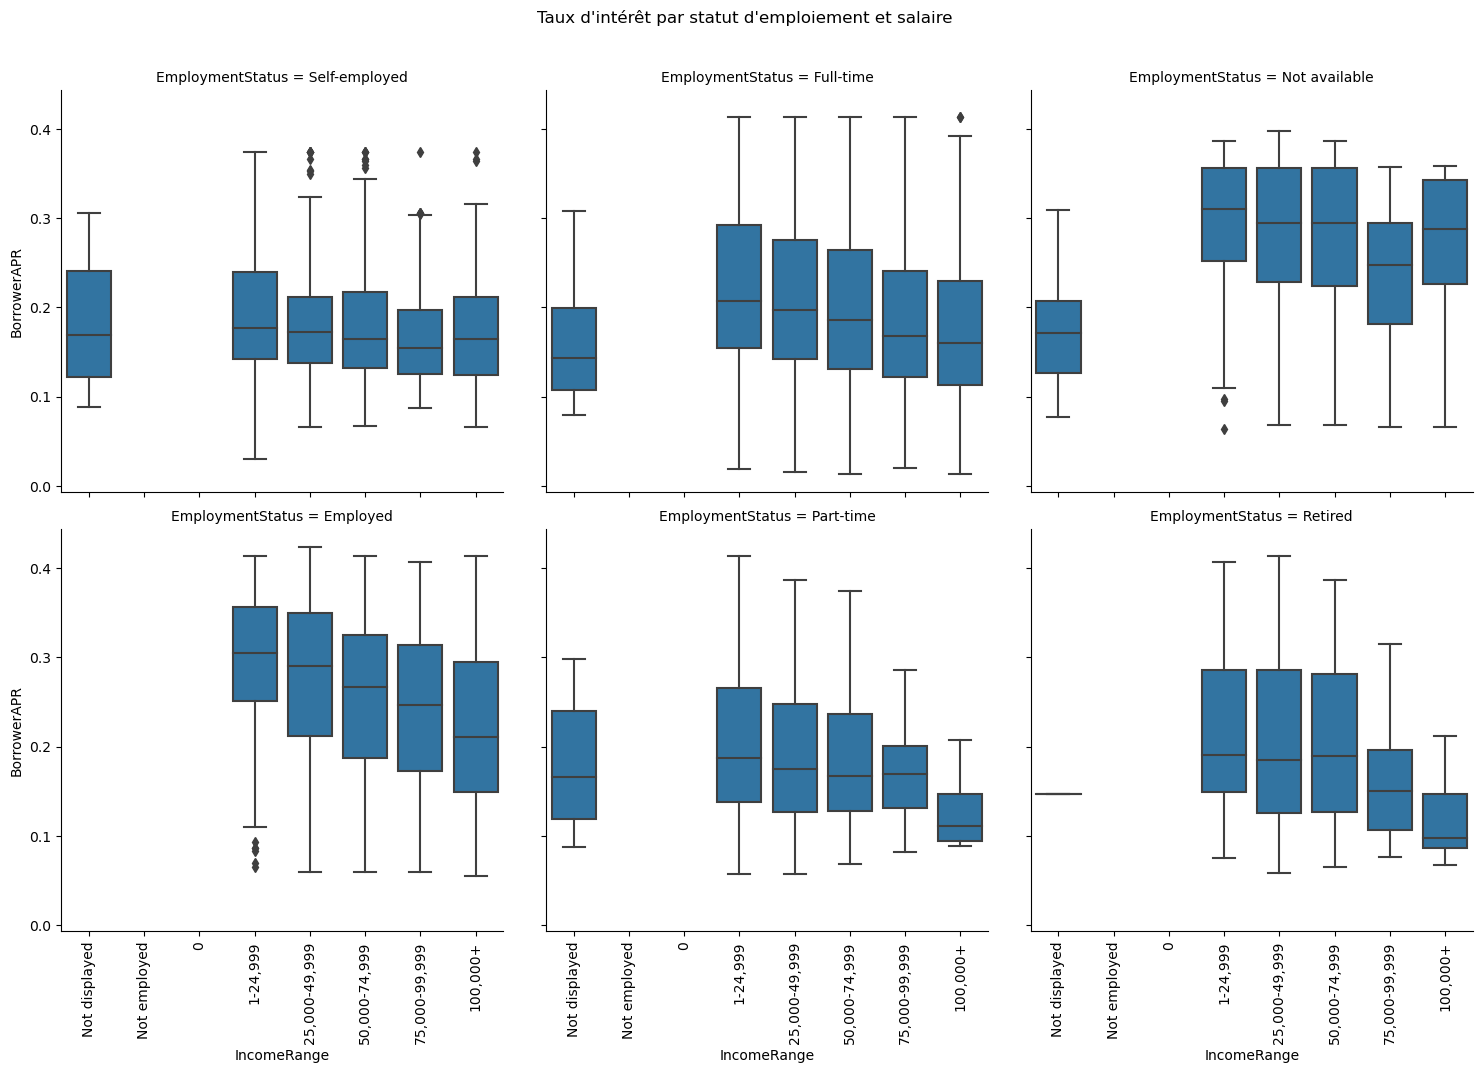

In [114]:
g = sns.FacetGrid(data = df_loan_status, col='EmploymentStatus', col_wrap=3, height =5)
g.map(sns.boxplot, 'IncomeRange', 'BorrowerAPR')
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Taux d'intérêt par statut d'emploiement et salaire")
plt.show()

Là on voit clairement qu'il y'a une decroissance du taux d'intérêt avec l'augmentation du salaire dans le cas des employé (full-time, part-time) et retraité, mais ce qu'on remarque de plus est que dans le cas des entrepreneur un salaire annuel assez élévé n'implique pas forcément un taux de crédit faible.


On suspecte aussi qu'un créditeur avec un salaire élevé qui prend un montant de crédit faible aura un taux de crédit réduit, vérifions ce cas : 

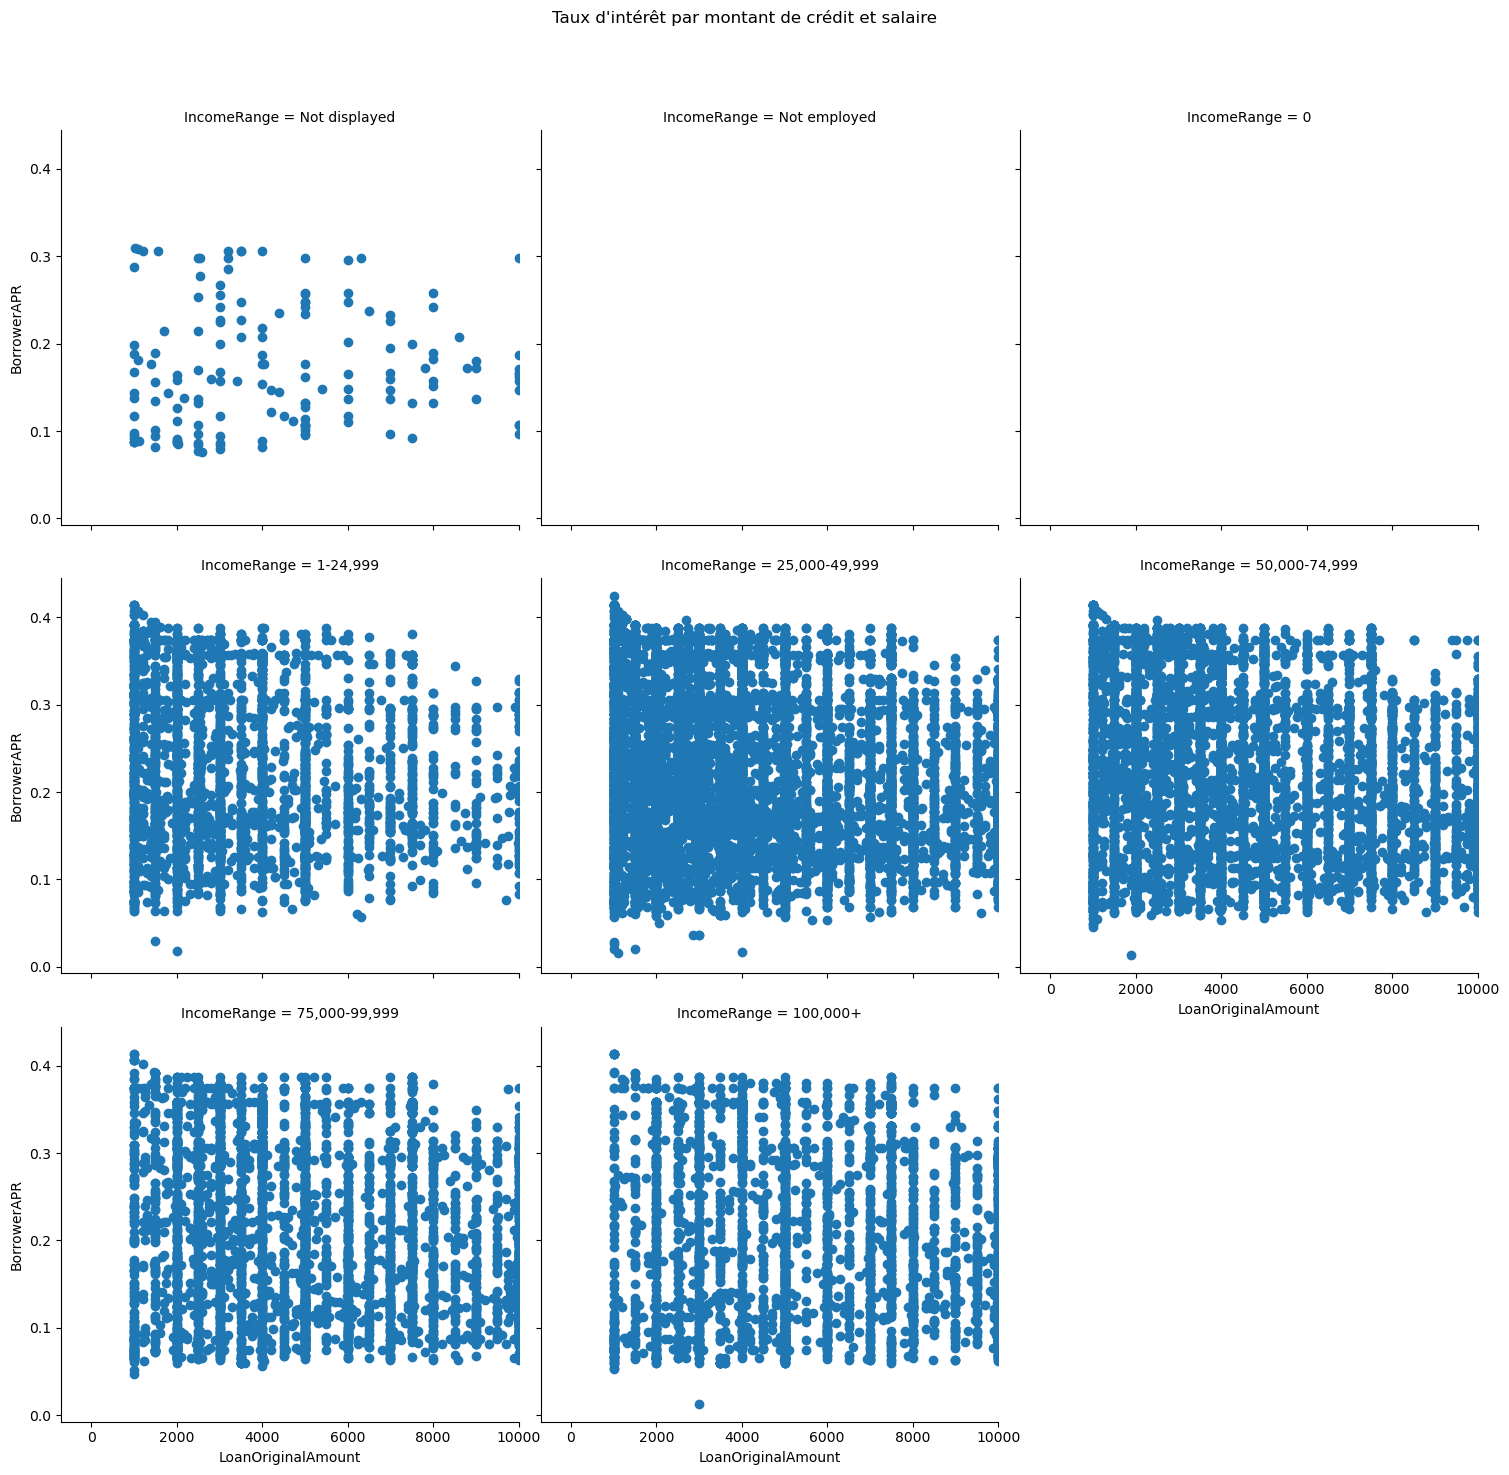

In [115]:
# est ce qu'un salaire élévé avec un montant de crédit faible => taux d'intérêt faible?
g = sns.FacetGrid(data=df_loan_status, col = 'IncomeRange', col_wrap=3, height=5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Taux d'intérêt par montant de crédit et salaire")
plt.xlim(right=10000)
plt.show()


Apparement, on n'a pas cette relation, peut être qu'il y a d'autres facteurs qui entrent en relation. essayons encore en ajoutant `CreditScore`:

/tmp/ipykernel_7654/643556429.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([label_format.format(xtick) for xtick in xticks], rotation=90)


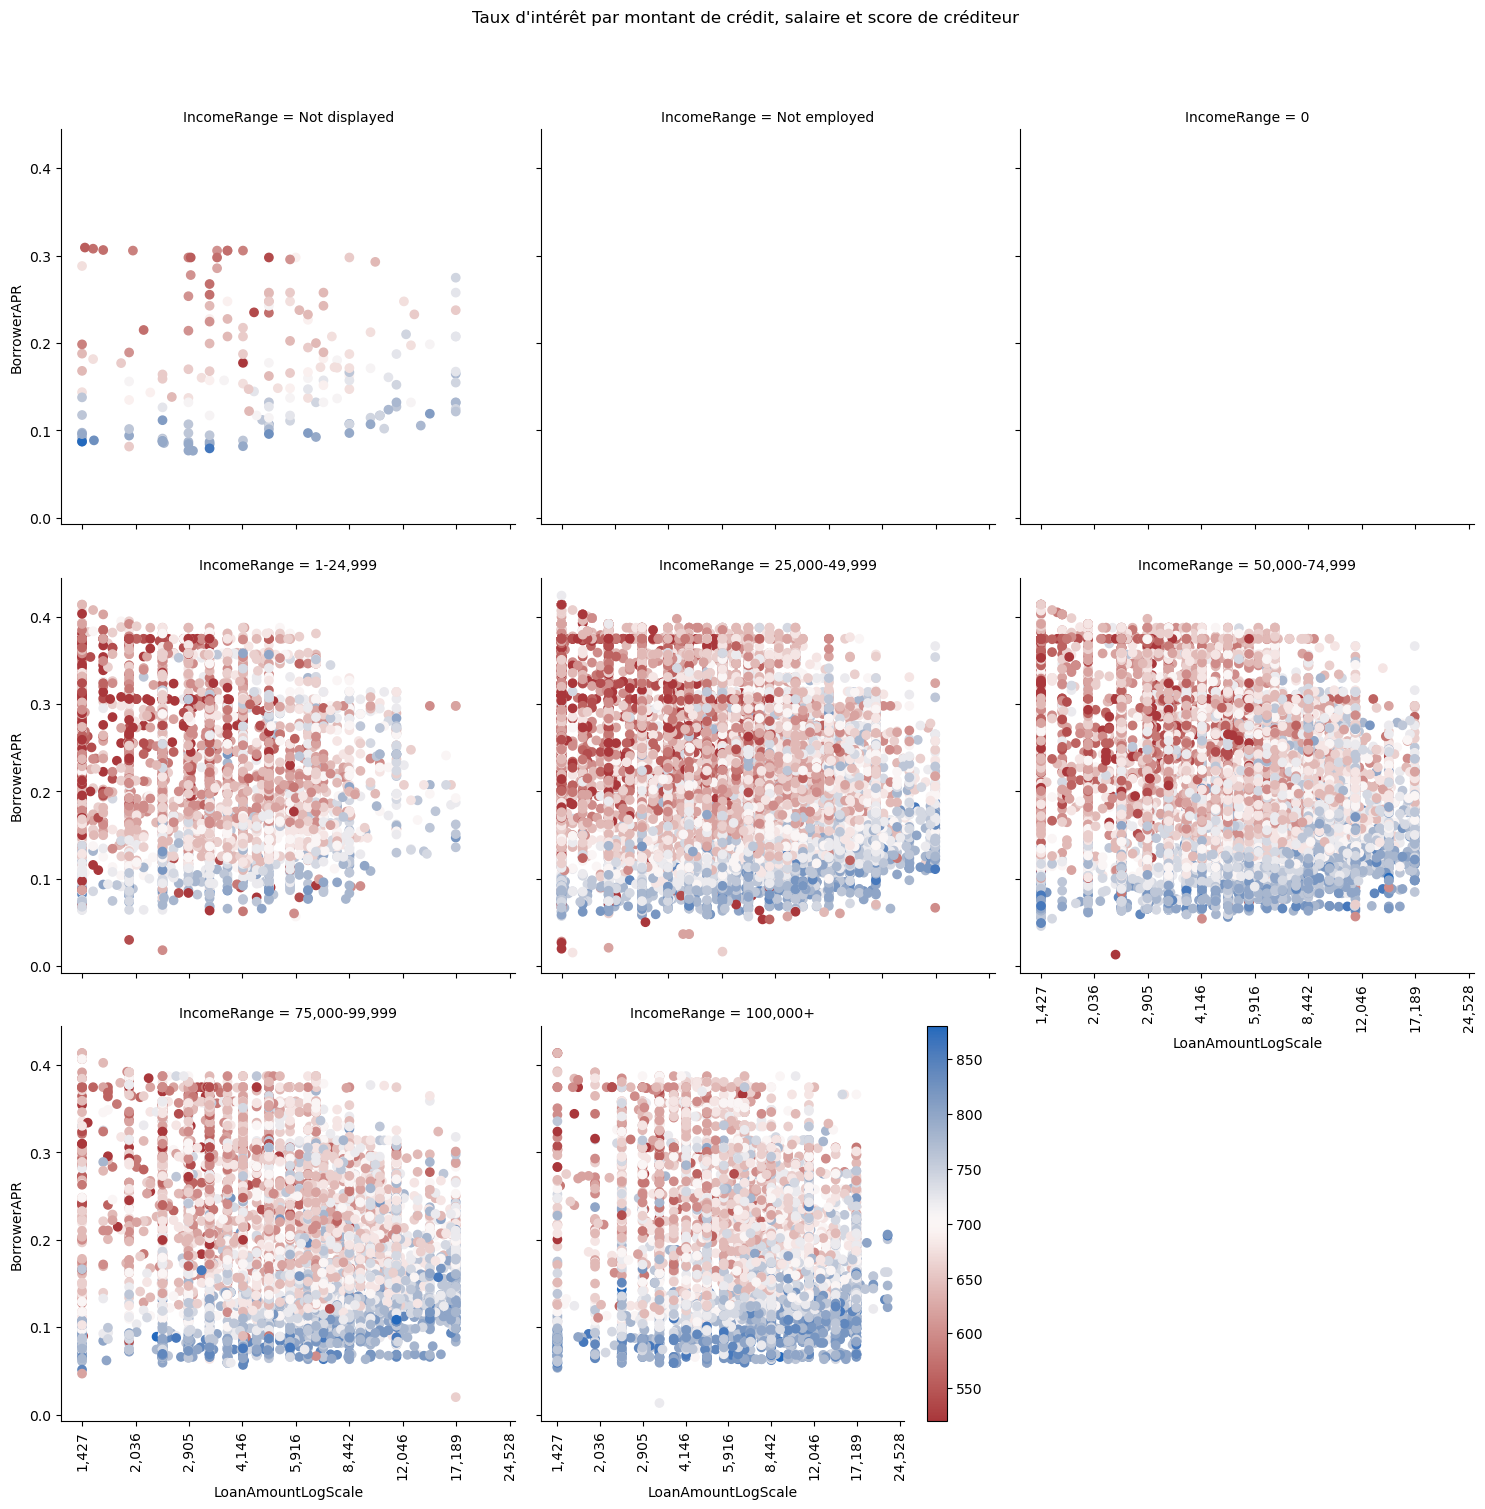

In [116]:
def facet_scatter(x, y, c, **kwargs):
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)

df_loan_status['LoanAmountLogScale'] = np.log10(df_loan_status['LoanOriginalAmount'])
g = sns.FacetGrid(data=df_loan_status, col = 'IncomeRange', col_wrap=3, height=5)
g.map(facet_scatter, 'LoanAmountLogScale', 'BorrowerAPR', 'CreditScoreRangeLower', cmap='vlag_r')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Taux d'intérêt par montant de crédit, salaire et score de créditeur")
xticks = 10**np.linspace(df_loan_status['LoanAmountLogScale'].min(), df_loan_status['LoanAmountLogScale'].max(), 11)
label_format = '{:,.0f}'
for ax in g.axes.flat:
    ax.set_xticklabels([label_format.format(xtick) for xtick in xticks], rotation=90)
plt.colorbar()

plt.show()

On remarque qu'il y a une croissance languissante du taux de crédit selon le montant pour le groupe où les scores sont élevé mais le degré de croissance ne varie pas selon les salaires.

Commençons maintenant à invetiguer les relations avec le statut du crédit:

Là on continuera d'abord par invetiguer la relation entre le montant, le salaire et le statut

/home/wissal/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 640x480 with 0 Axes>

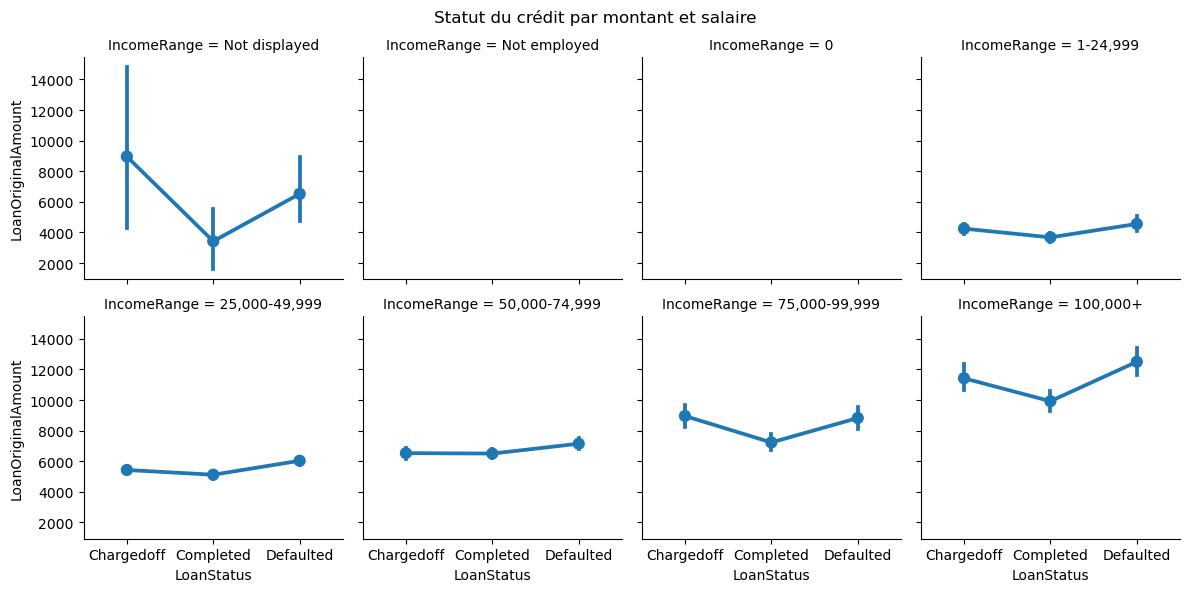

In [117]:
plt.figure()
g = sns.FacetGrid(data=df_loan_eq_status, col='IncomeRange', col_wrap=4)
g.map(sns.pointplot, 'LoanStatus', 'LoanOriginalAmount')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Statut du crédit par montant et salaire")
plt.show()

Alors, là on remarque dèja que les gens avec des salaires élevé prennent des montants de crédit plus importants, et on voit aussi que pour chaque marge de salaire les crédits avec statut `Completed` ont des montants plus faibles par rapport aux montant des crédits `Defaulted` ou `Chargedoff`. Donc on peut dire que plus le salaire annuel depasse largement le montant du crédit plus on a de chance d'avoir un crédit avec le statut `Completed`.

Essayons maintenant d'étudier la relation entre les variables (TradesNeverDelinquent, IncomeRange, DebtToIncomeRatio):

<Figure size 640x480 with 0 Axes>

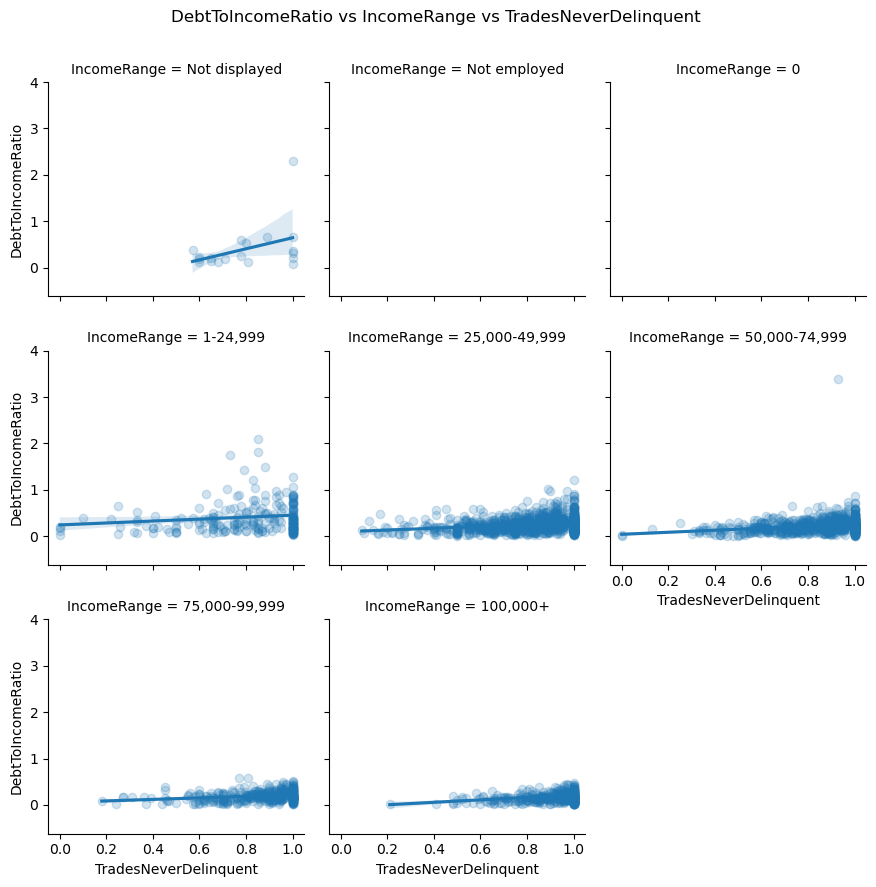

In [118]:
# scatter plot avec facetage
plt.figure()
g = sns.FacetGrid(data=df_loan_status.sample(3000, replace=False, random_state=0), col = 'IncomeRange', col_wrap=3)
g.map(sns.regplot, 'TradesNeverDelinquent', 'DebtToIncomeRatio', scatter_kws = {'alpha':1/5})
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("DebtToIncomeRatio vs IncomeRange vs TradesNeverDelinquent")
plt.ylim(top=4)
plt.show()

On remarque ici que plus le salaire est élévé le nuage de point devient plus concentré dans la partie droite inférieur, ce qui dit que plus le salaire est élevé plus le quotiont dette/revenu est faible et le pourcentage des comptes de crédits où il n y a eu aucun retard est elevé.

/home/wissal/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


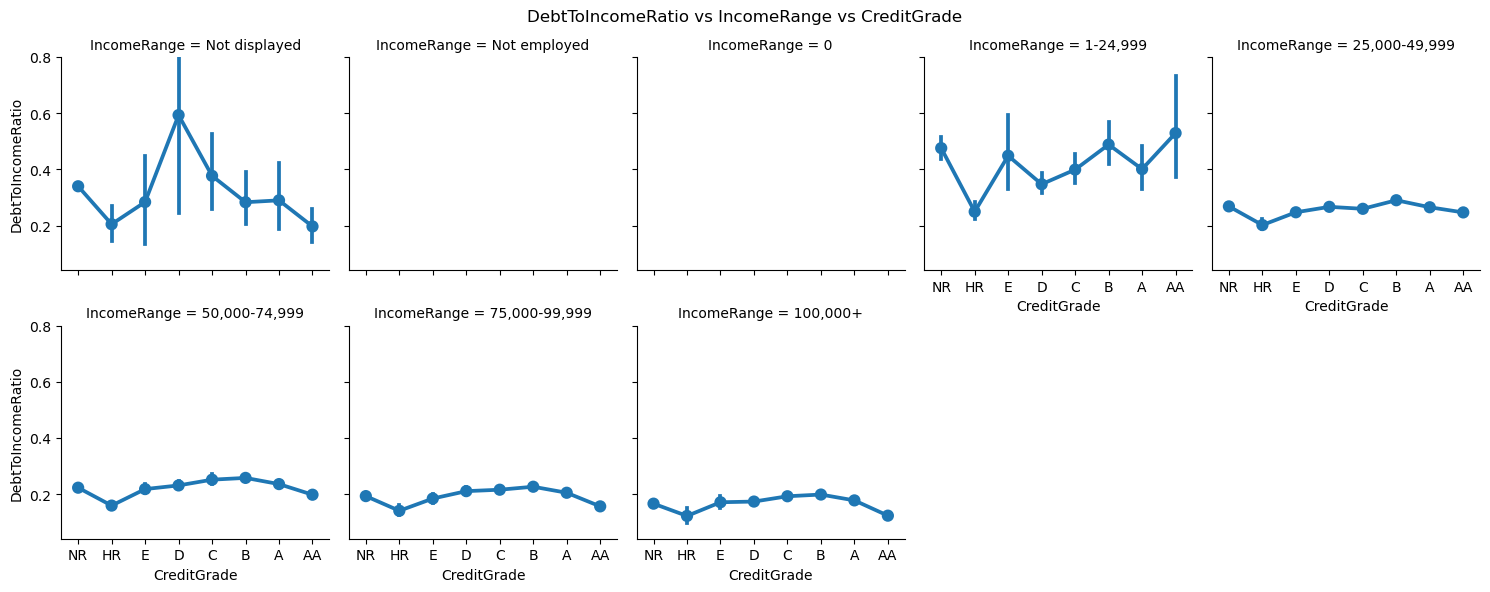

In [119]:
g = sns.FacetGrid(data=df_loan_status, col = 'IncomeRange', col_wrap=5)
g.map(sns.pointplot, 'CreditGrade', 'DebtToIncomeRatio')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("DebtToIncomeRatio vs IncomeRange vs CreditGrade")
plt.ylim(top=0.8)
plt.show()

Pour les salaires inférieur à 25000 les créditeus avec des meilleurs notes n'ont pas forcement un quotient dette/revenu faible, alors que pour les salaires qui dépassent 50000 on voit une décroissance de `DebtToIncomeRatio` au niveau des trois notes les plus élevé.


Avant on avait trouvé que la proportion de `Defaulted` dépassait la proportion de `Completed` pour le type d'emploiement full-time et on se demande si ceci peut être du au montant du crédit:

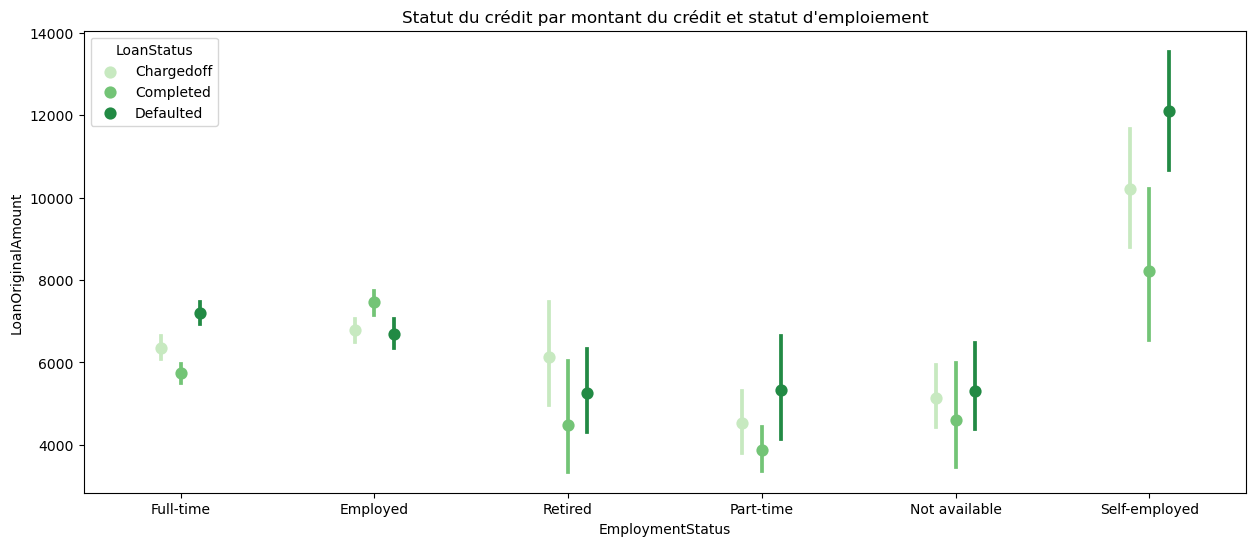

In [120]:
plt.figure(figsize=(15,6))
sns.pointplot(data=df_loan_eq_status, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue='LoanStatus', dodge=0.2, palette = 'Greens', join=False)
plt.title("Statut du crédit par montant du crédit et statut d'emploiement")
plt.show()

On remarque que dans la plus part des cas (à part le statut Employed qui regroupe d'autres catégories) les crédits qui ont le statut `Completed` ont des montants plus faible que les montants des autres statuts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 1. Après avoir effectué une analyse bivarié entre le taux d'intérêt et le statut d'emploiement on avait remarqué que pour `Self Employed` le taux était le plus faible, alors que quand on a encore analysé cette relation avec le salaire annuel on s'apperçoit qu'on n'a pas une décroissance du taux d'intérêt avec la croissance du salaire (ce qui n'est pas le cas pour les autres statuts d'emploiement) et que la valeur du taux ne varie pas trop entre un salaire faible et un salaire élevé.
>2. Etant motivé par l'idée que les gens bien payé qui prennent des mantants de crédit faibles augmentera la probabilité d'avoir le statut `Completed`, on a investigué la relation entre salaire/montant/statut du crédit. Après cet investigation on s'est apperçu que les gens avec des salaires élevé prennent des montants de crédit plus importants, et on voit aussi que pour chaque marge de salaire les crédits avec statut `Completed` ont des montants plus faibles par rapport aux montant des crédits `Defaulted` ou `Chargedoff`. Donc on peut faire une hypothèse dans ce sens (plus le salaire annuel dépasse largement le montant du crédit plus on a de chance d'avoir un crédit avec le statut `Completed`).


### Were there any interesting or surprising interactions between features?

> 1. Au niveau d'interactions entre les variables, on a commencé par investiguer la relation entre les variables suivantes : (`DebtToIncomeRatio`, `TradesneverDelinquent` et `IncomeRange`), on s'aperçoit alors que plus le salaire est élevé plus le quotiont dette/revenu est faible et le pourcentage des comptes de crédits où il n y a eu aucun retard est élevé.
> 2. En ce qui concerne la relation entre (`CreditGrade`, `DebtToIncomeRatio` et `IncomeRange`) on remarque que pour les salaires inférieur à 25000 les créditeus avec des meilleurs notes n'ont pas forcément un quotient dette/revenu faible, alors que pour les salaires qui dépassent 50000 on voit une décroissance de `DebtToIncomeRatio` au niveau des trois notes les plus élevé.

## Conclusions

> Lors de l'exploration, on a trouvé que le taux d'intérêt est influencé par la note du créditeur, le salaire et la différence entre offre et demande des crédits, en plus les entrepreneurs ont des taux d'intérêt plus faibles par rapport aux autres statuts d'emploiement et que celui ci n'est pas impacté par leur revenu. En ce qui concerne le statut du crédit, on remarque que la proportion de celui ci augmente avec le niveau du salaire, et que plus celui ci dépasse largement le montant du crédit plus la probabilité d'observer le statut `Completed` est élevé, on s'apperçoit aussi que quelques paramètres du profil du créditeur comme le score de créditeur et le pourcentage des crédits en retard entrent aussi en relation pour détérminer le statut final du crédit.
